<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Define the critical columns
critical_columns = ['Employment', 'JobSat', 'RemoteWork']

# Check the percentage of missing values in critical columns
missing_percentage = df[critical_columns].isnull().mean() * 100
print("Percentage of missing values in critical columns:")
print(missing_percentage)

# Define thresholds for handling missing values
threshold_to_drop = 50  # Drop columns with more than 50% missing values
threshold_to_fill = 10  # Fill missing values if less than 10%

# Handle missing values
for column in critical_columns:
    missing_percent = missing_percentage[column]
    if missing_percent > threshold_to_drop:
        print(f"Dropping column {column} due to high percentage of missing values ({missing_percent:.2f}%).")
        df = df.drop(columns=[column])
    elif missing_percent <= threshold_to_fill:
        print(f"Filling missing values in column {column} with mode due to low percentage of missing values ({missing_percent:.2f}%).")
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        print(f"Dropping rows with missing values in column {column} ({missing_percent:.2f}% missing).")
        df = df.dropna(subset=[column])

Percentage of missing values in critical columns:
Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64
Filling missing values in column Employment with mode due to low percentage of missing values (0.00%).
Dropping column JobSat due to high percentage of missing values (55.49%).
Dropping rows with missing values in column RemoteWork (16.25% missing).


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [4]:
df.YearsCodePro.unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '16', '8', '14',
       '4', '45', '1', '24', '2', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '31', '19', '21', '28', '34', '32', '22', '40', '50',
       '39', '44', '41', '36', '38', 'More than 50 years', '43', '42',
       '48', '46', '49', '47'], dtype=object)

In [5]:
# Define a mapping for the 'EdLevel' column
YearsCodePro_mapping = {
    'Less than 1 year': 0,
    'More than 50 years': 51
}

df['YearsCodePro'] = df['YearsCodePro'].replace(YearsCodePro_mapping)

# Display standardized values
print("Standardized 'YearsCodePro' column:")
print(df['YearsCodePro'].unique())

Standardized 'YearsCodePro' column:
[nan '17' '27' '7' '11' '25' '12' '10' '3' 0 '18' '37' '15' '20' '6' '16'
 '8' '14' '4' '45' '1' '24' '2' '29' '5' '30' '26' '9' '33' '13' '35' '23'
 '31' '19' '21' '28' '34' '32' '22' '40' '50' '39' '44' '41' '36' '38' 51
 '43' '42' '48' '46' '49' '47']


In [6]:
# Analyze the relationship between YearsCodePro and JobSat
# Define experience ranges for YearsCodePro
def categorize_experience(years):
    try:
        years = float(years)
        if years <= 5:
            return '0-5'
        elif years <= 10:
            return '5-10'
        elif years <= 20:
            return '10-20'
        else:
            return '>20'
    except ValueError:
        return None

df['ExperienceRange'] = df['YearsCodePro'].apply(categorize_experience)
df['ExperienceRange'].unique()

array(['>20', '10-20', '5-10', '0-5'], dtype=object)

In [8]:
job_sat_columns = df.filter(regex='^JobSat').columns
df[job_sat_columns] = df[job_sat_columns].fillna(0)
df[job_sat_columns].head()

JobSatPoints_1  JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
6             0.0             0.0             0.0             0.0   
8             0.0             0.0             0.0             0.0   

   JobSatPoints_7  JobSatPoints_8  JobSatPoints_9  JobSatPoints_10  \
0             0.0             0.0             0.0              0.0   
1             0.0             0.0             0.0              0.0   
2             0.0             0.0             0.0              0.0   
6             0.0             0.0             0.0              0.0   
8             0.0             0.0             0.0              0.0   

   JobSatPoints_11  
0              0.0  
1              0.0  
2              0.0  
6              0.0  
8              0.0

In [9]:
df['JobSat'] = df[job_sat_columns].sum(axis=1)

Median JobSat by Experience Range:
ExperienceRange
0-5       0.0
10-20    80.0
5-10     67.0
>20       0.0
Name: JobSat, dtype: float64


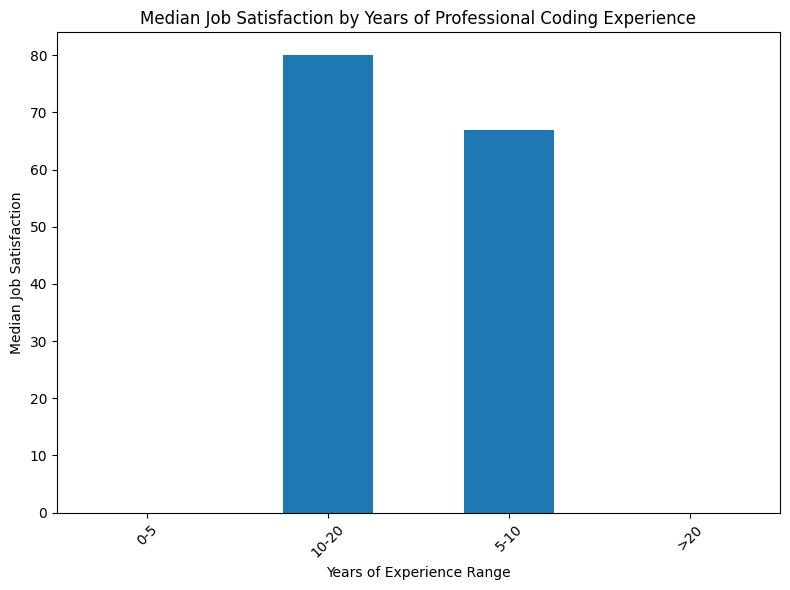

In [12]:
# Calculate median JobSat for each experience range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()
print("Median JobSat by Experience Range:")
print(median_job_sat)

# Visualize the relationship using a bar plot
median_job_sat.plot(kind='bar', figsize=(8, 6))
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience Range')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\257254617.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df_filtered, palette='viridis', order=job_sat_counts.index)


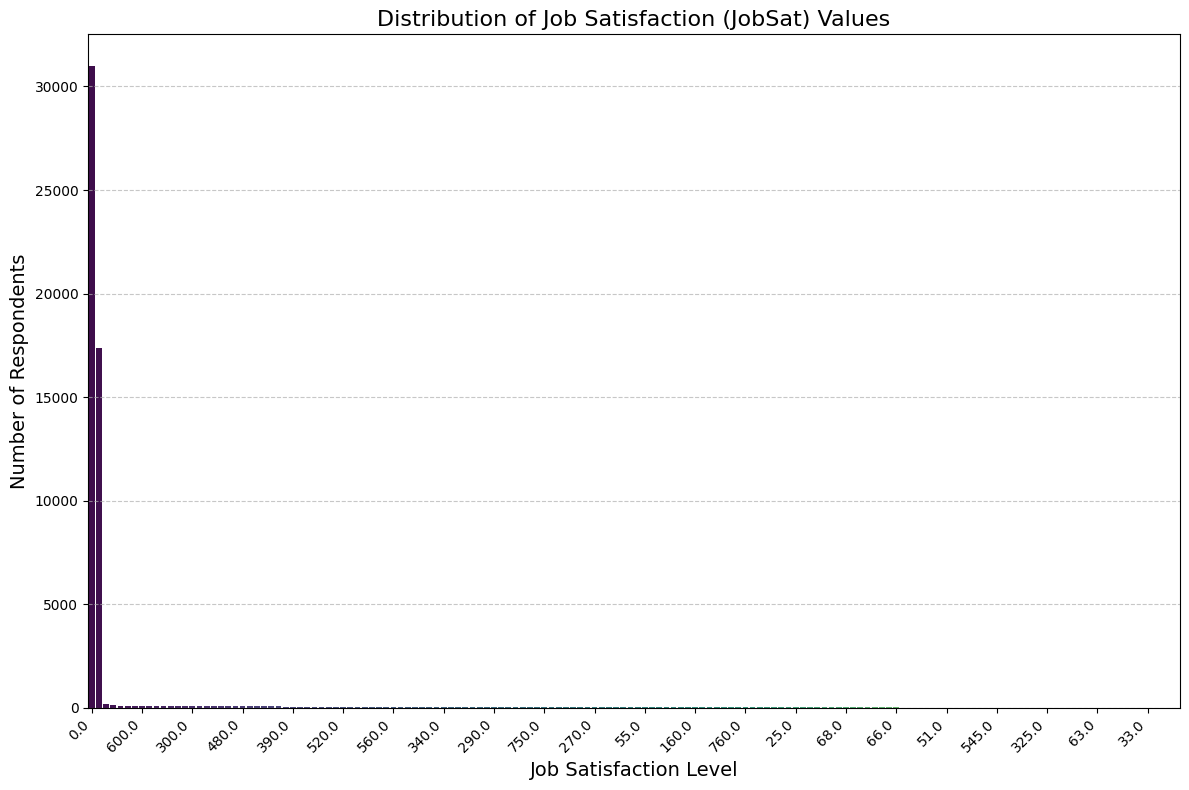

In [19]:
# Group and sort JobSat values to reduce clutter if necessary
job_sat_counts = df['JobSat'].value_counts()
job_sat_counts = job_sat_counts[job_sat_counts > 10]  # Only keep values with more than 10 occurrences

# Create a filtered DataFrame
df_filtered = df[df['JobSat'].isin(job_sat_counts.index)]

# Create a count plot to visualize the distribution of 'JobSat'
plt.figure(figsize=(12, 8))
sns.countplot(x='JobSat', data=df_filtered, palette='viridis', order=job_sat_counts.index)

# Add labels and title
plt.title('Distribution of Job Satisfaction (JobSat) Values', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)

# Improve x-axis by showing fewer ticks
plt.xticks(ticks=range(0, len(job_sat_counts.index), max(1, len(job_sat_counts.index) // 20)),
           labels=job_sat_counts.index[::max(1, len(job_sat_counts.index) // 20)], rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


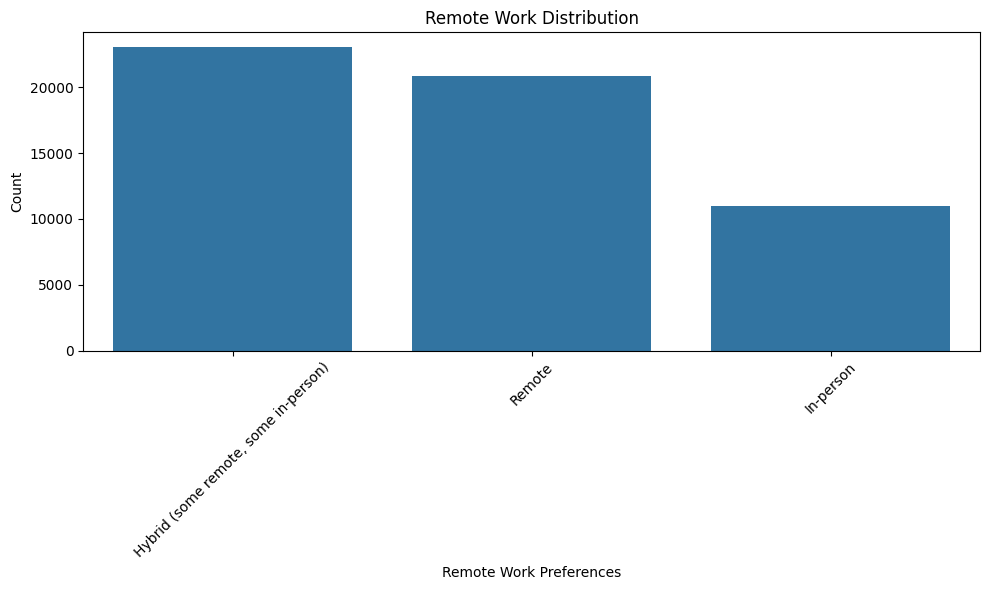

In [22]:
# Count plot for remote work distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Preferences')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Cross-tabulation of remote work preferences by employment type and job roles
remote_work_crosstab = pd.crosstab(index=[df['RemoteWork'],df['Employment']], columns=df['RemoteWork'], normalize='index')

# Display the cross-tabulated data
print("Remote Work Preferences by Employment Type and Job Role:")
print(remote_work_crosstab)

Remote Work Preferences by Employment Type and Job Role:
RemoteWork                                                                               Hybrid (some remote, some in-person)  \
RemoteWork                           Employment                                                                                 
Hybrid (some remote, some in-person) Employed, full-time                                                                  1.0   
                                     Employed, full-time;Employed, part-time                                              1.0   
                                     Employed, full-time;Independent contractor, fre...                                   1.0   
                                     Employed, full-time;Independent contractor, fre...                                   1.0   
                                     Employed, full-time;Independent contractor, fre...                                   1.0   
...                                     

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


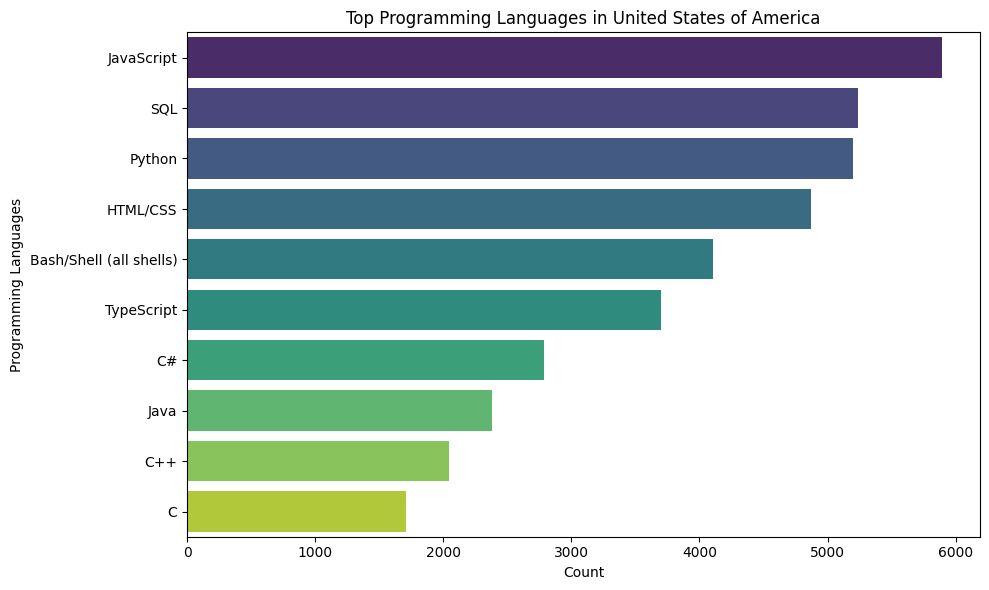

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


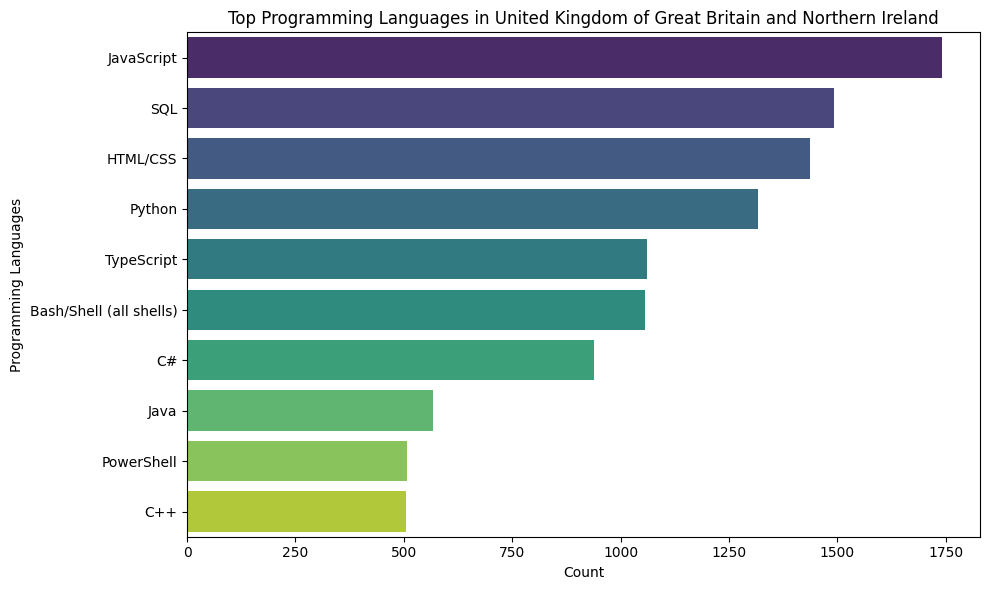

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


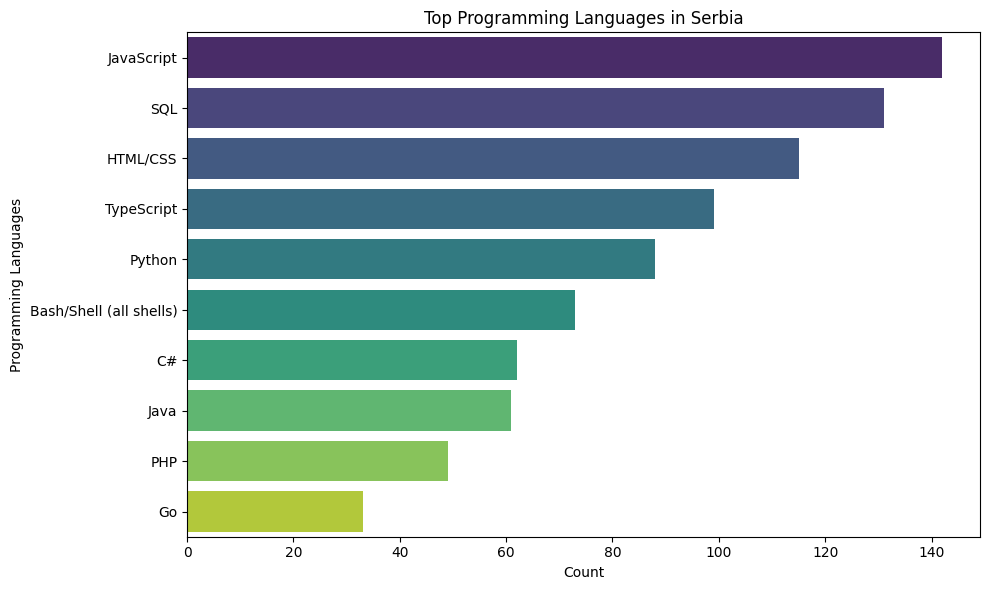

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


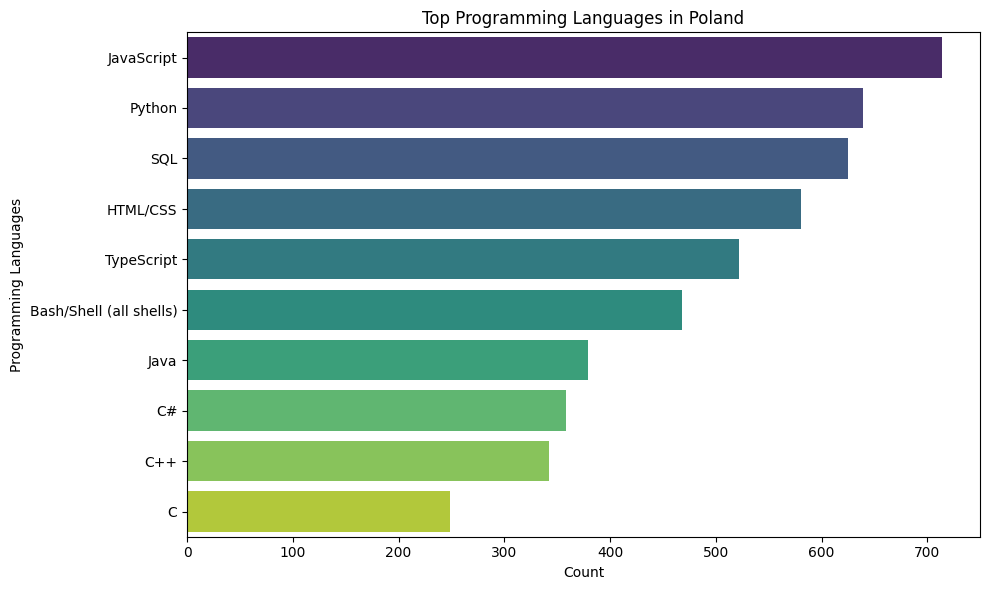

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


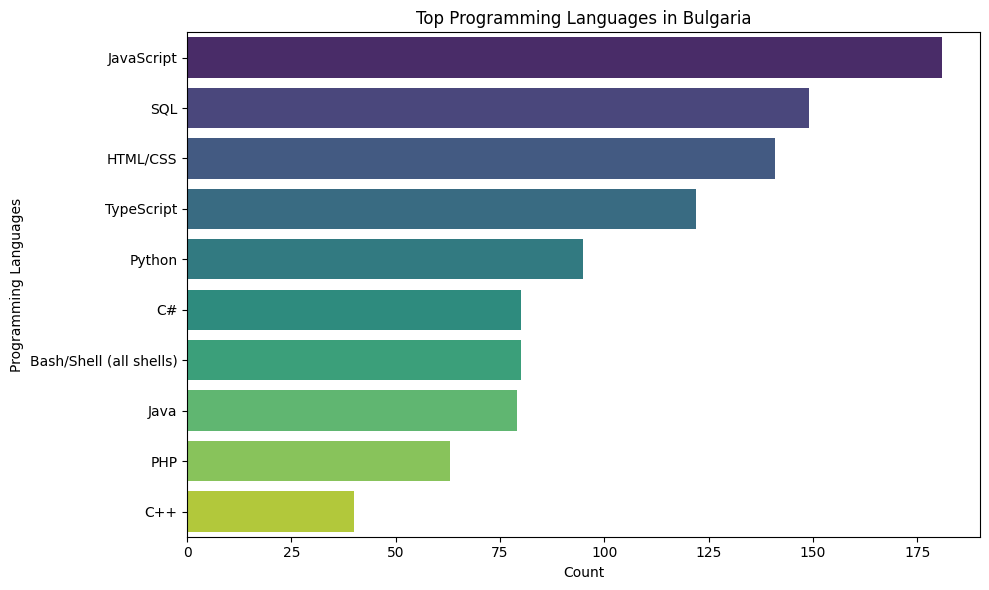

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


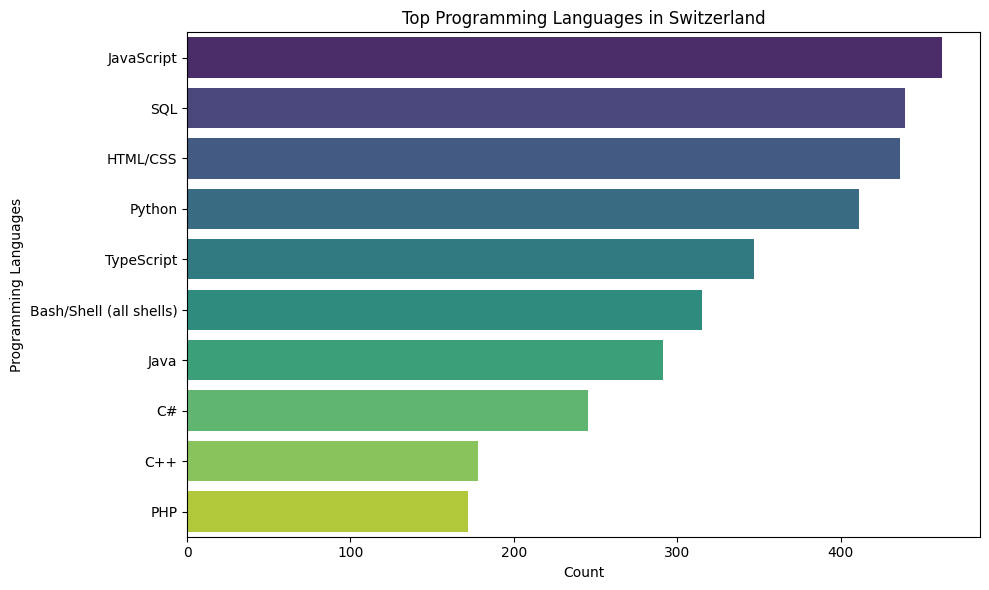

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


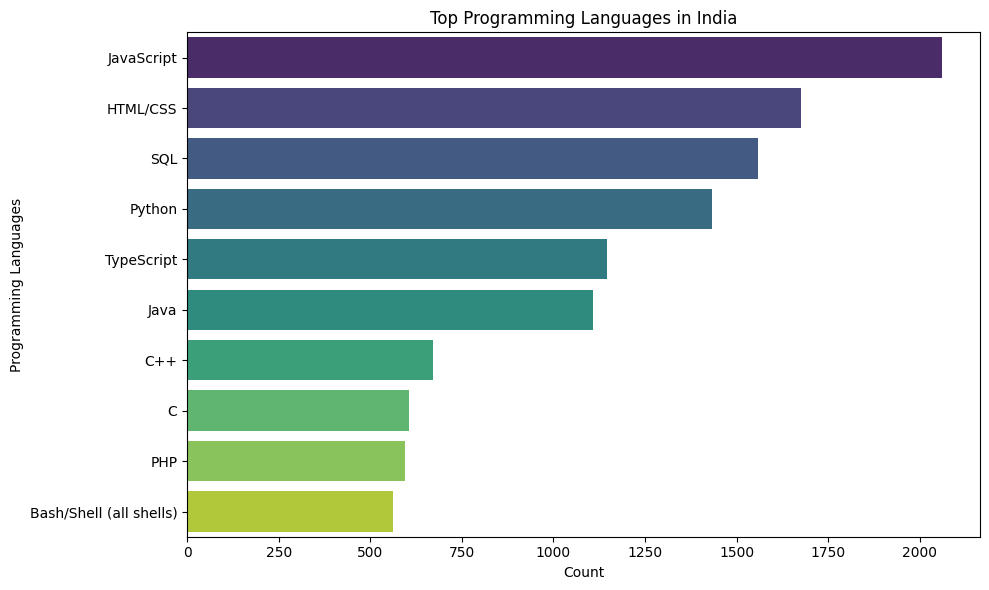

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


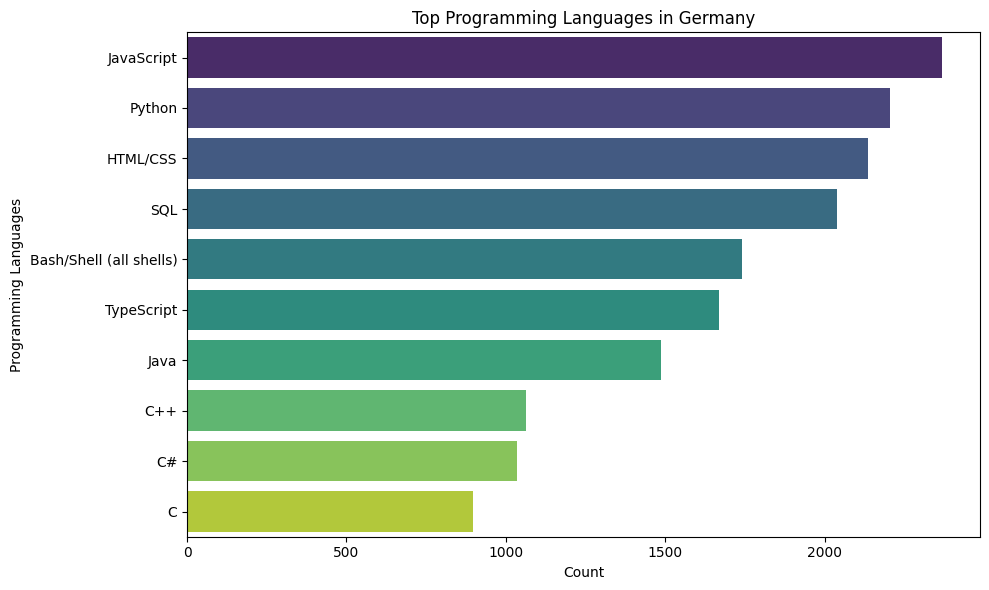

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


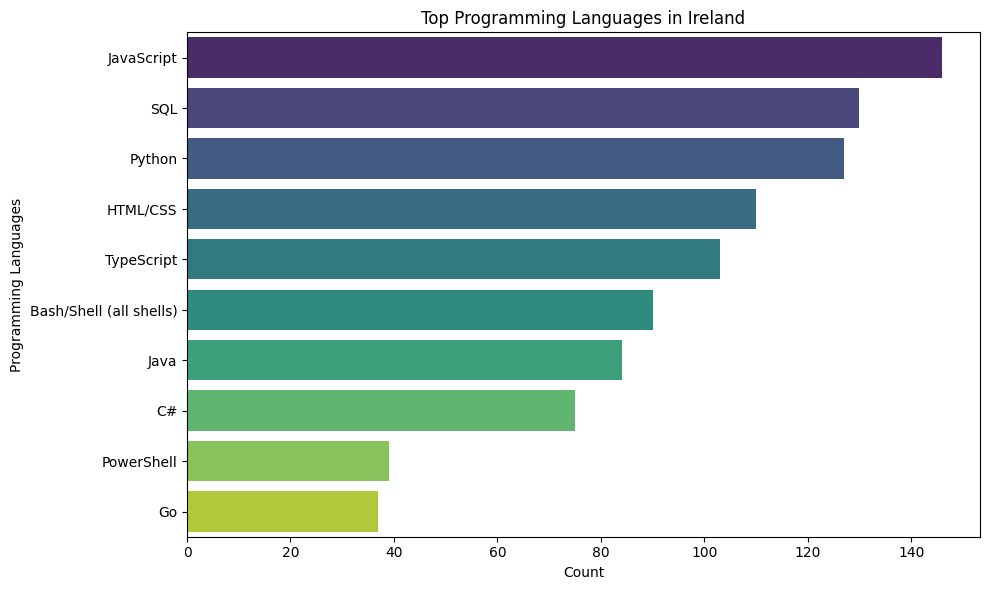

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


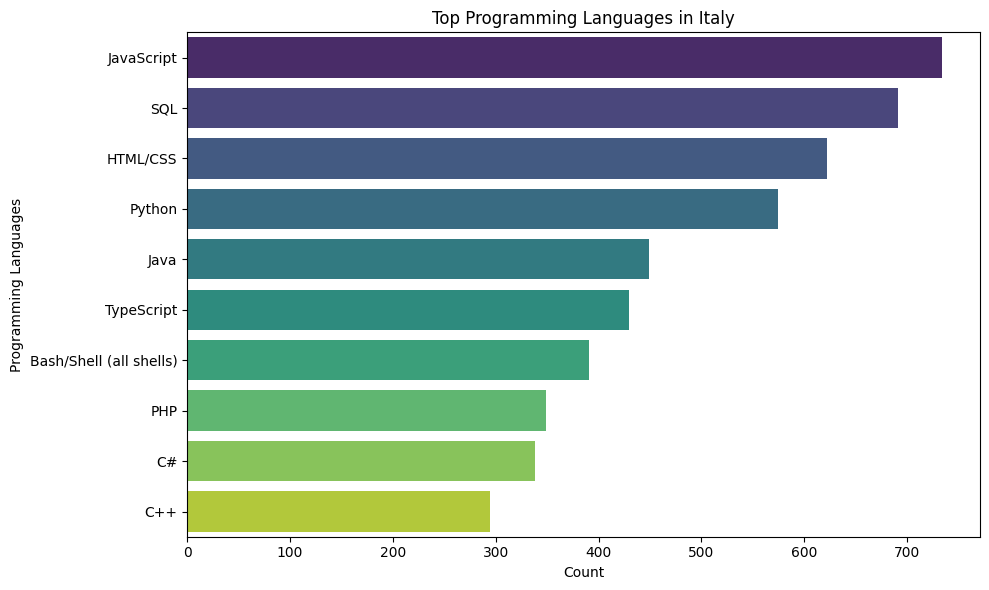

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


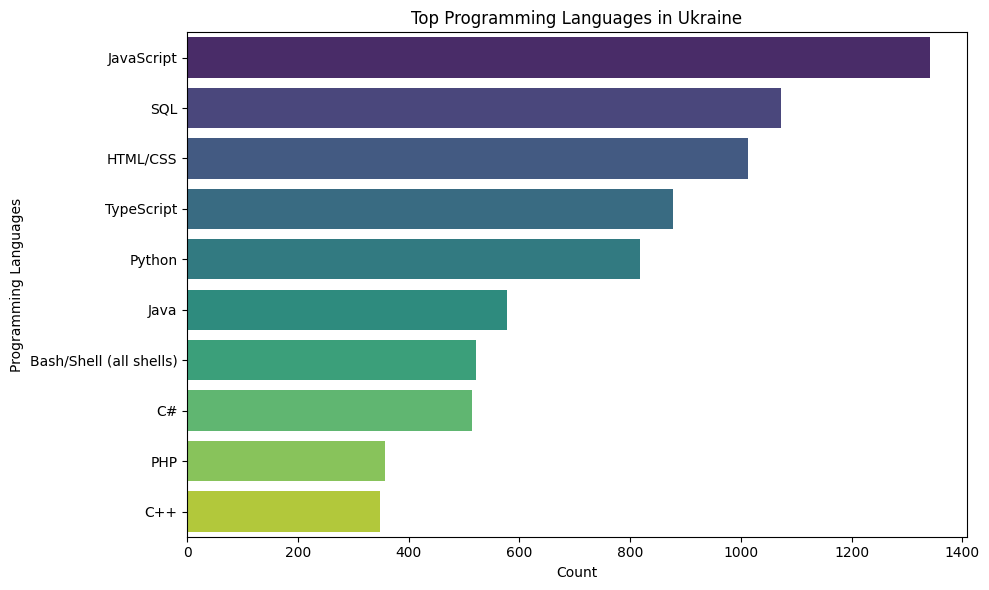

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


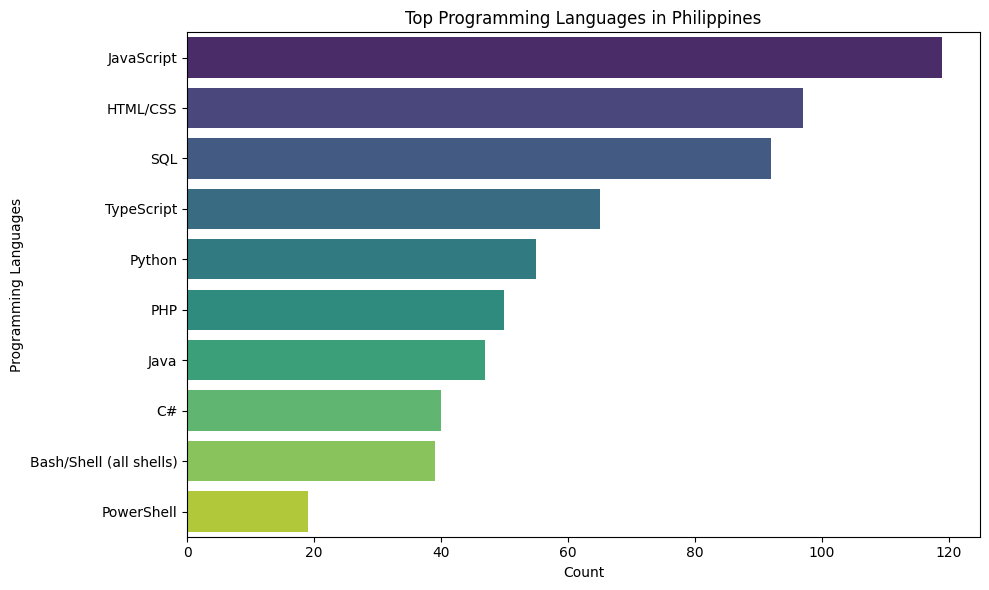

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


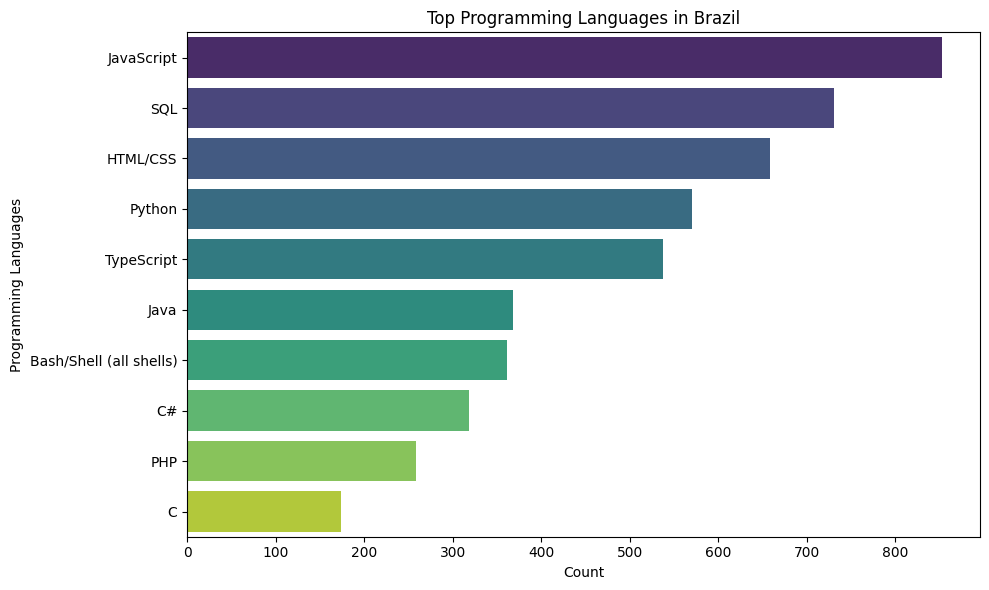

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


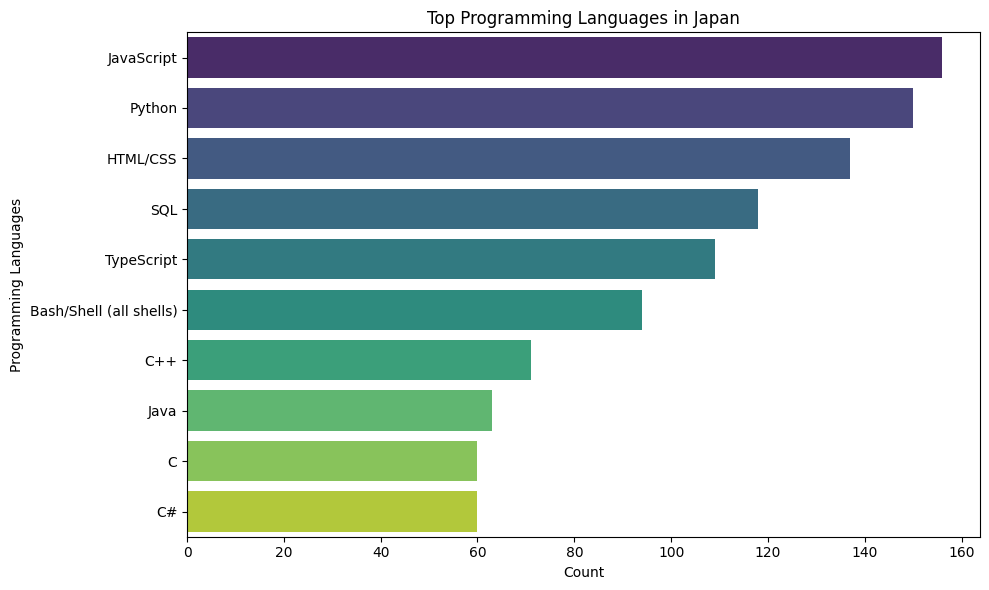

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


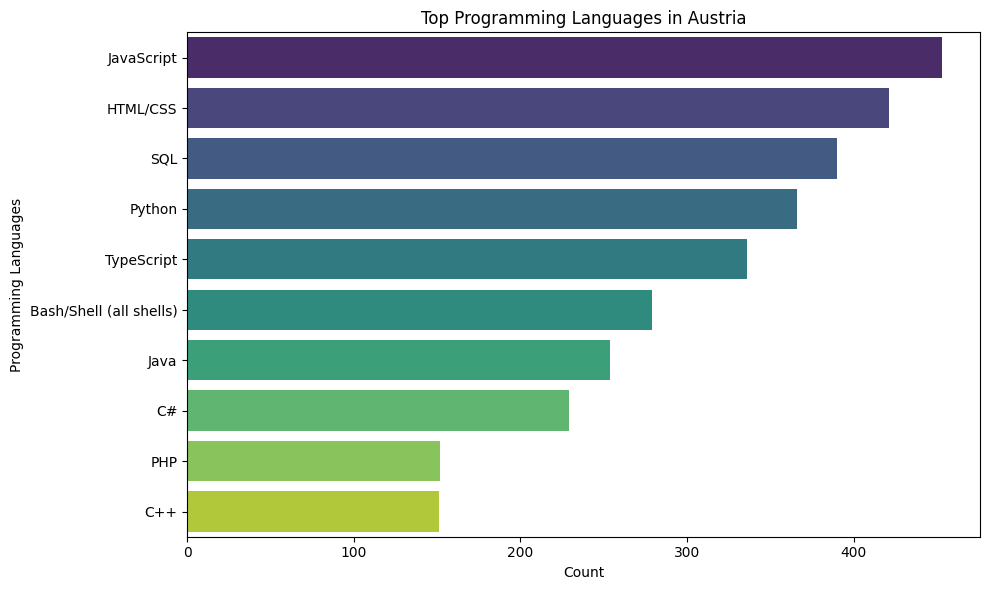

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


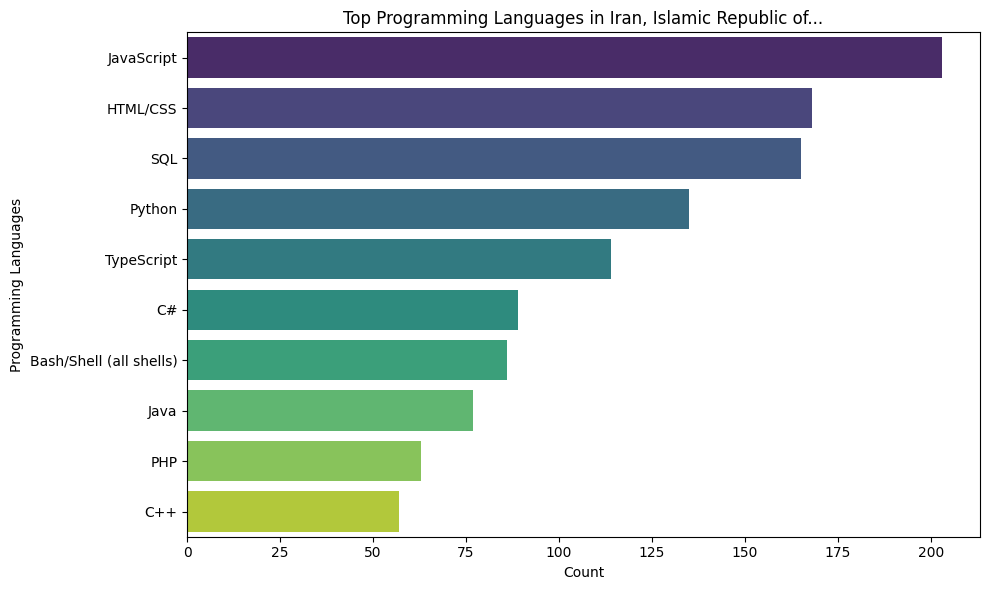

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


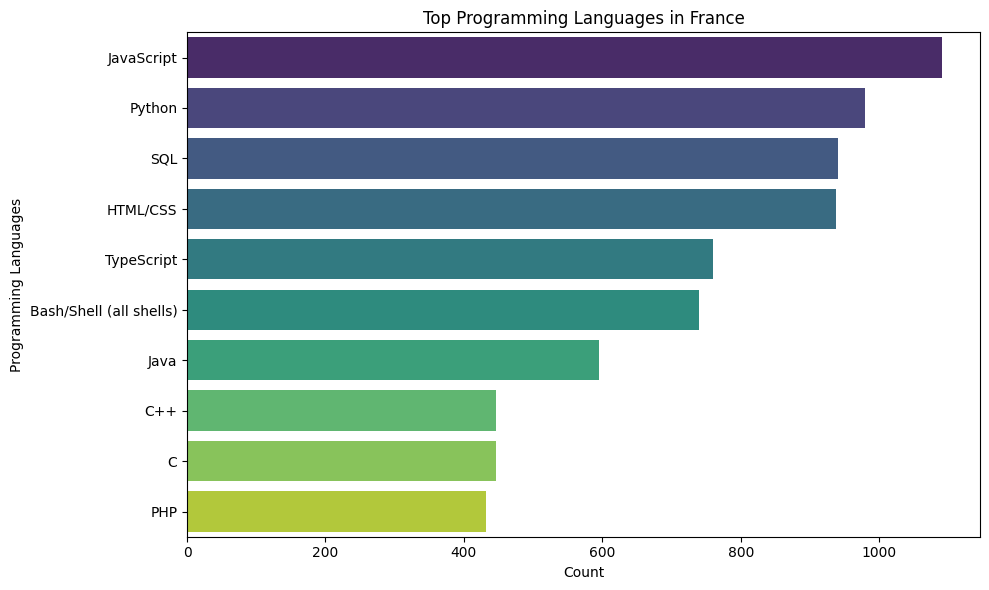

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


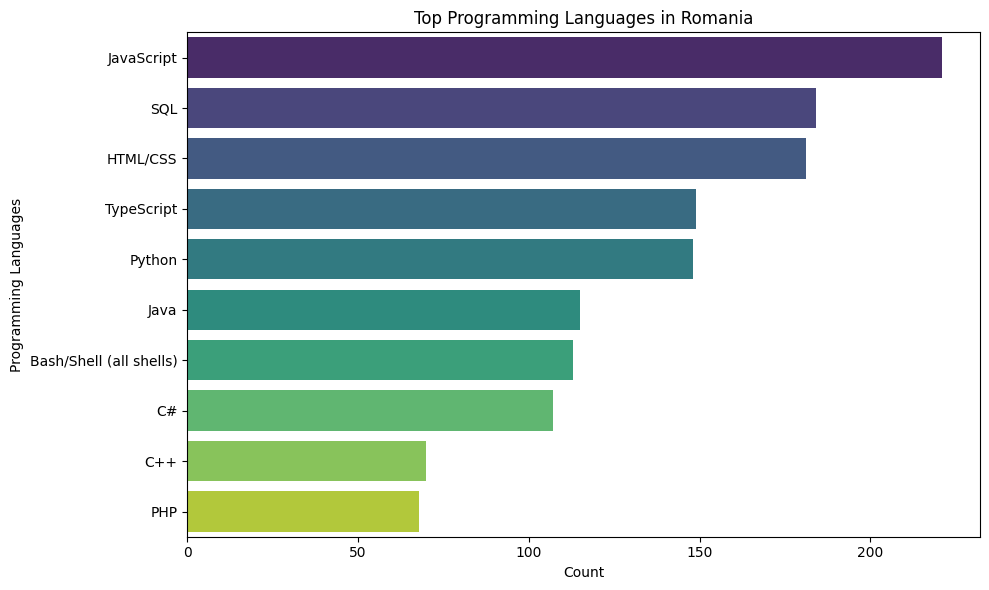

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


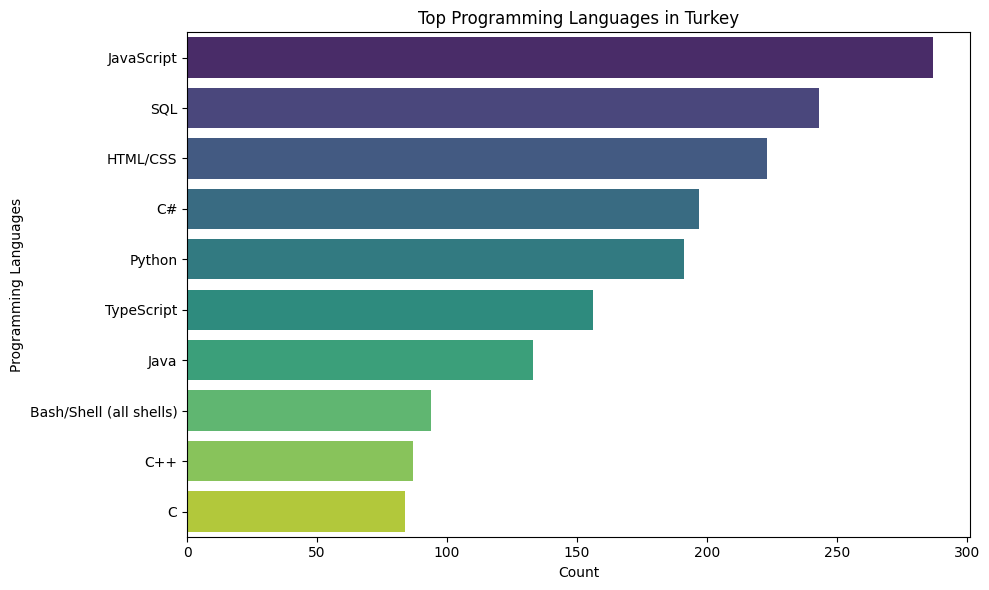

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


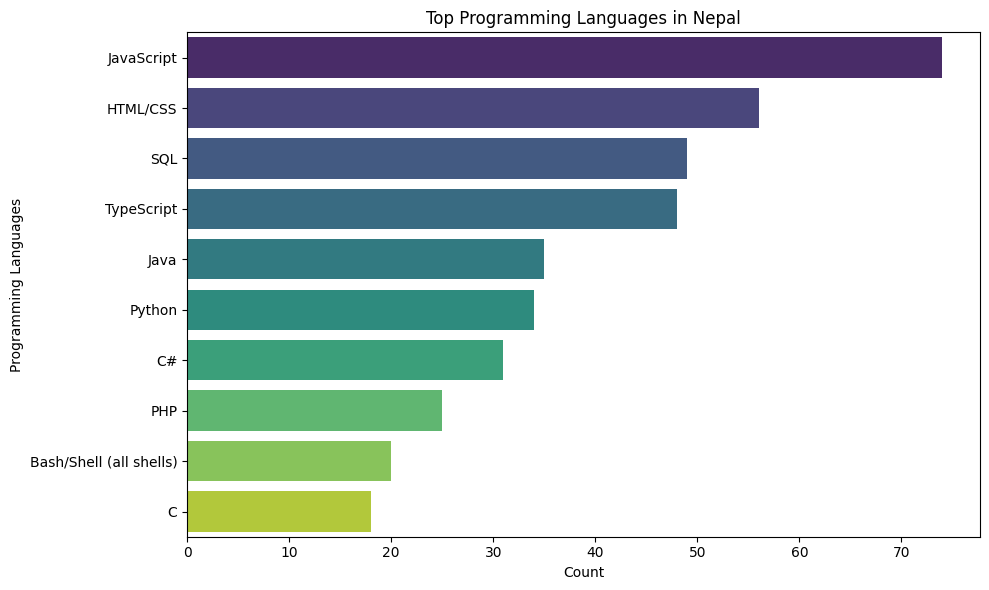

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


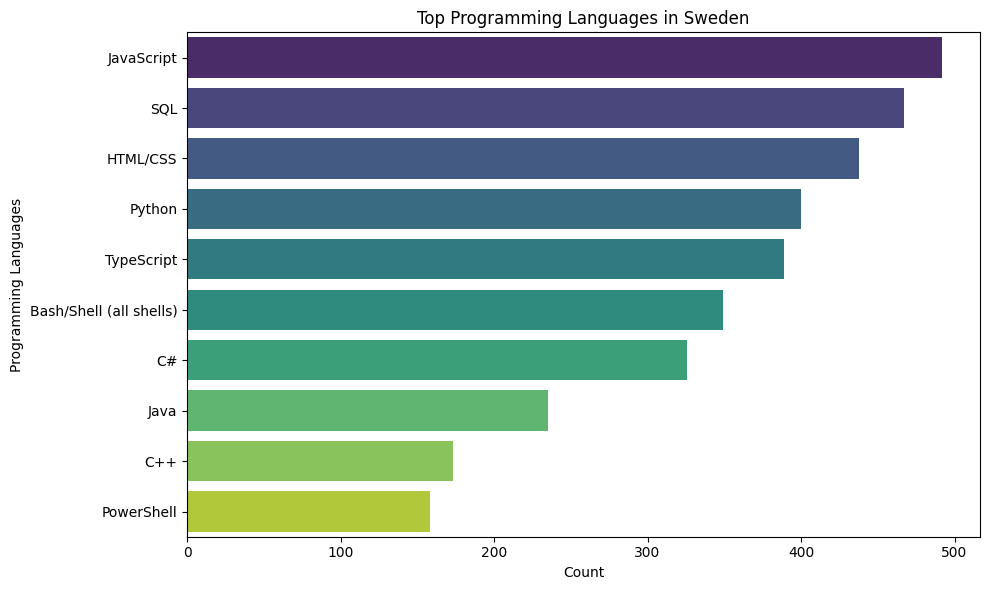

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


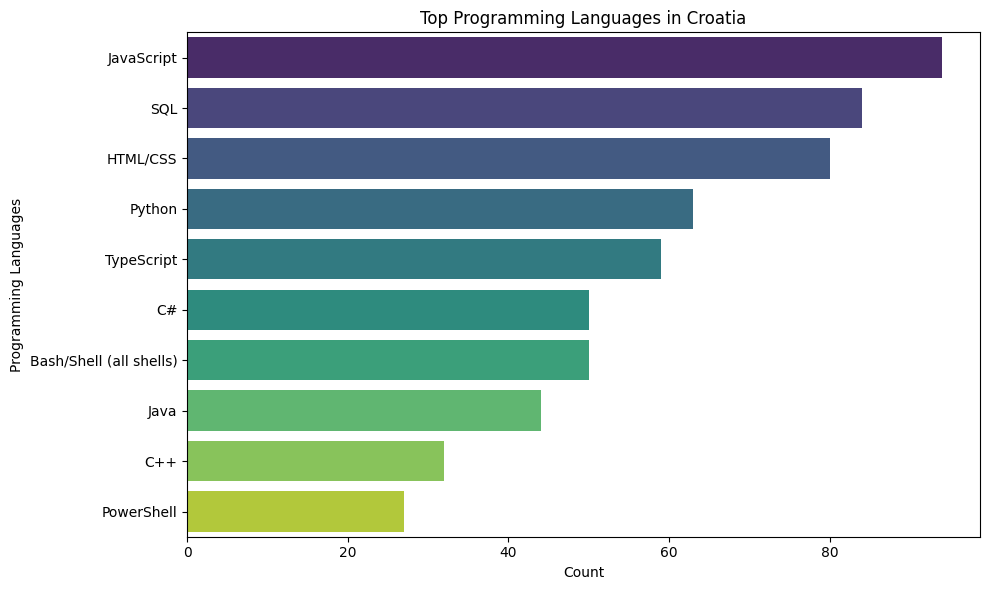

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


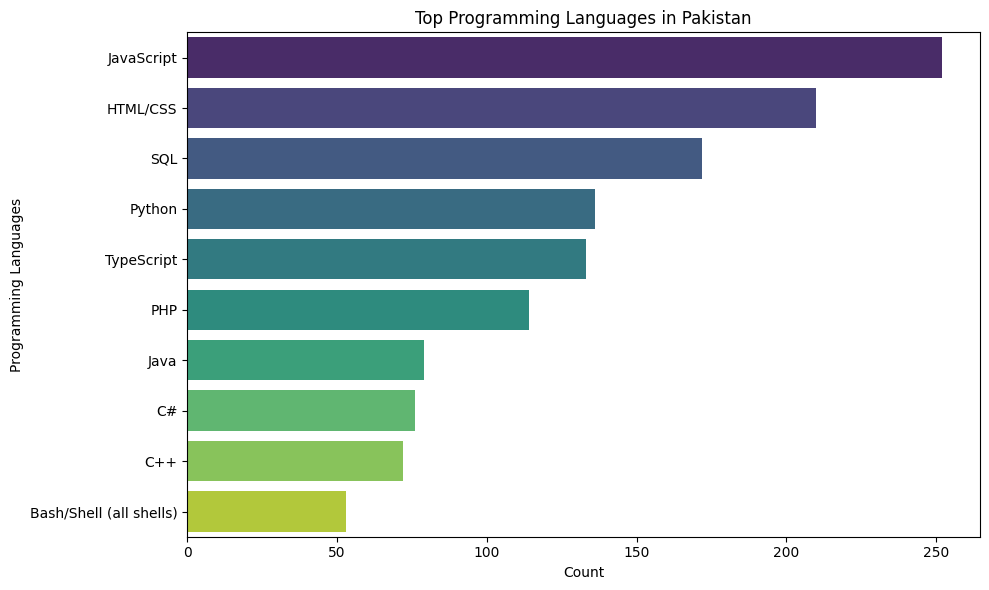

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


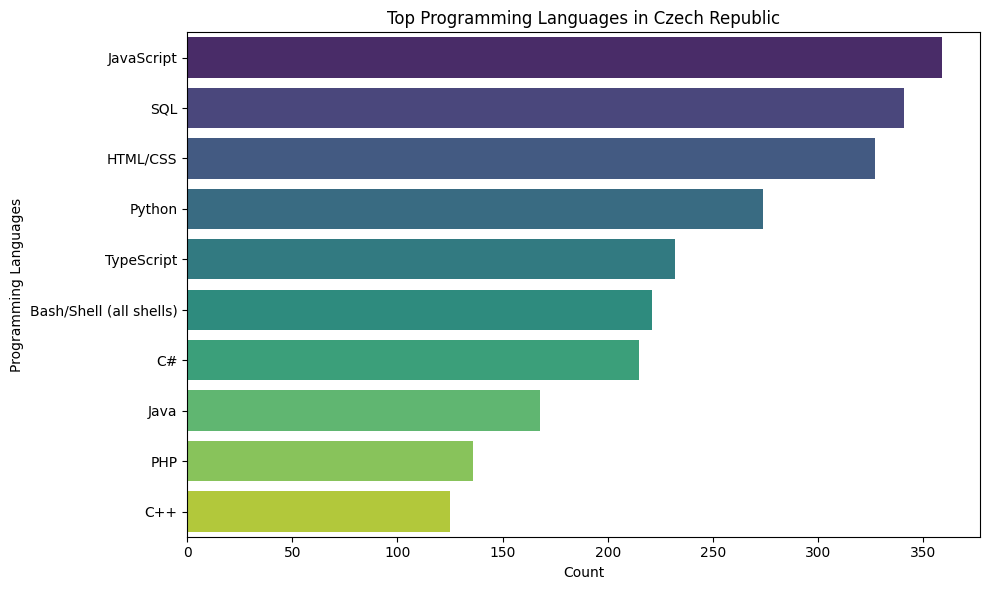

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


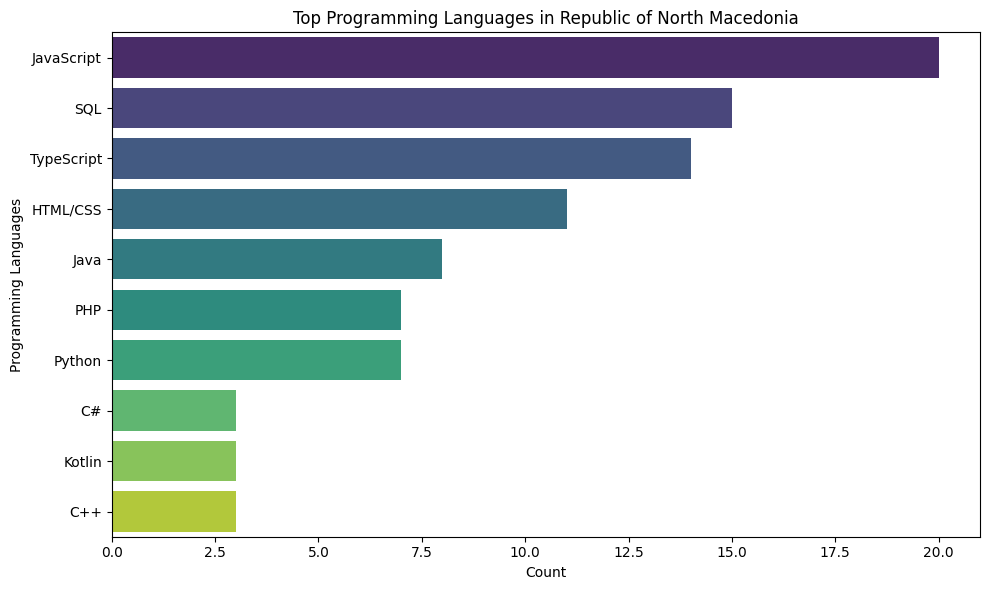

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


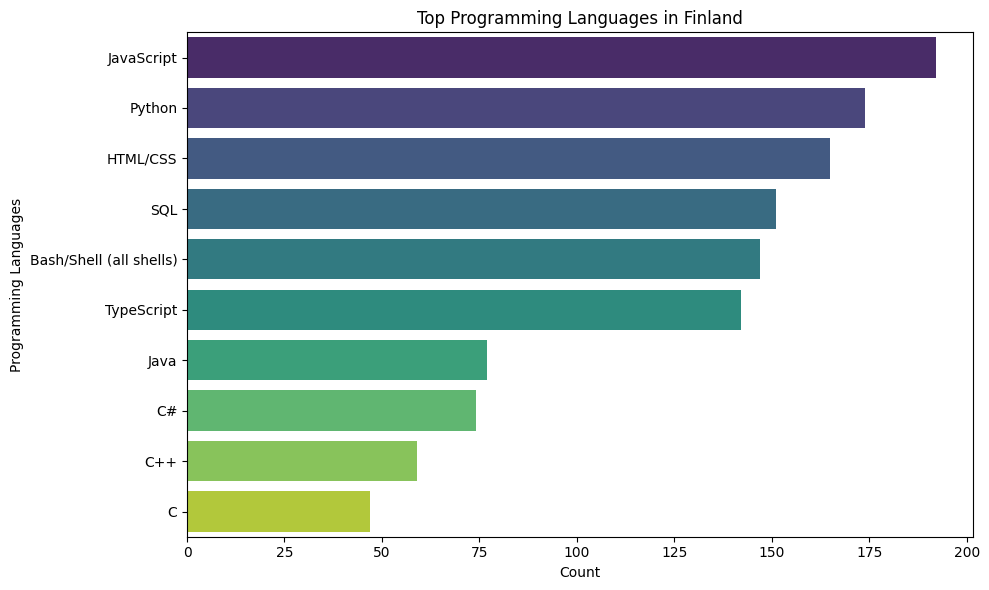

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


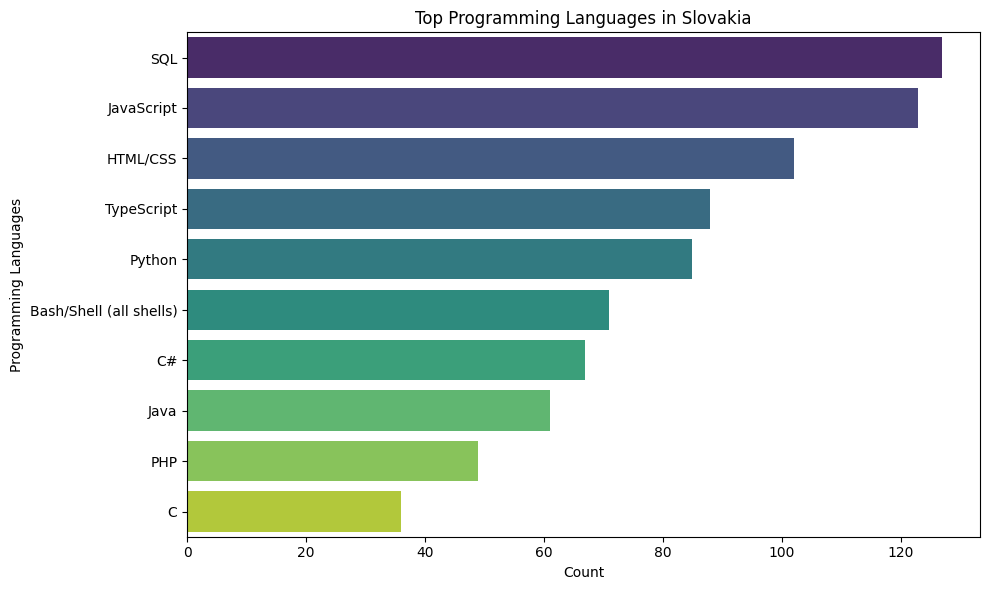

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


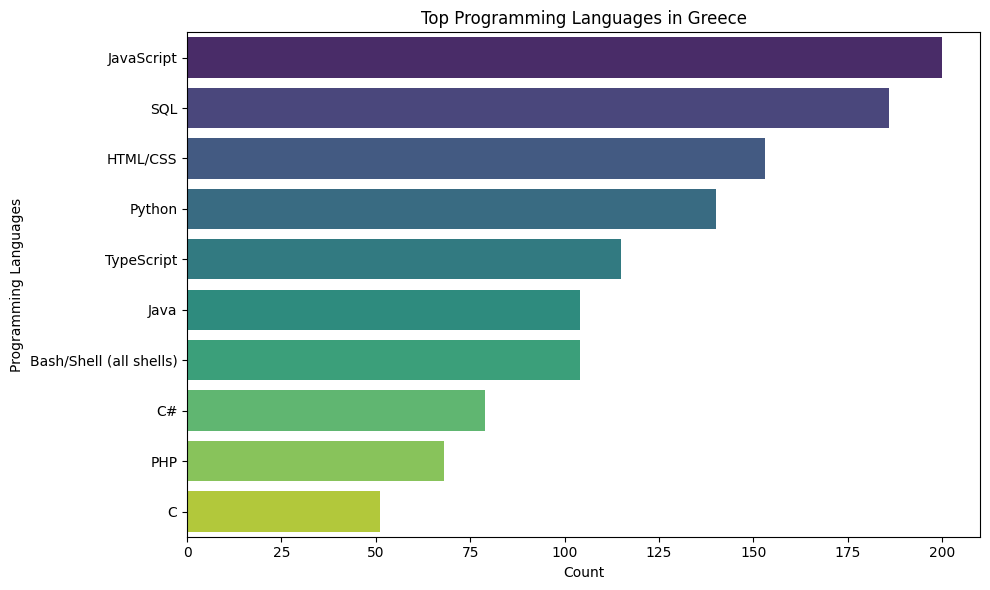

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


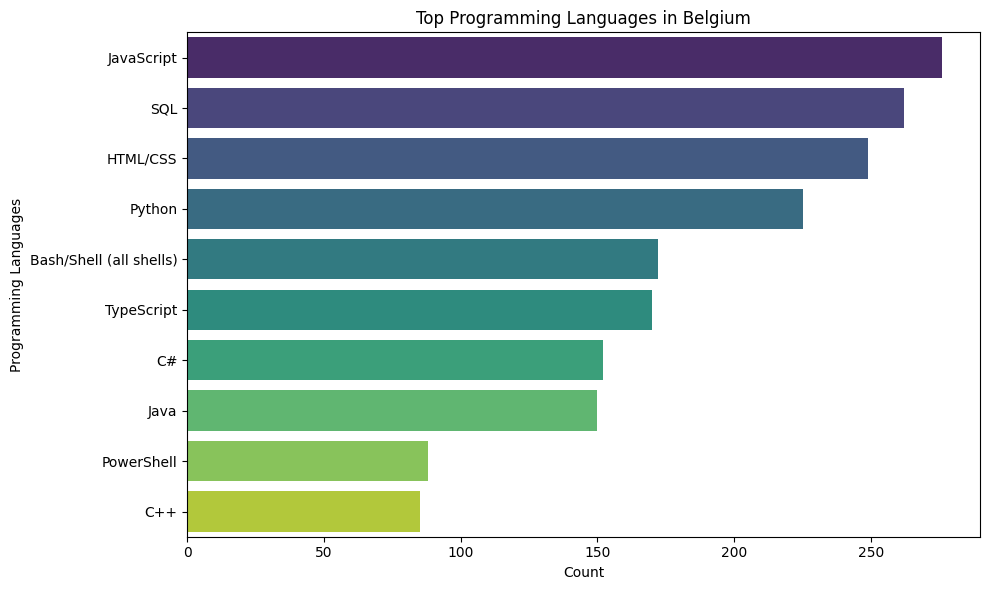

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


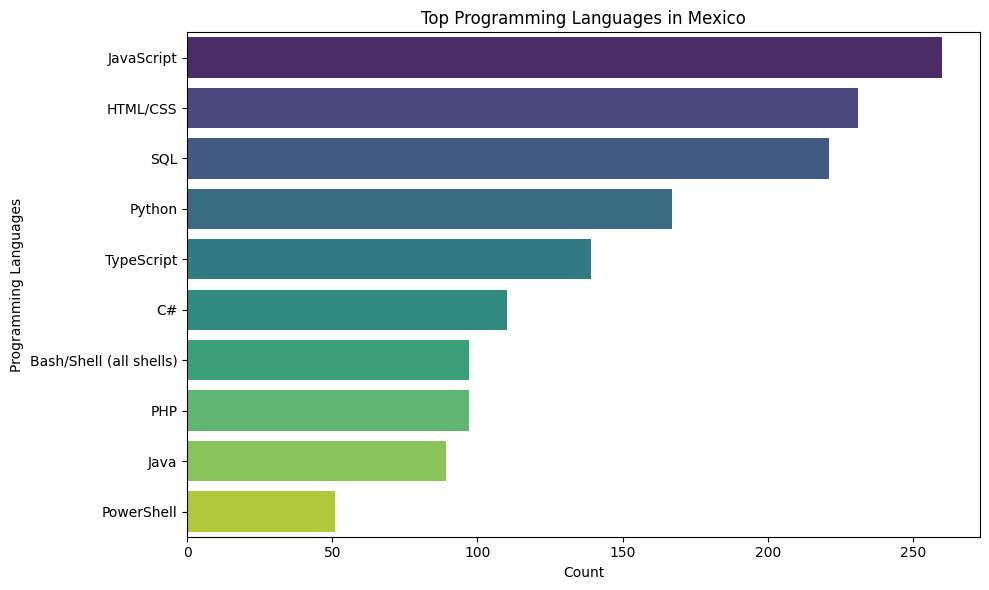

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


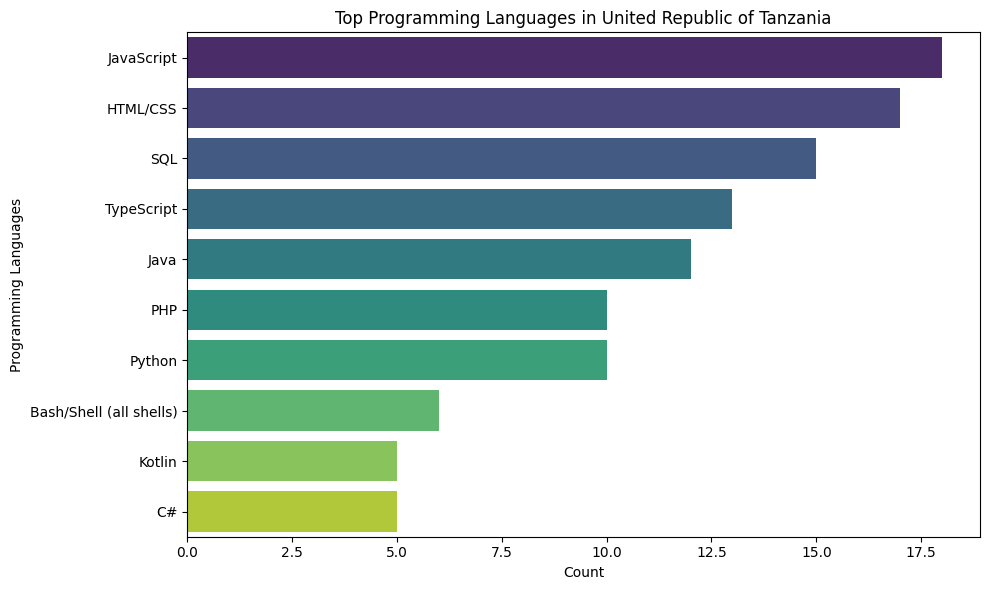

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


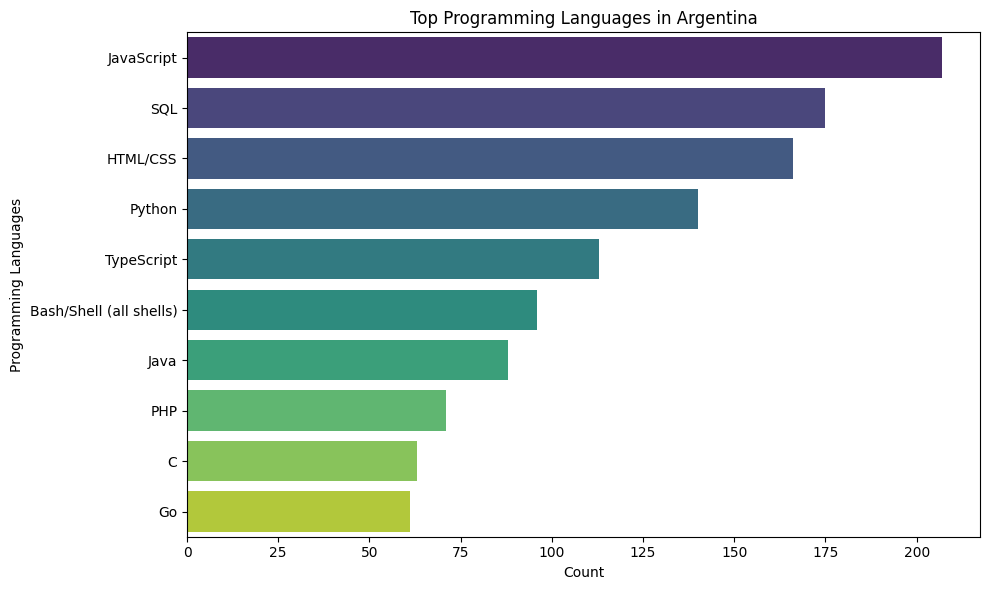

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


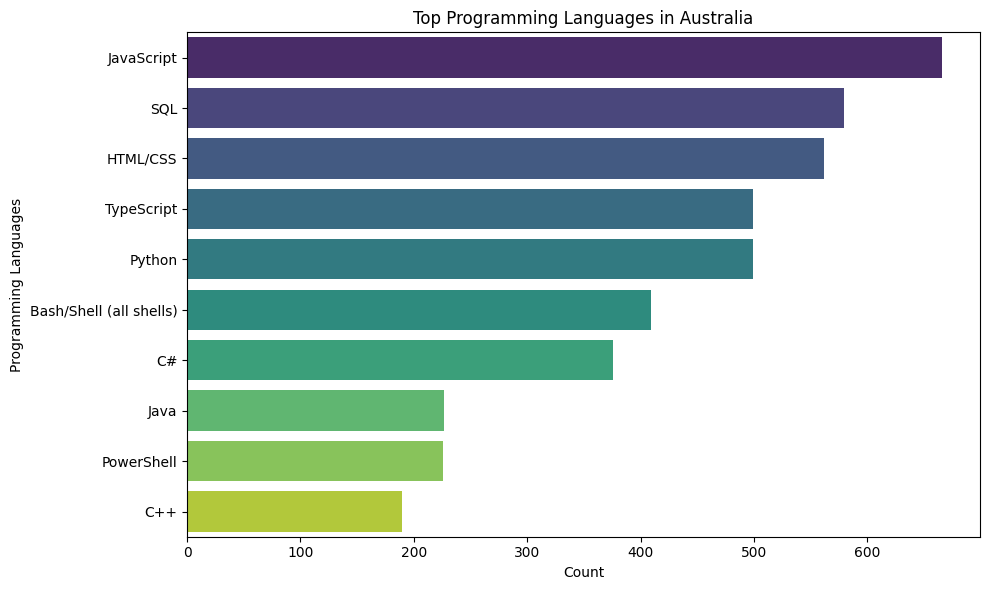

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


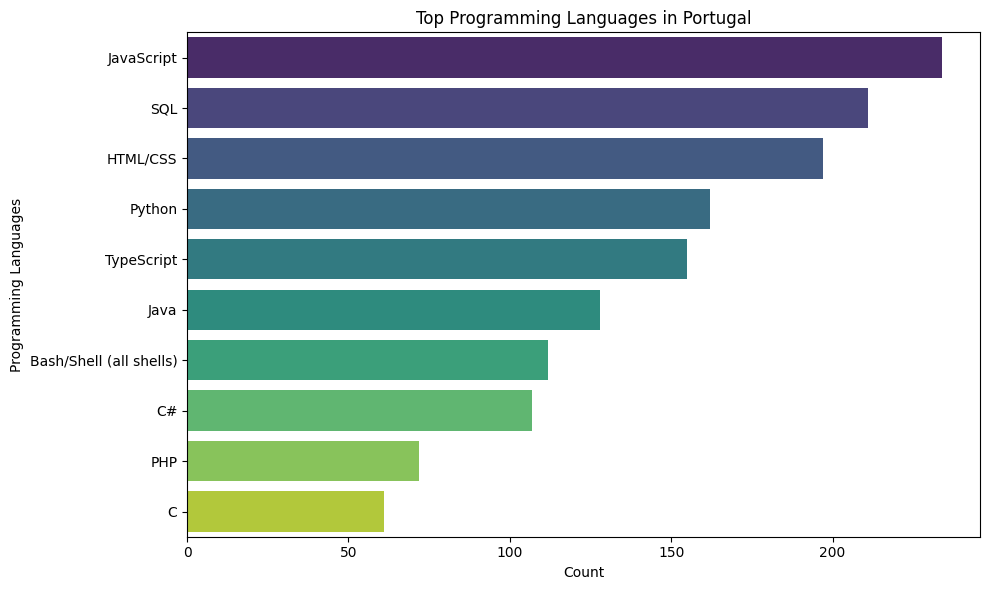

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


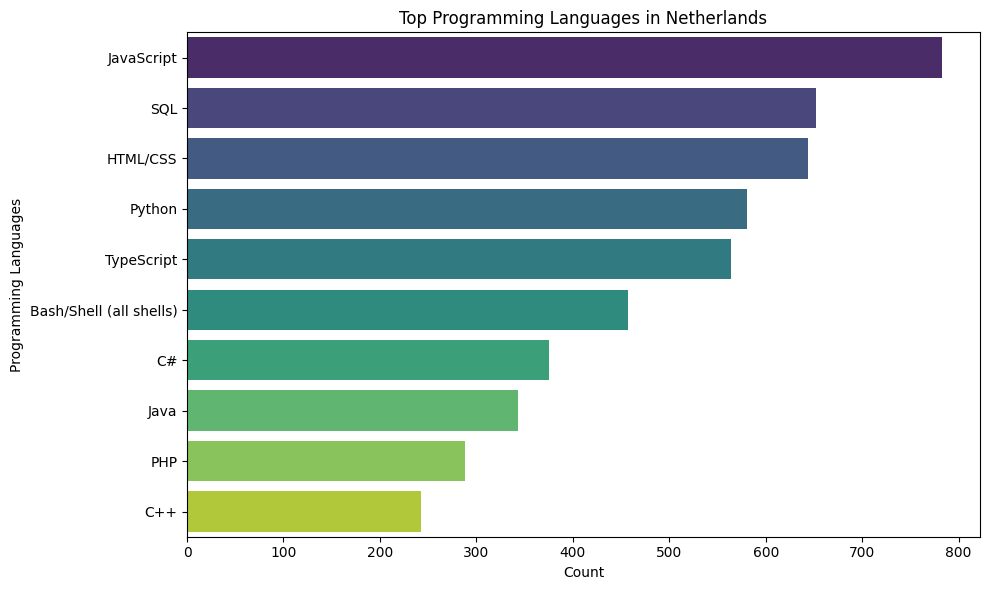

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


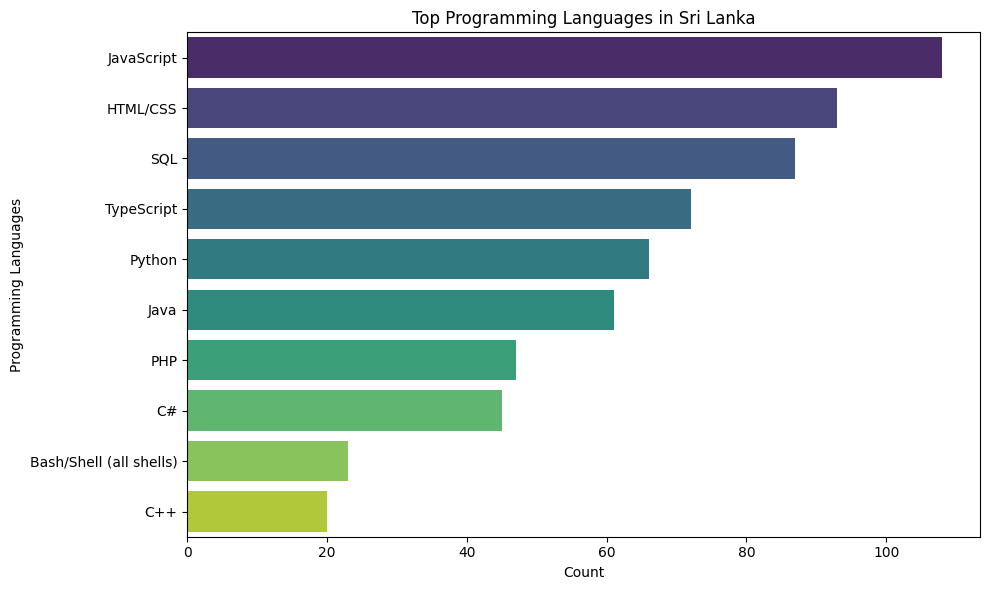

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


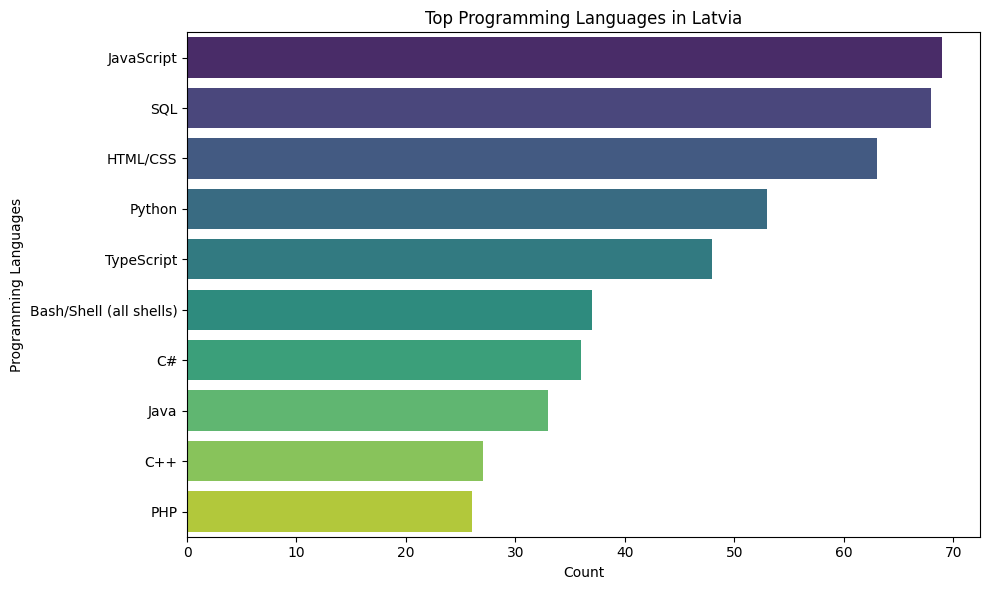

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


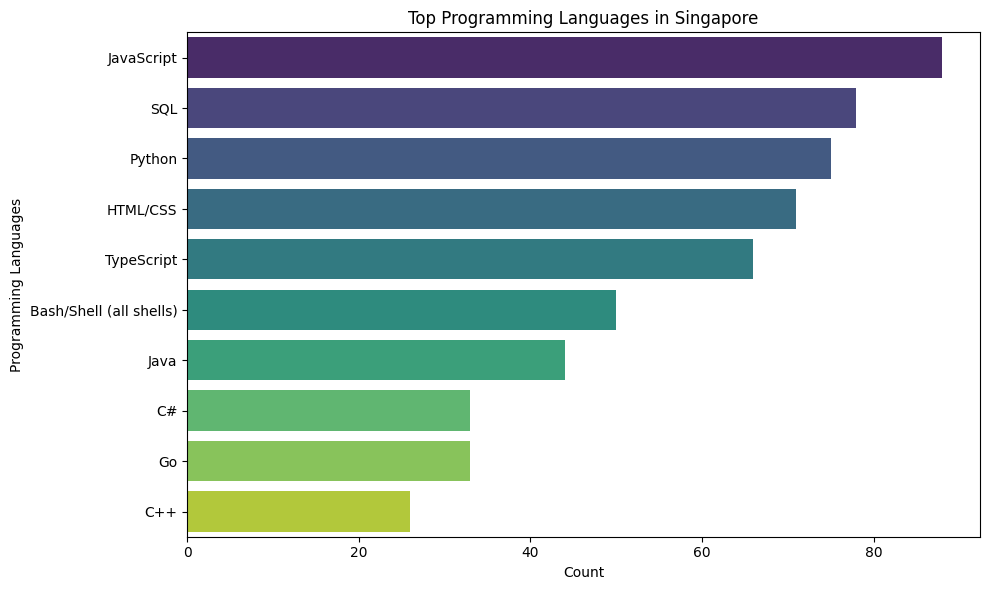

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


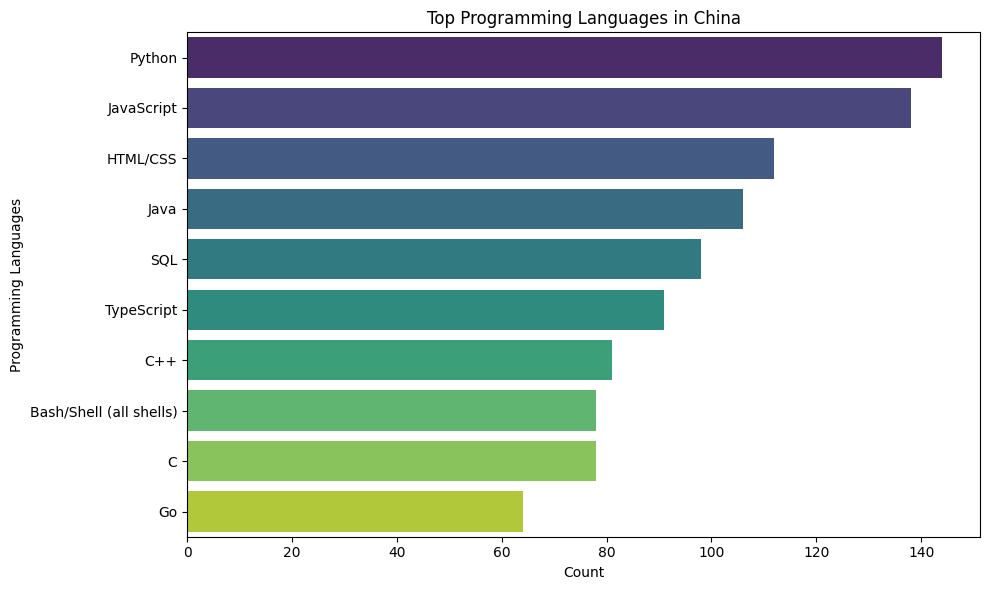

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


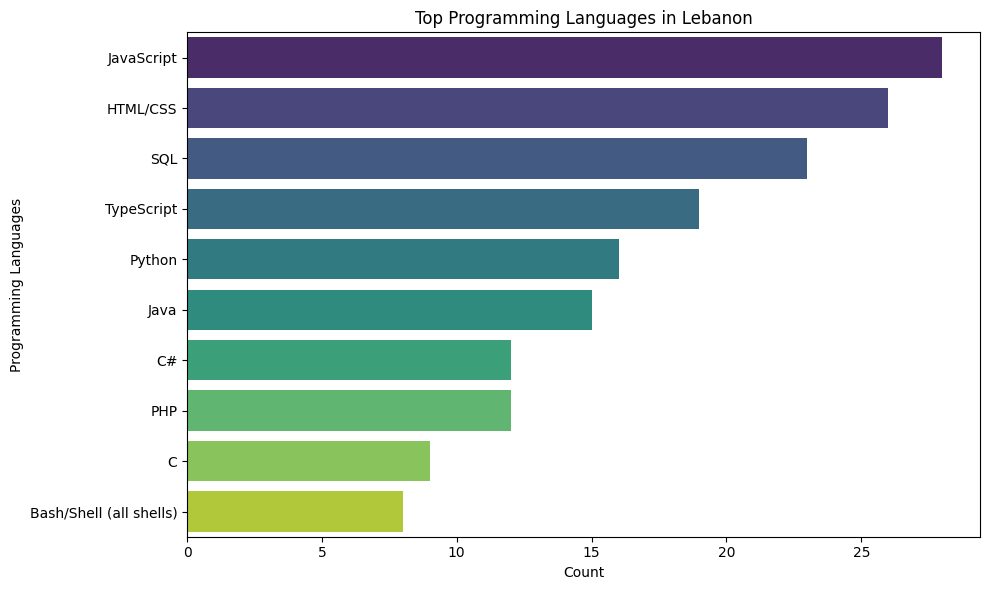

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


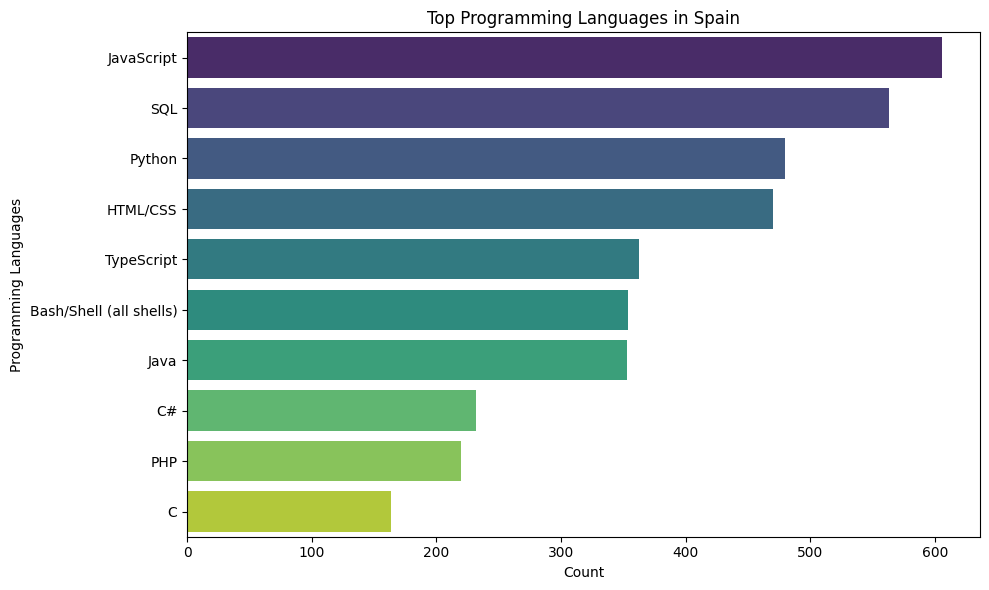

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


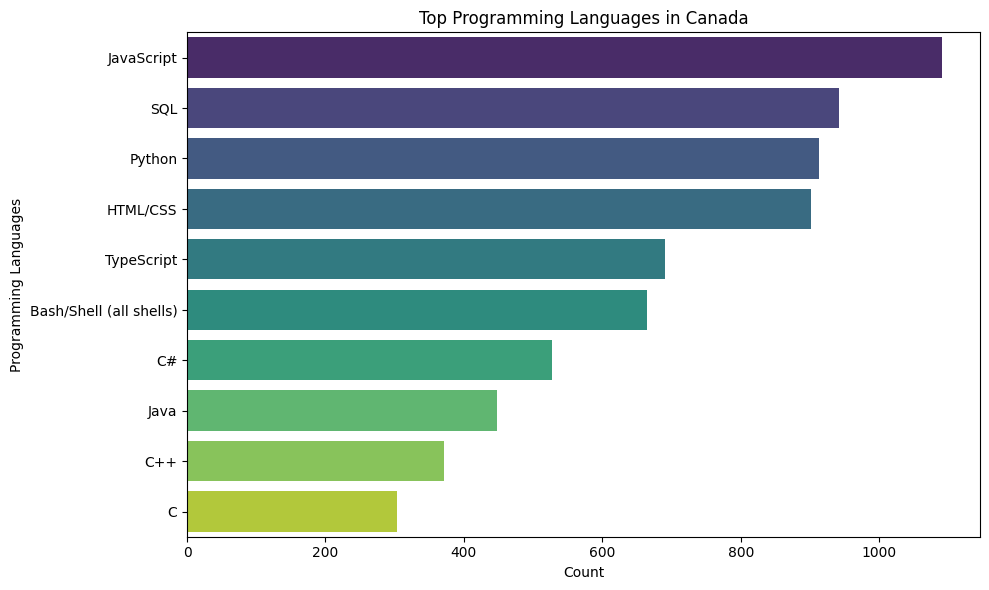

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


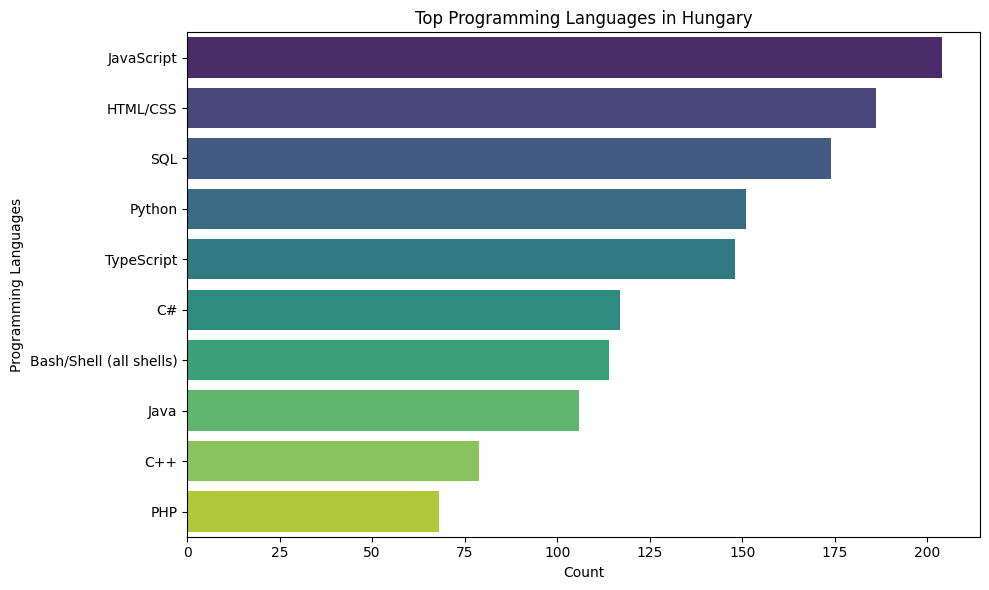

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


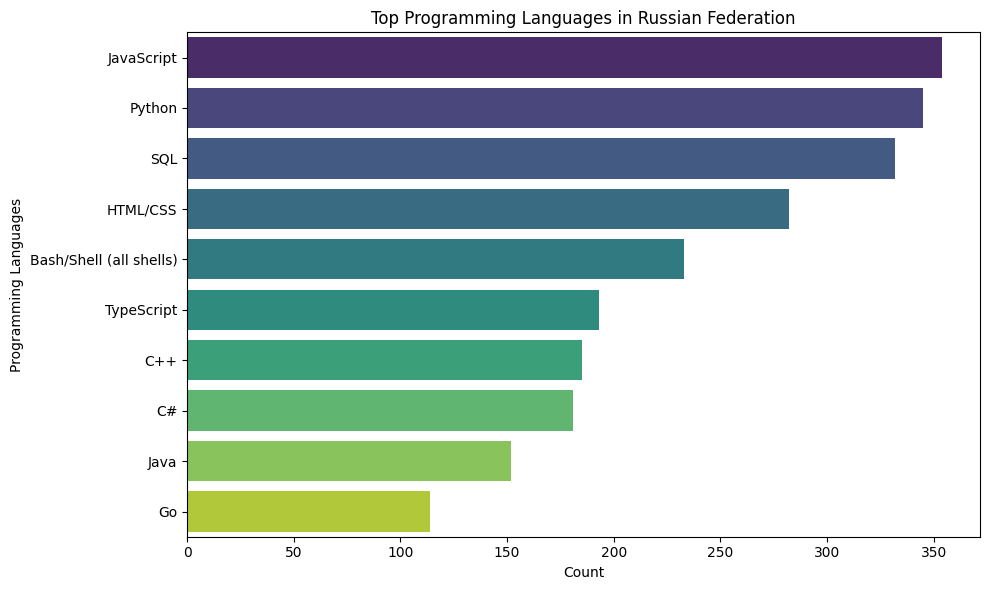

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


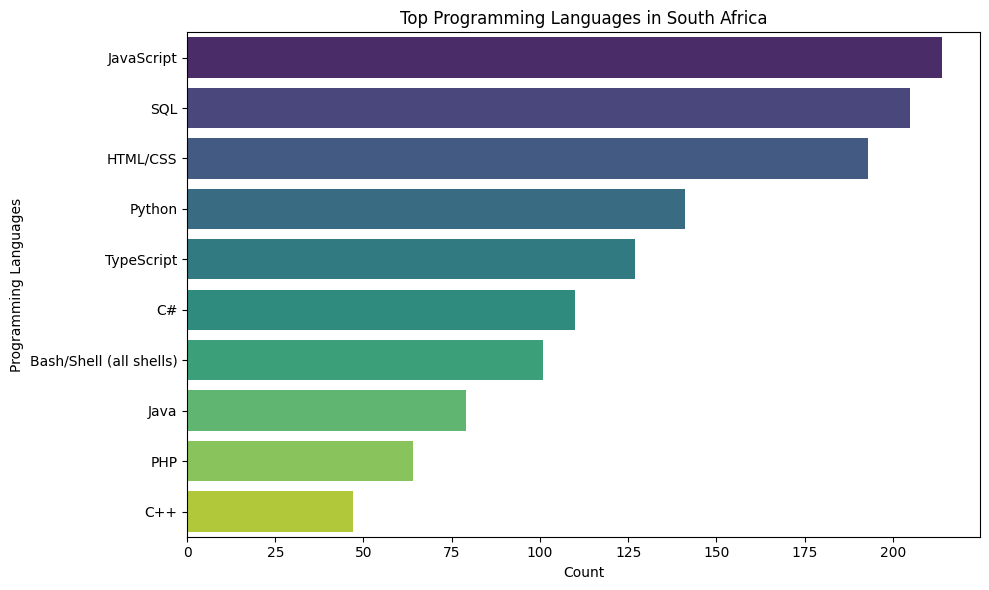

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


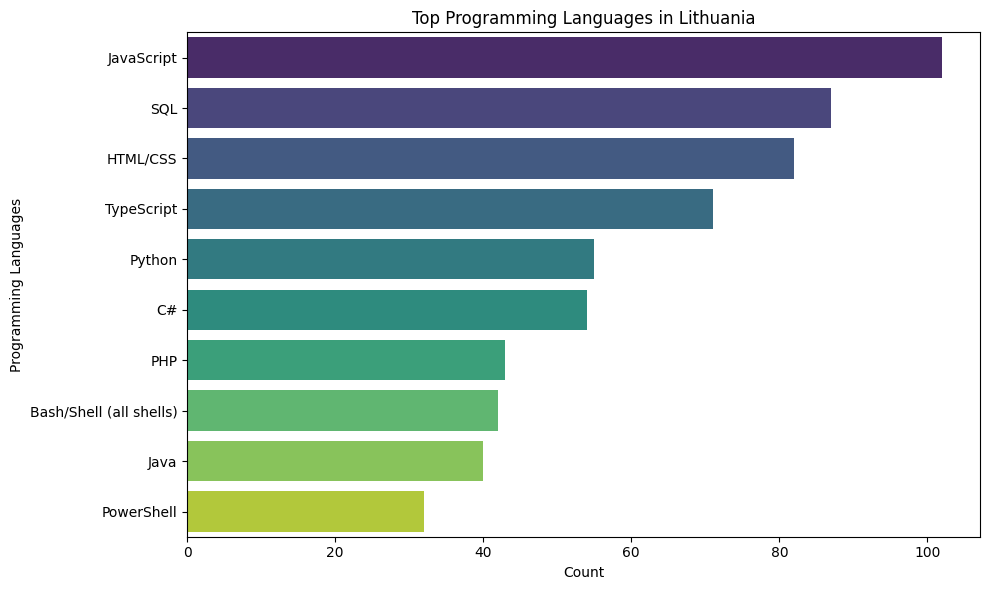

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


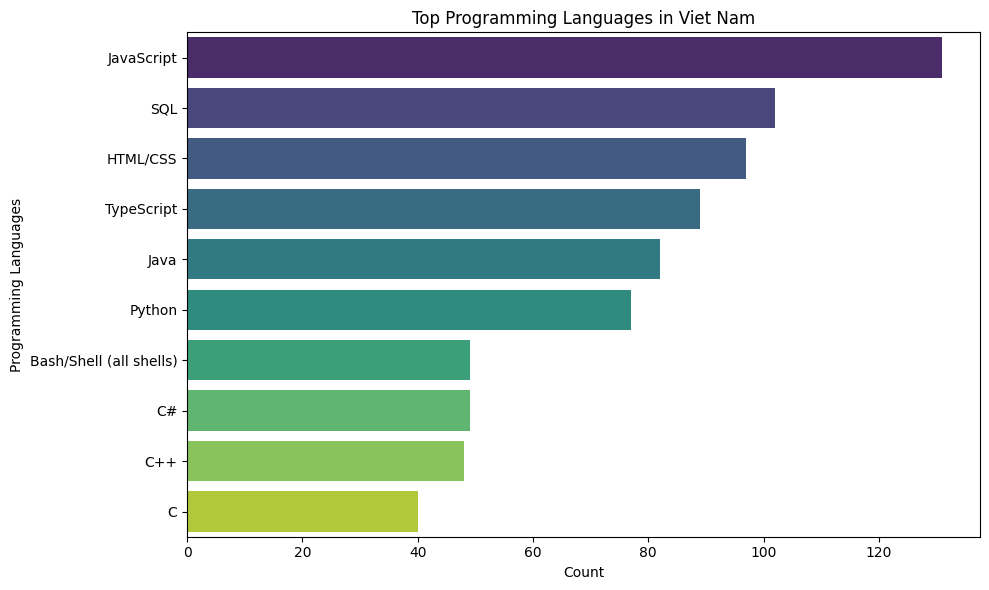

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


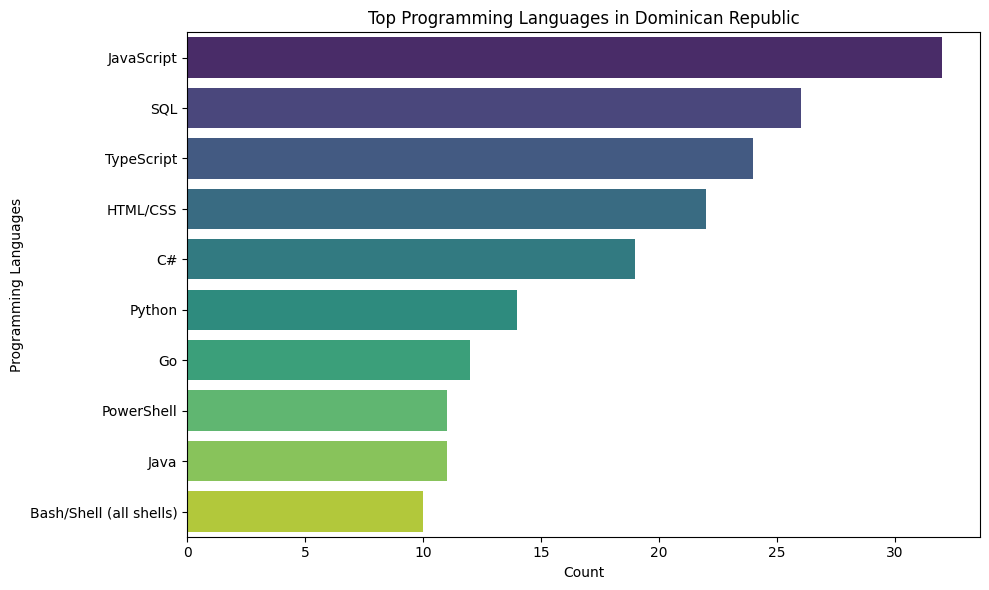

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


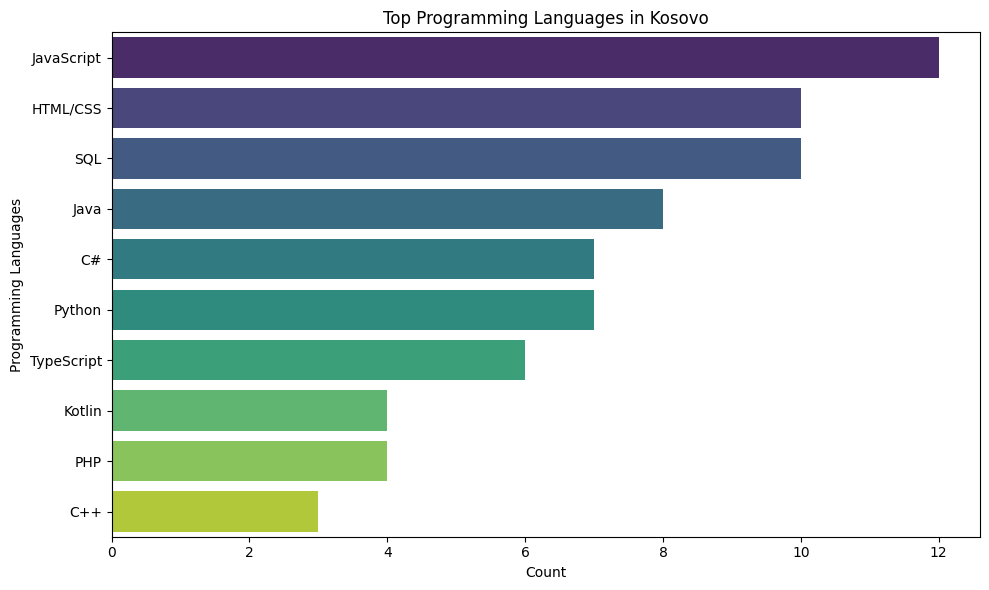

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


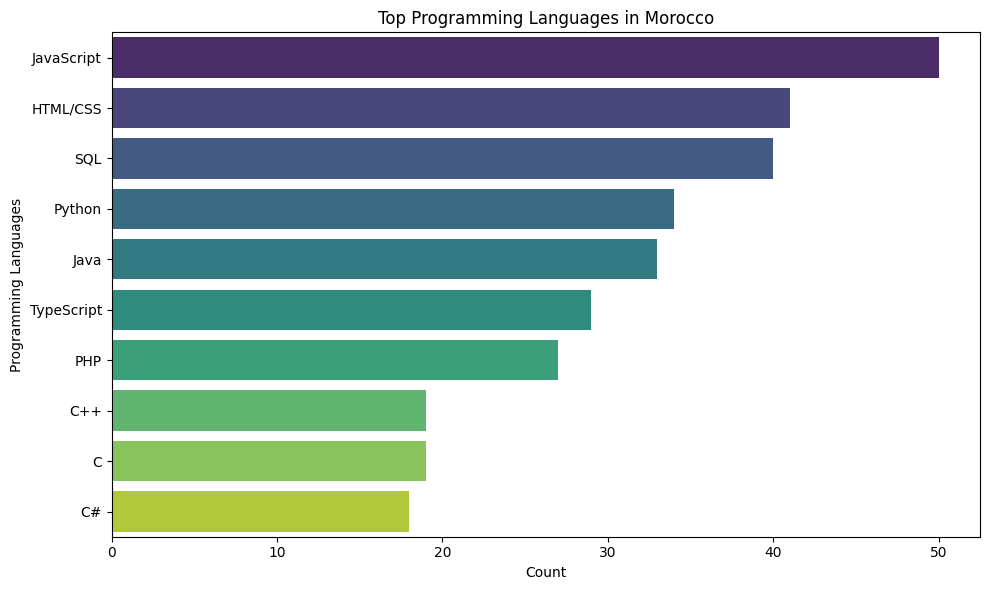

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


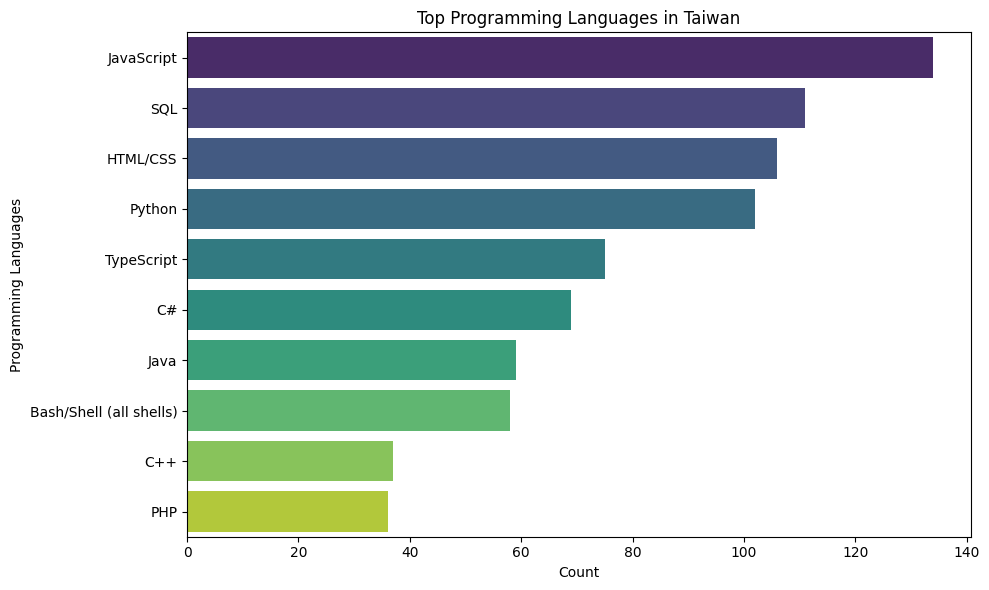

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


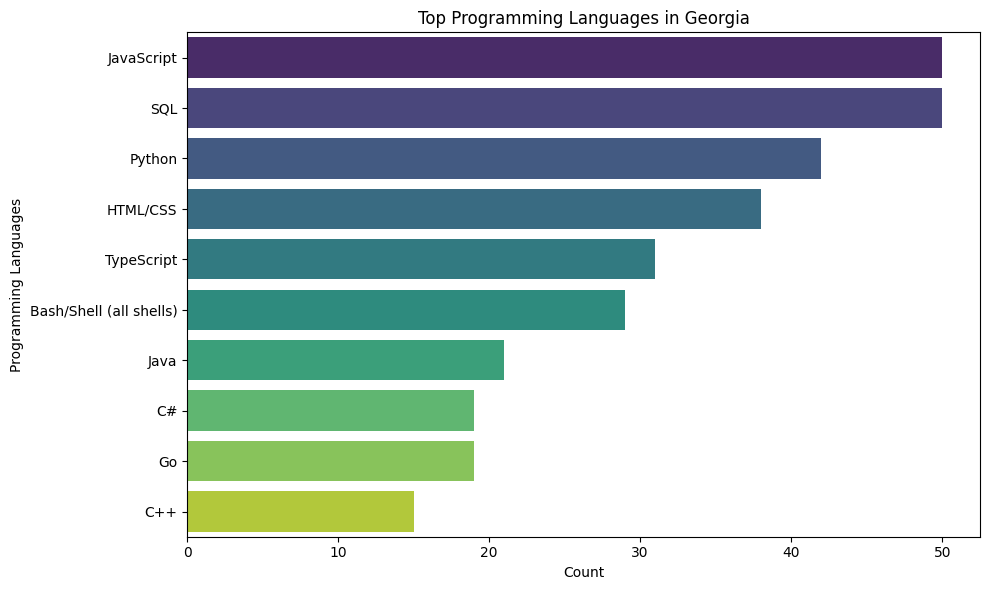

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


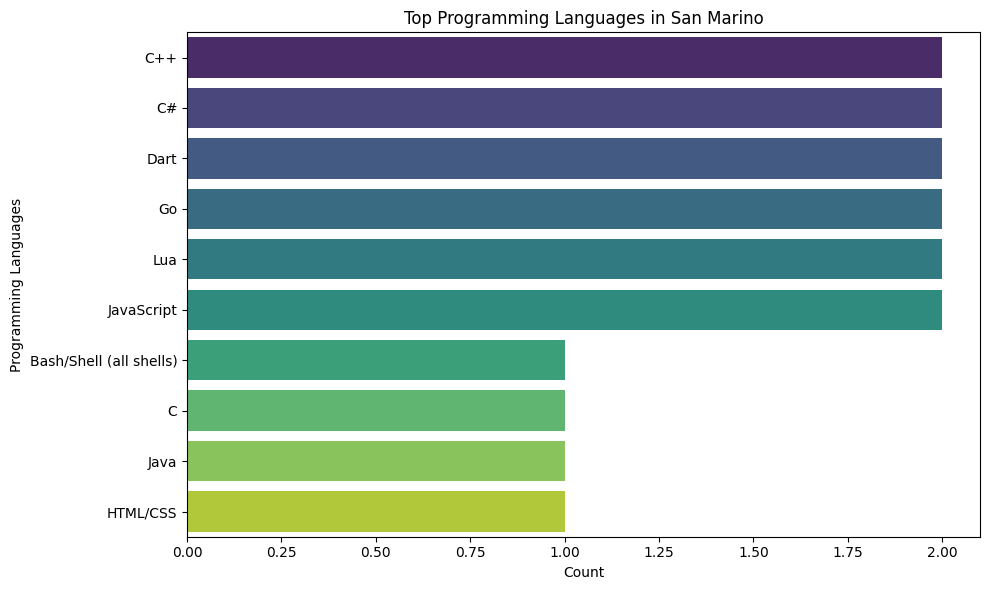

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


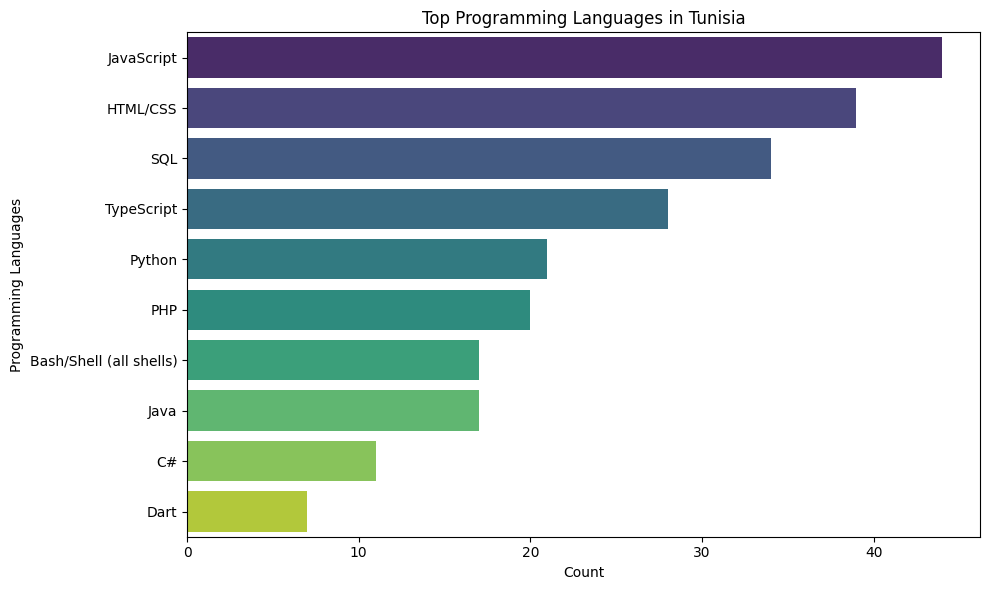

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


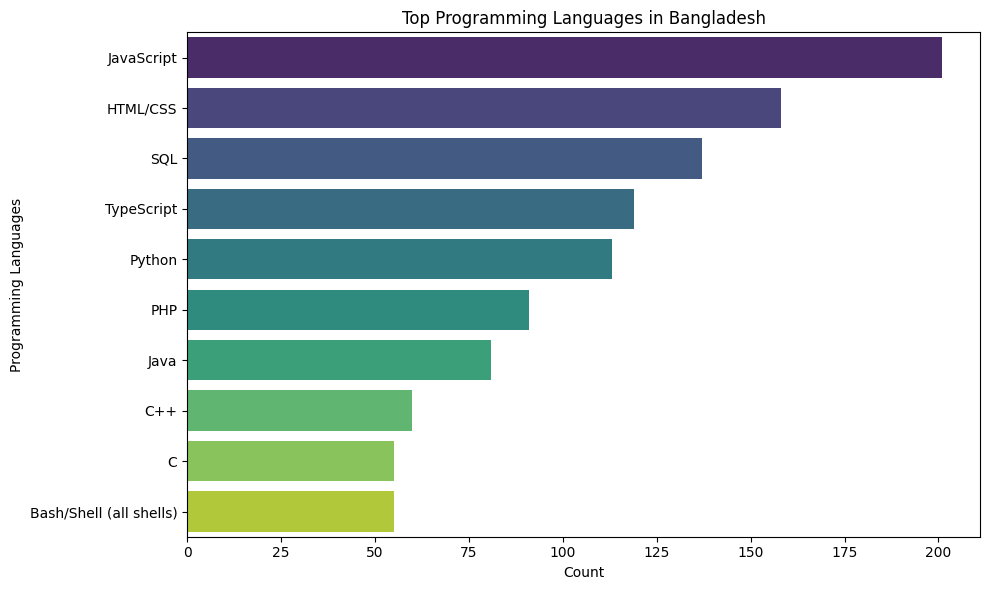

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


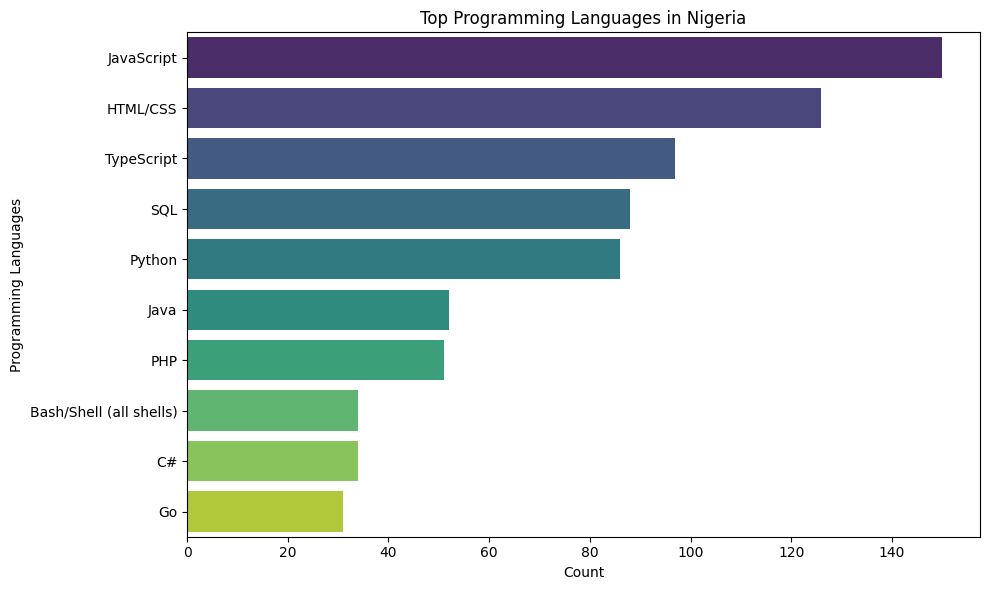

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


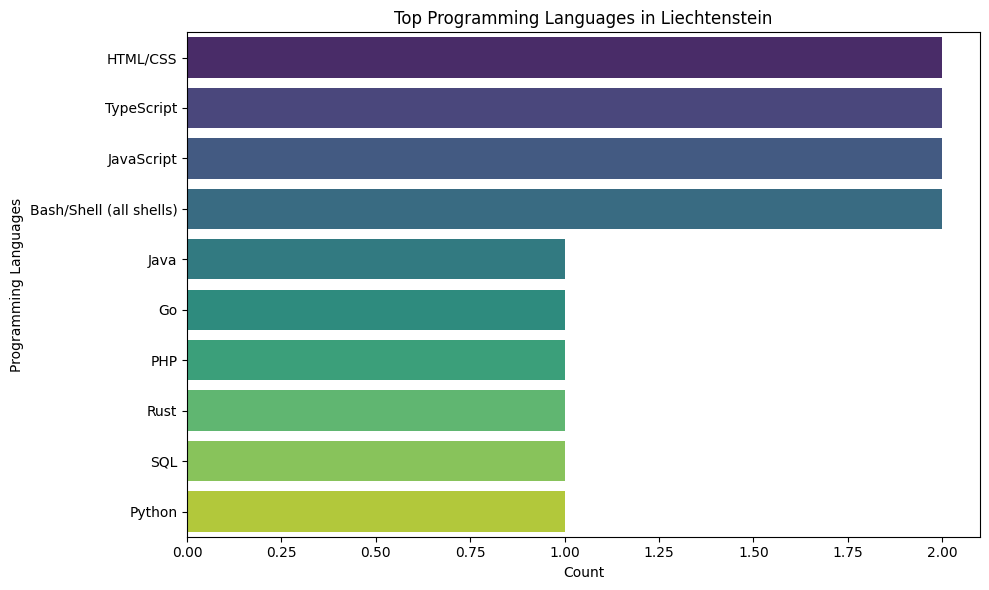

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


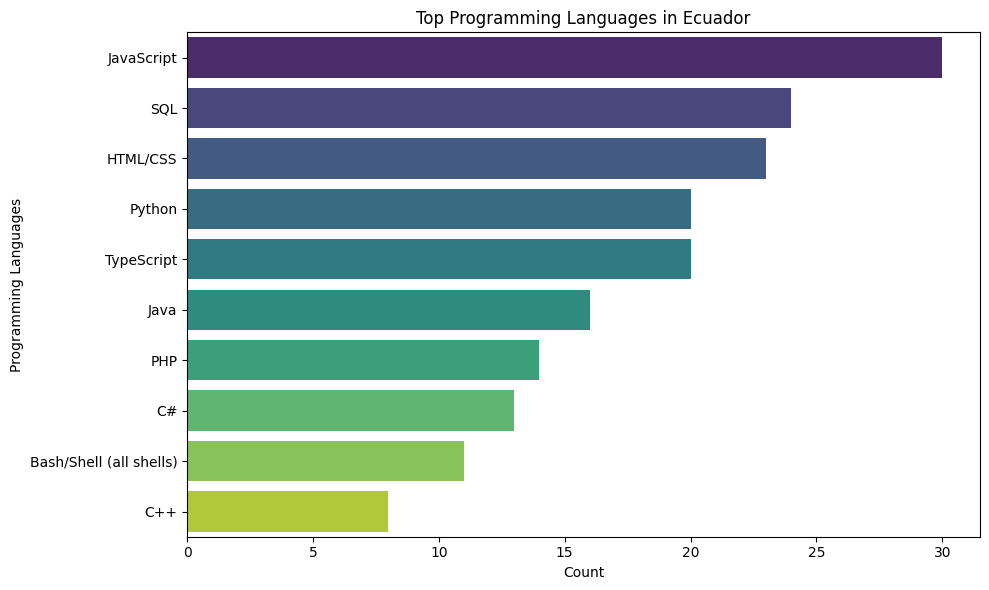

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


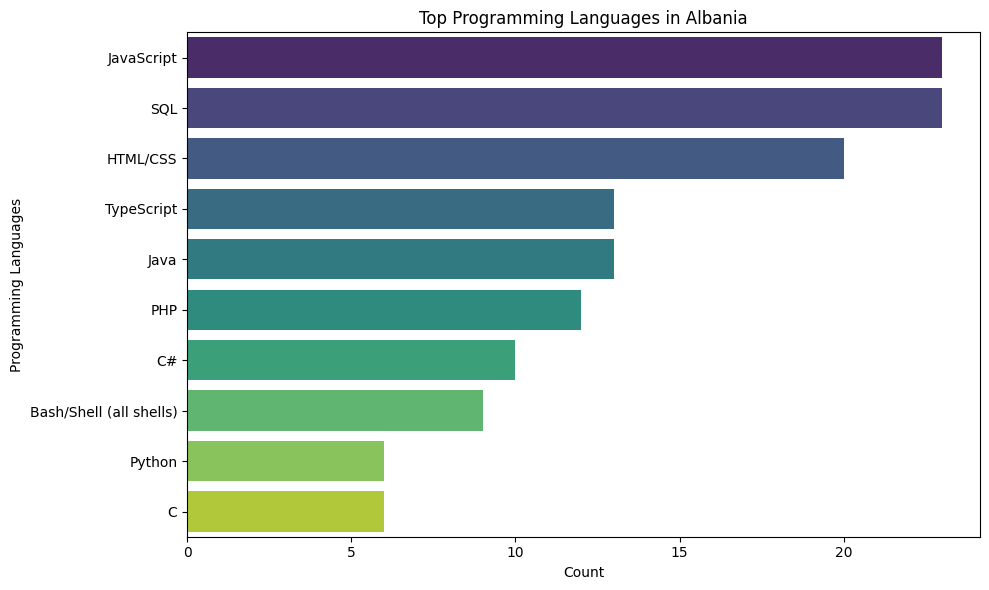

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


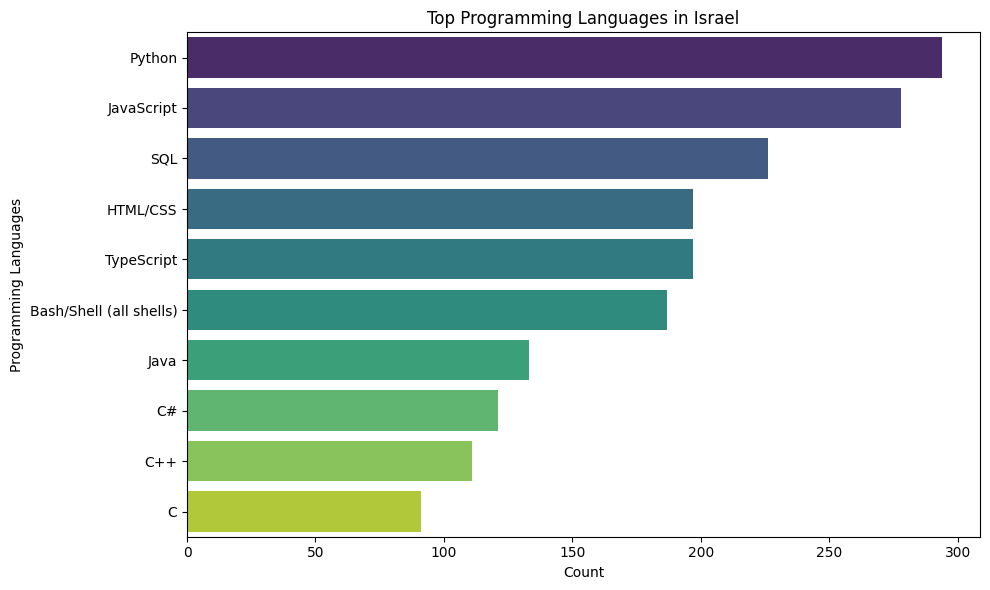

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


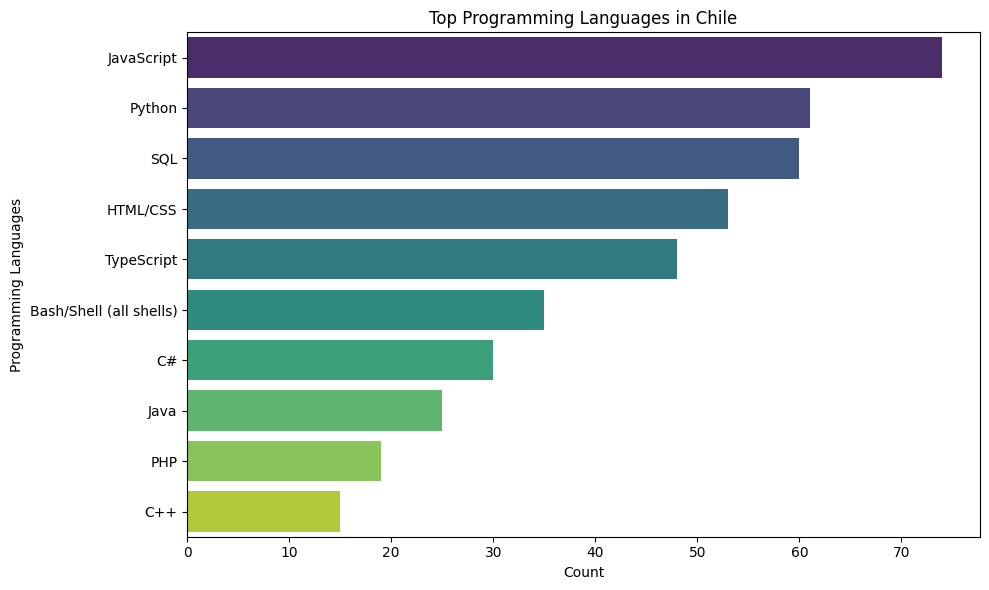

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


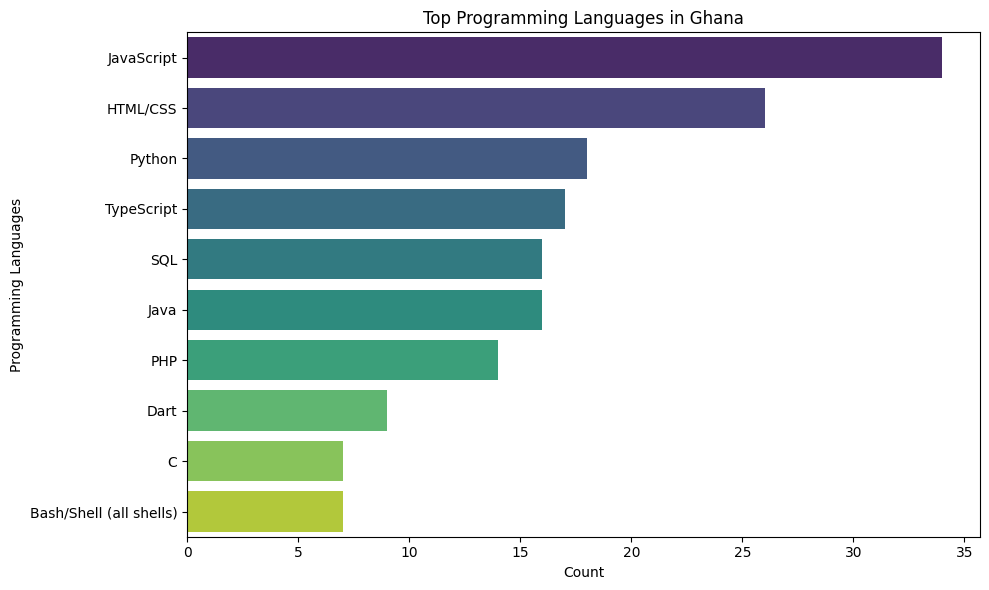

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


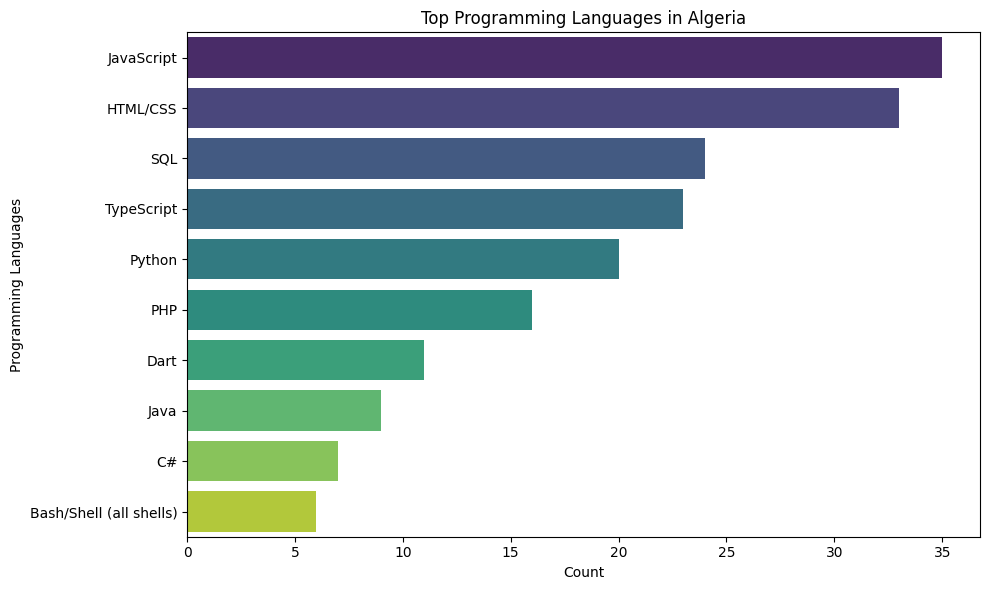

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


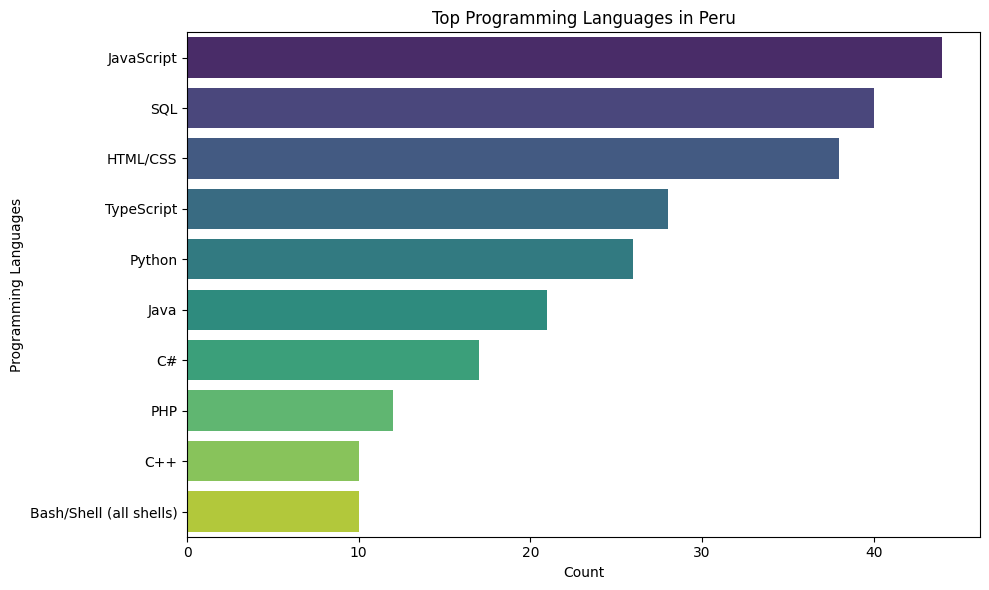

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


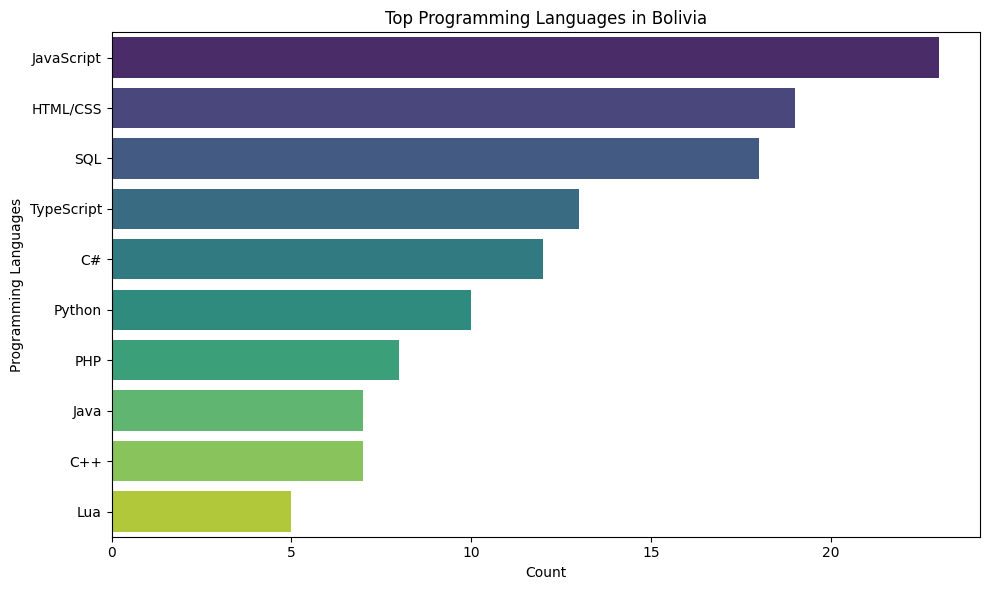

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


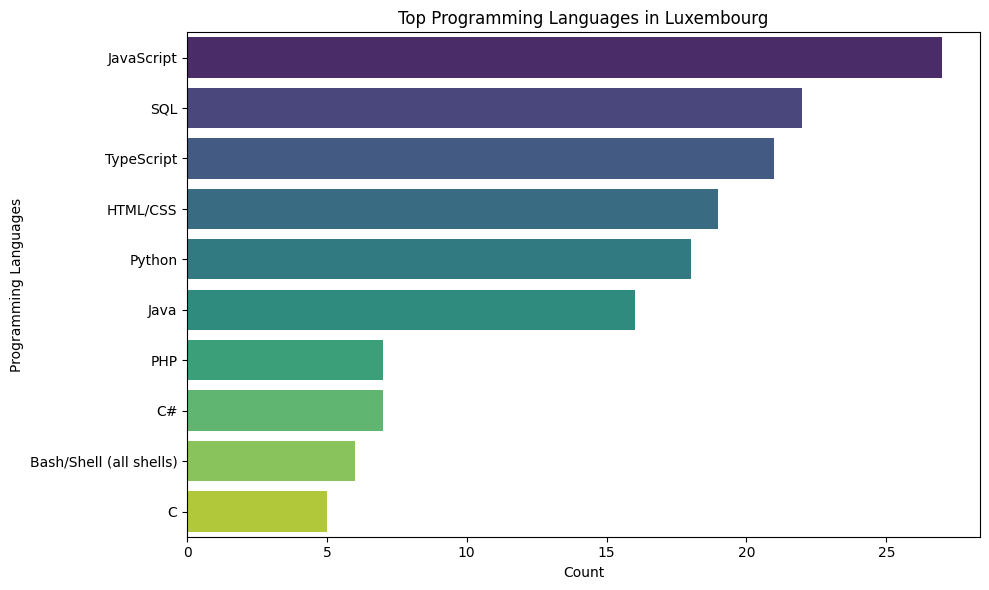

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


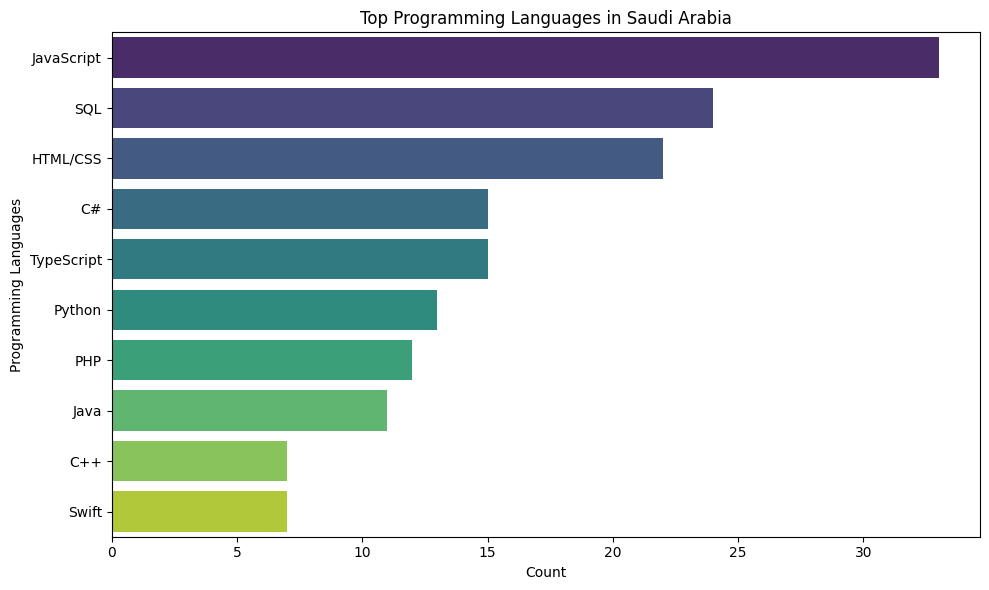

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


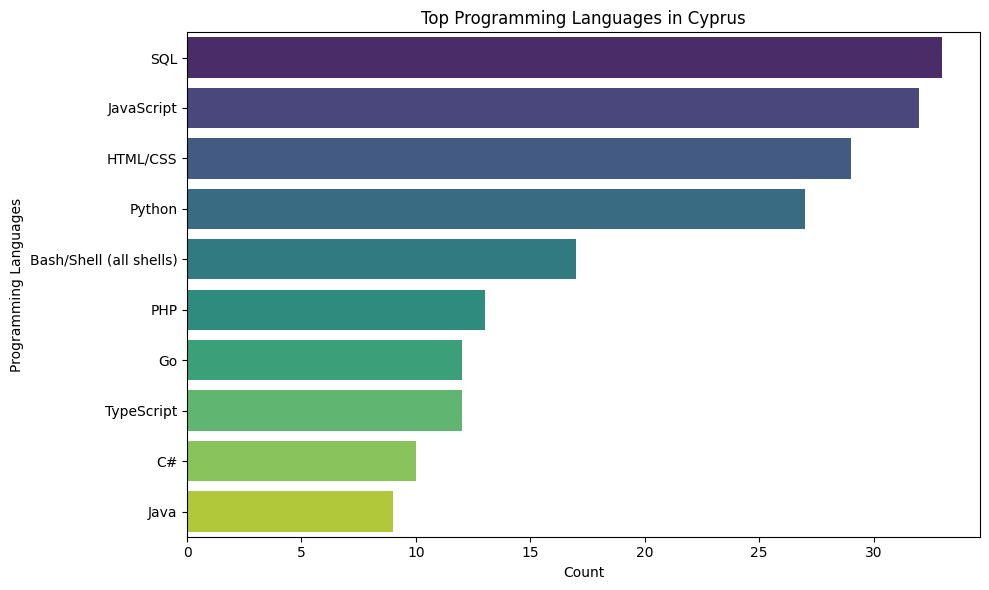

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


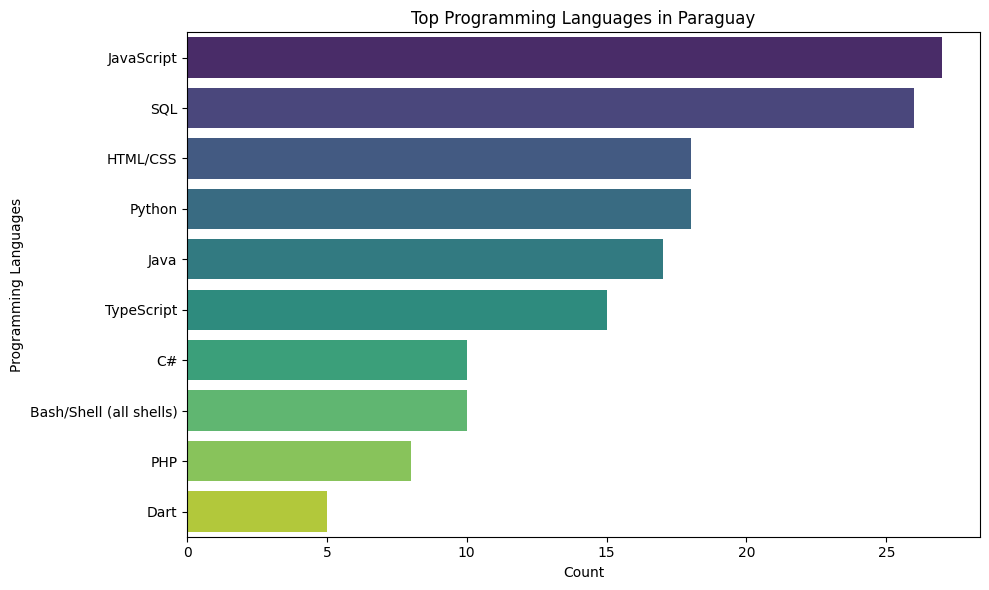

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


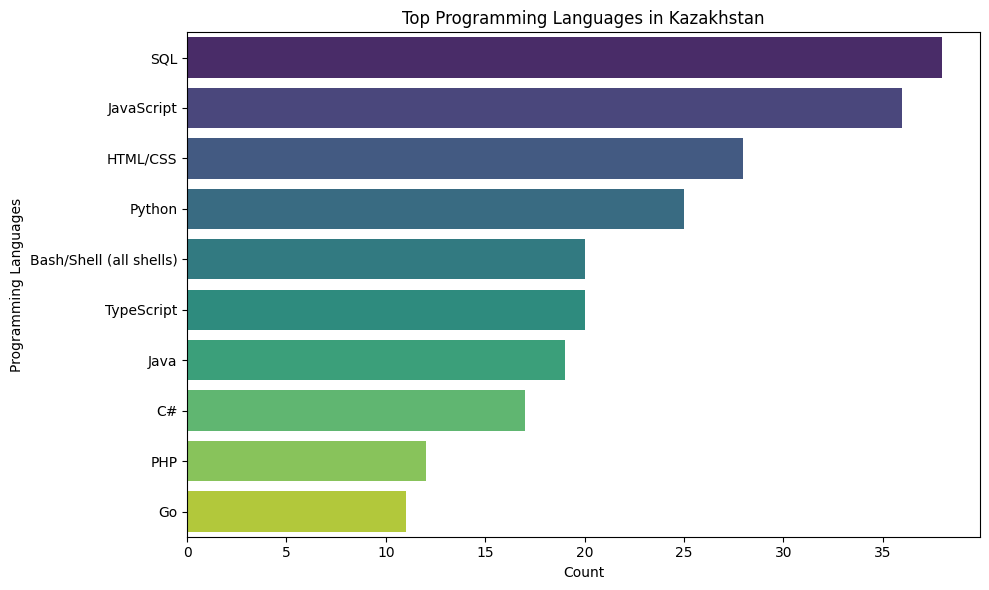

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


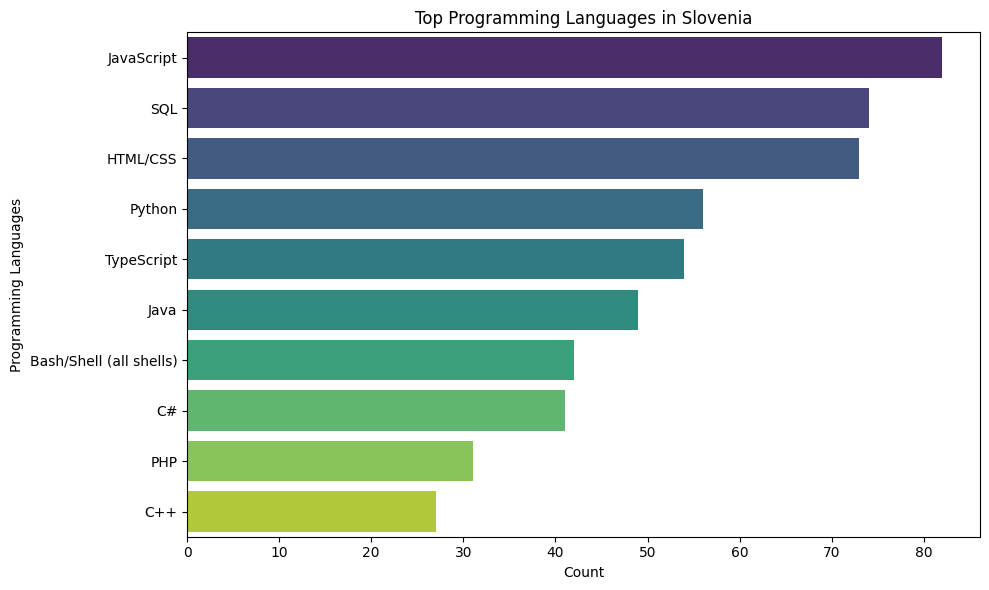

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


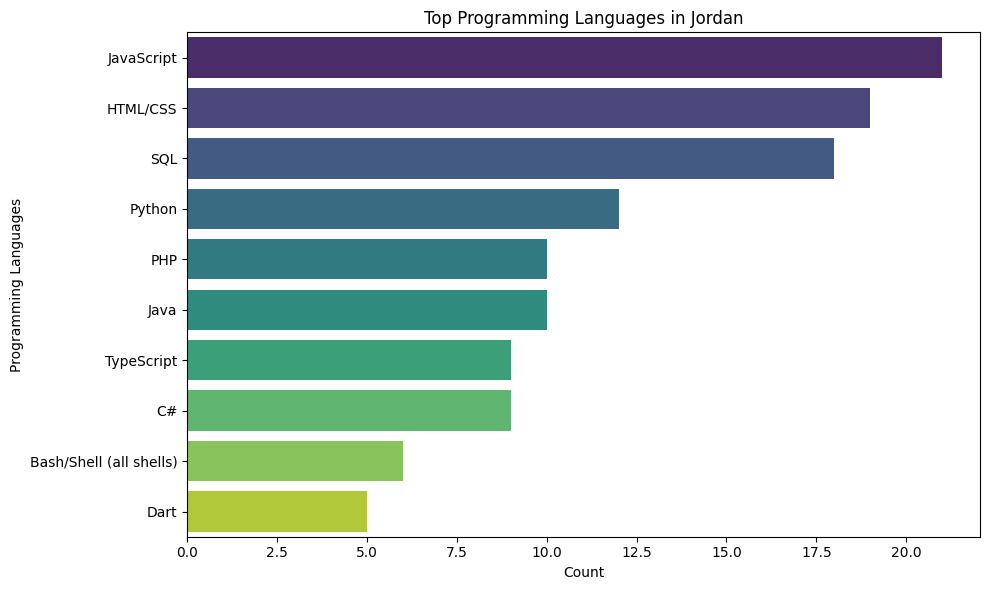

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


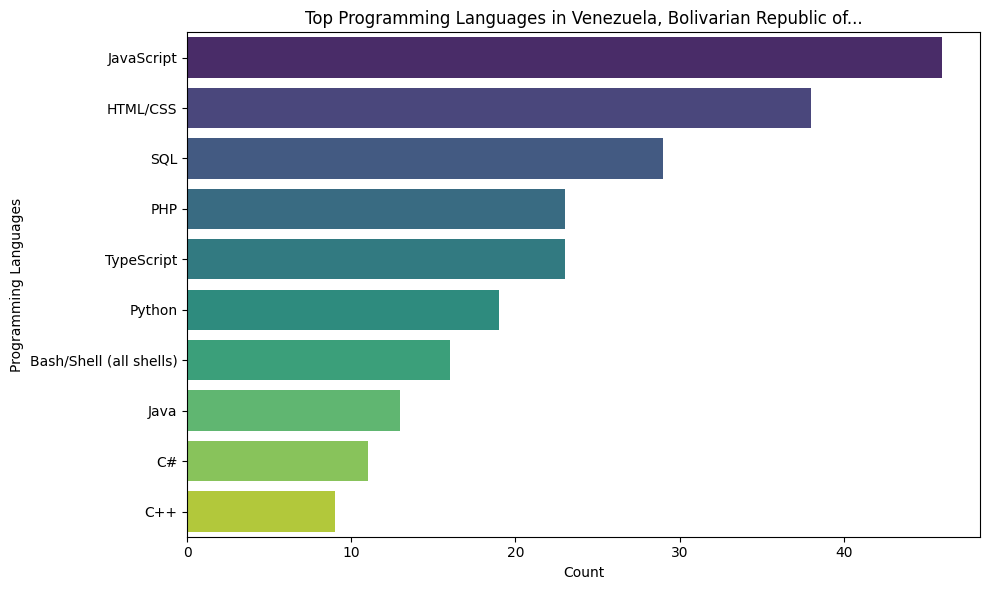

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


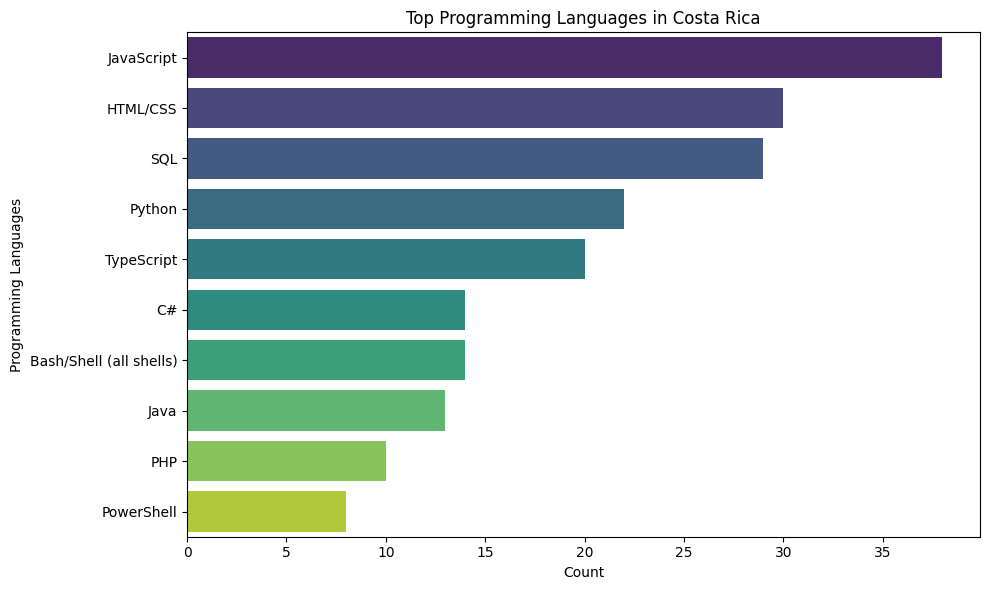

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


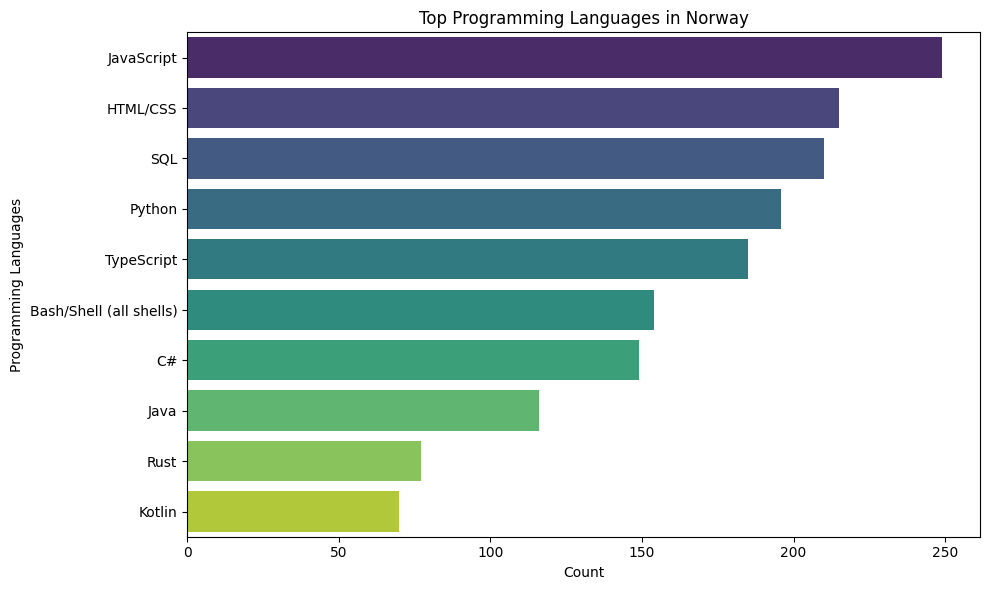

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


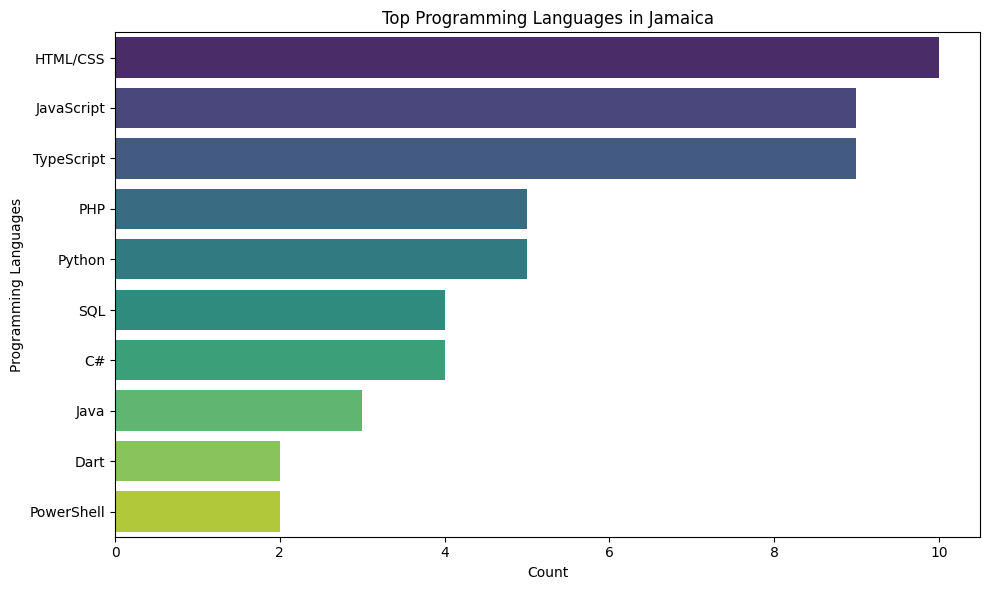

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


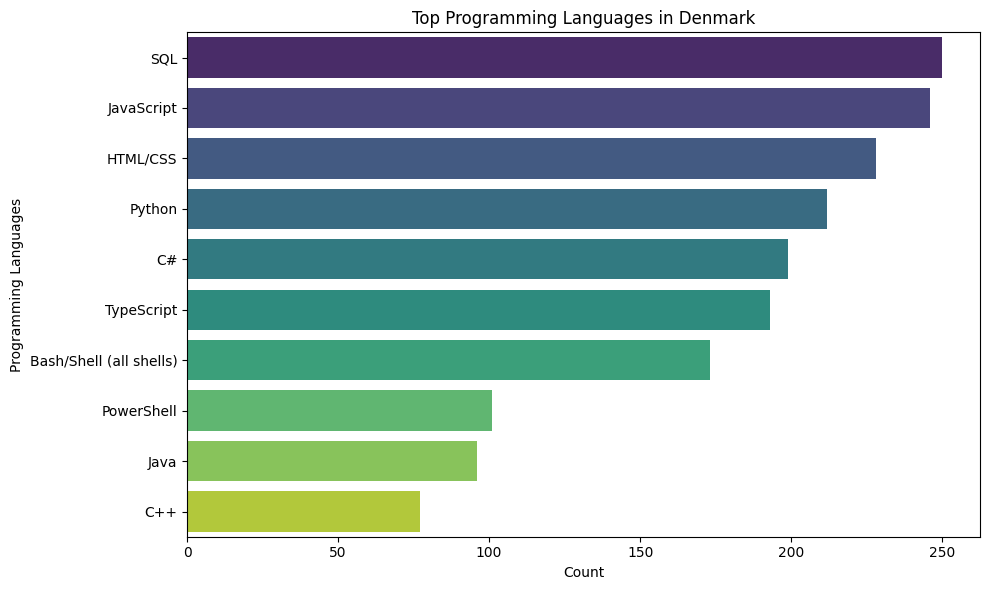

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


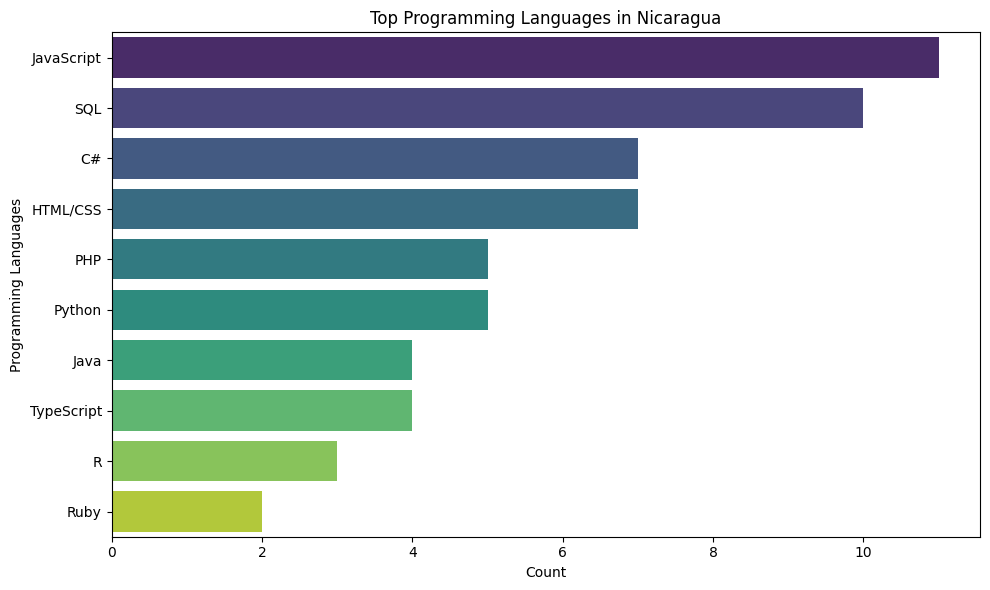

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


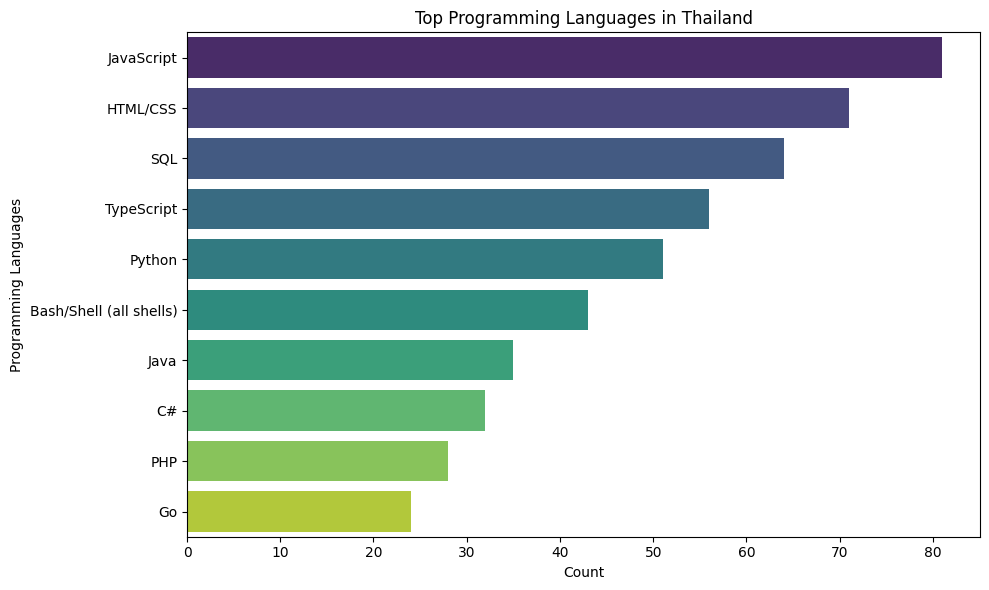

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


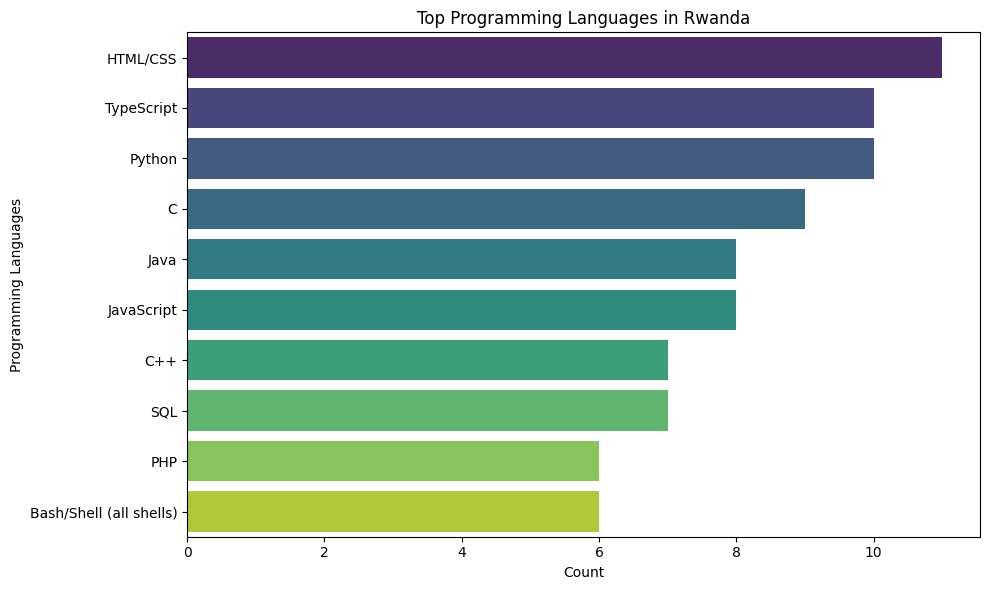

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


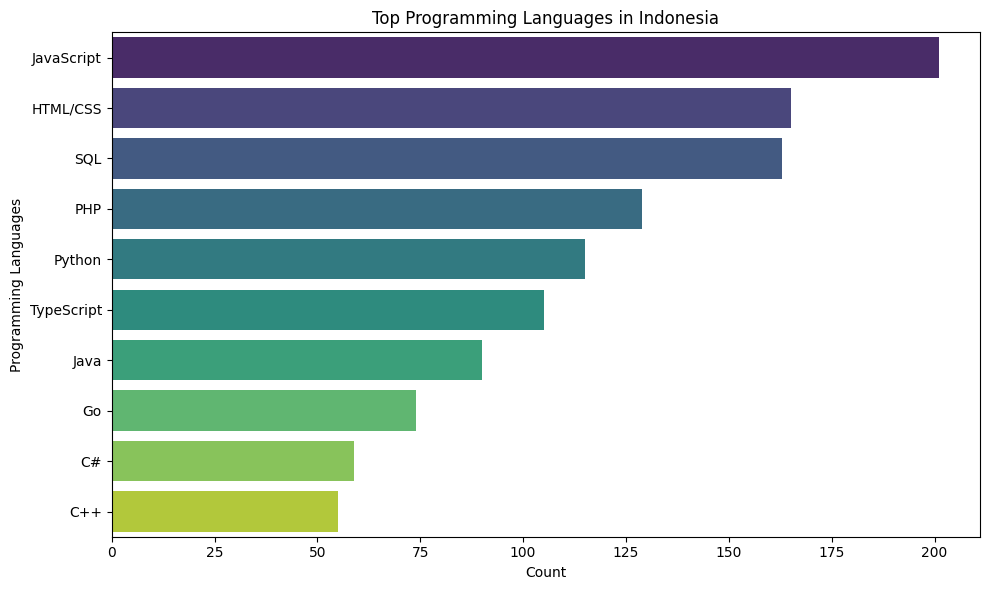

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


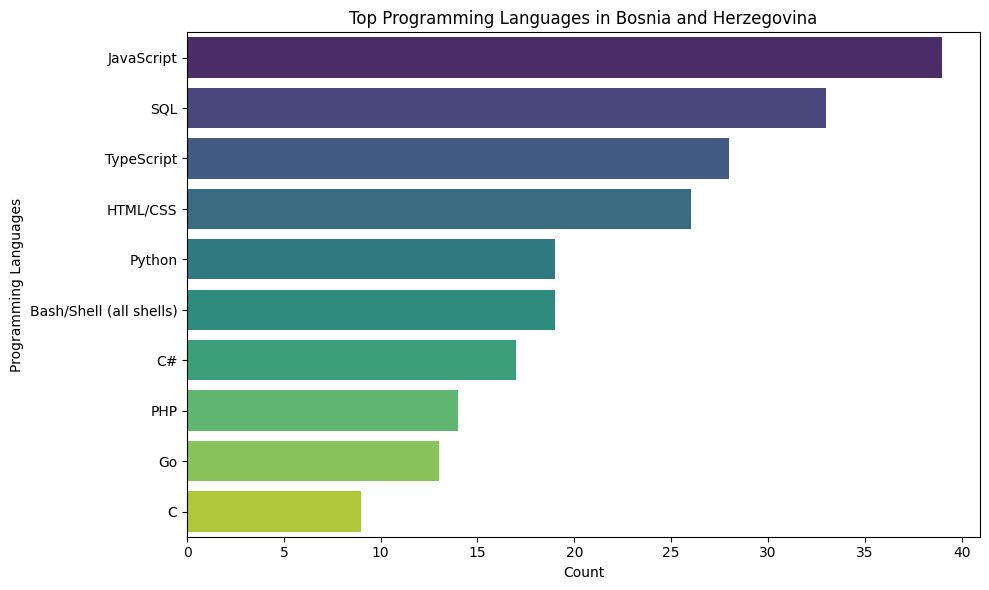

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


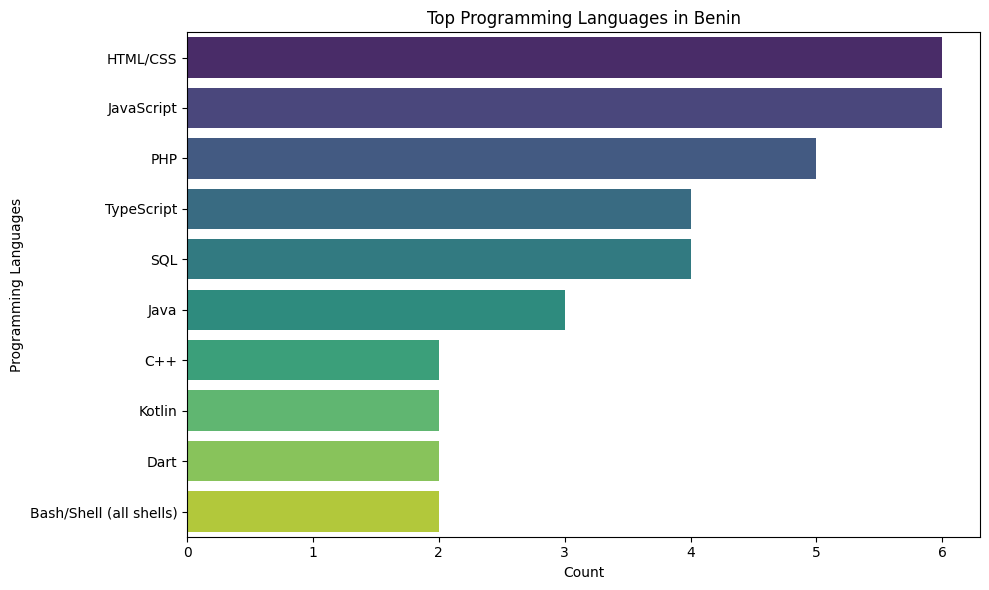

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


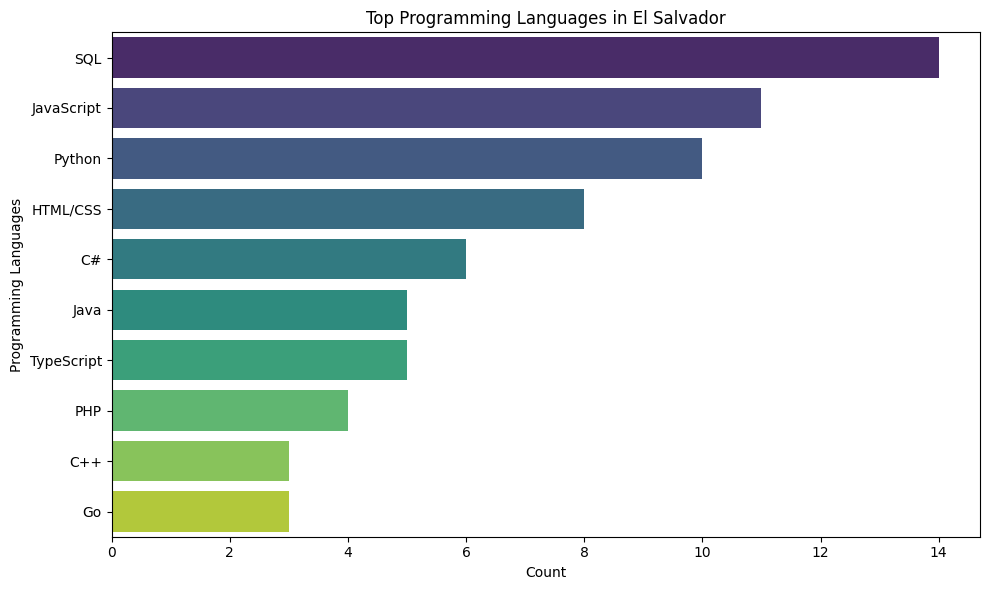

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


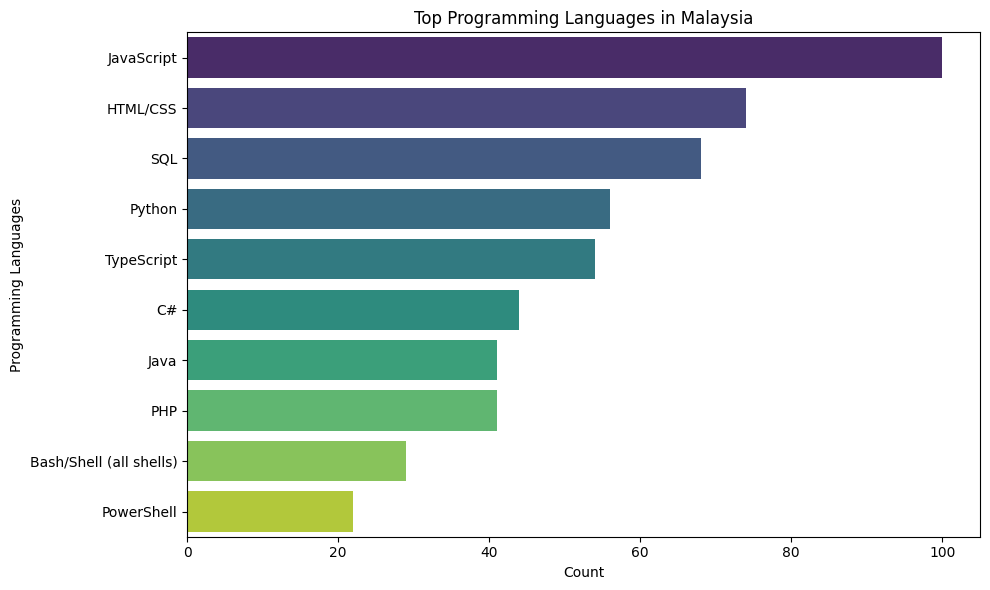

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


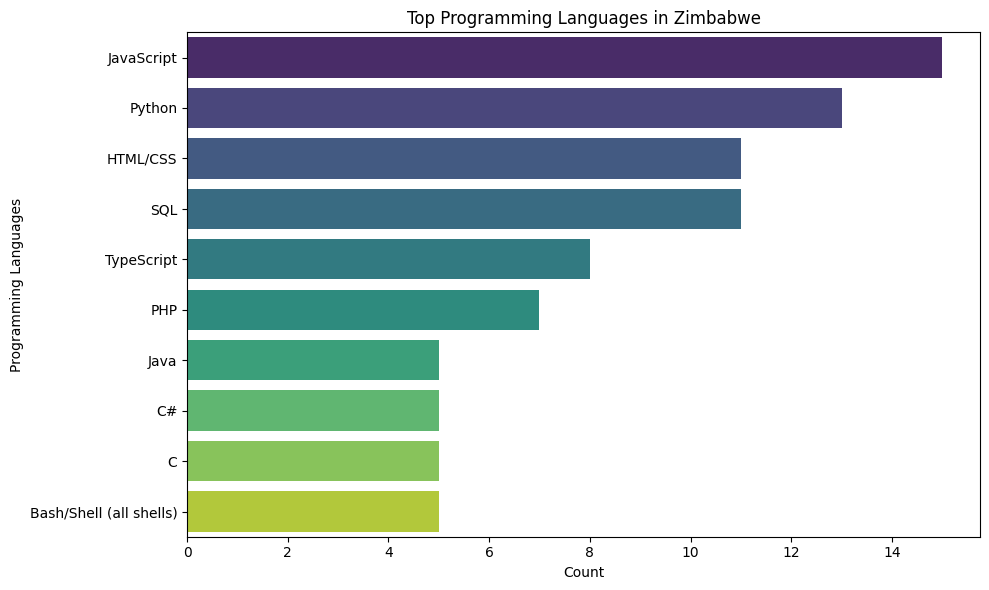

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


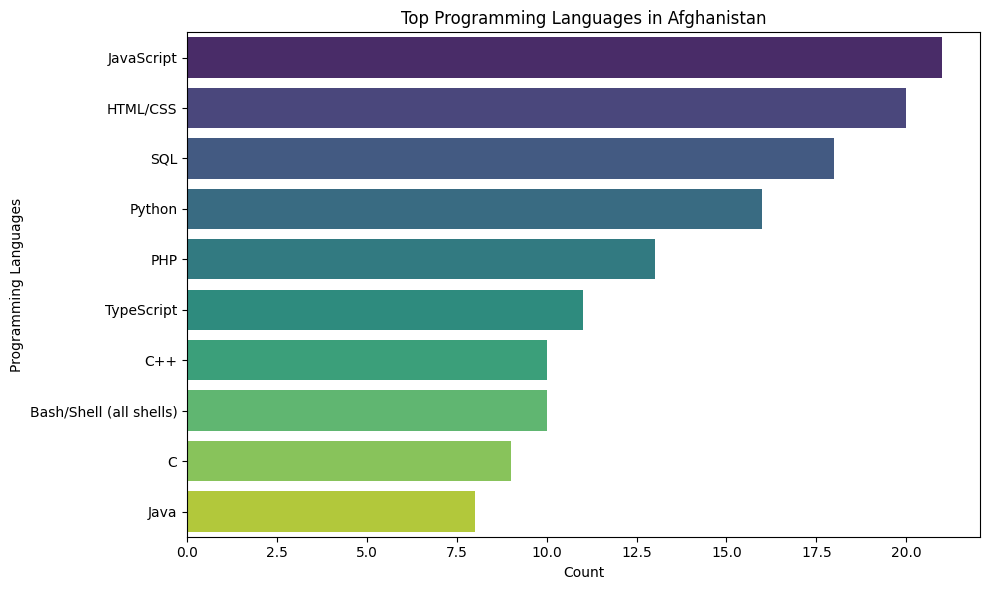

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


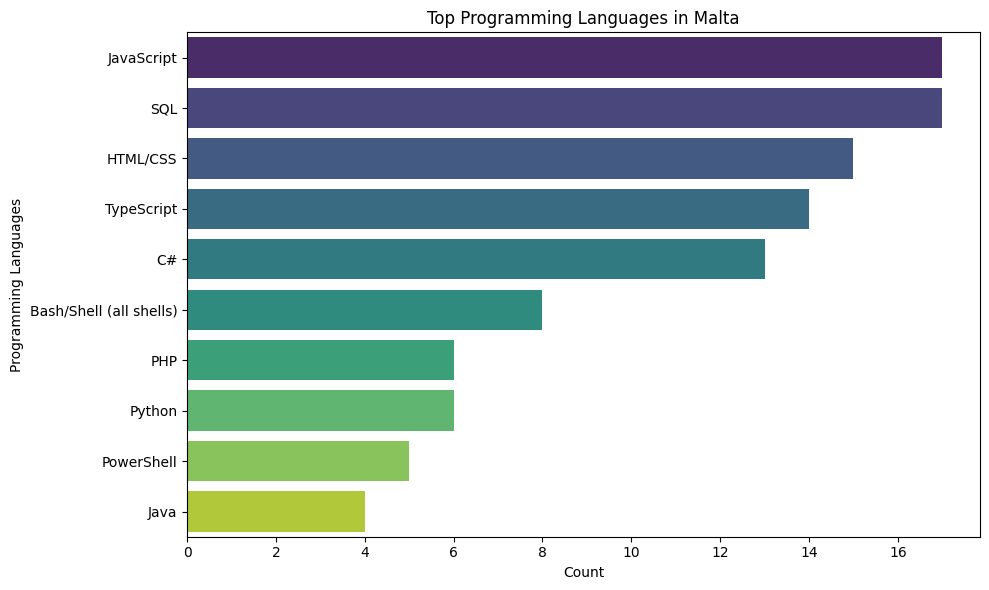

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


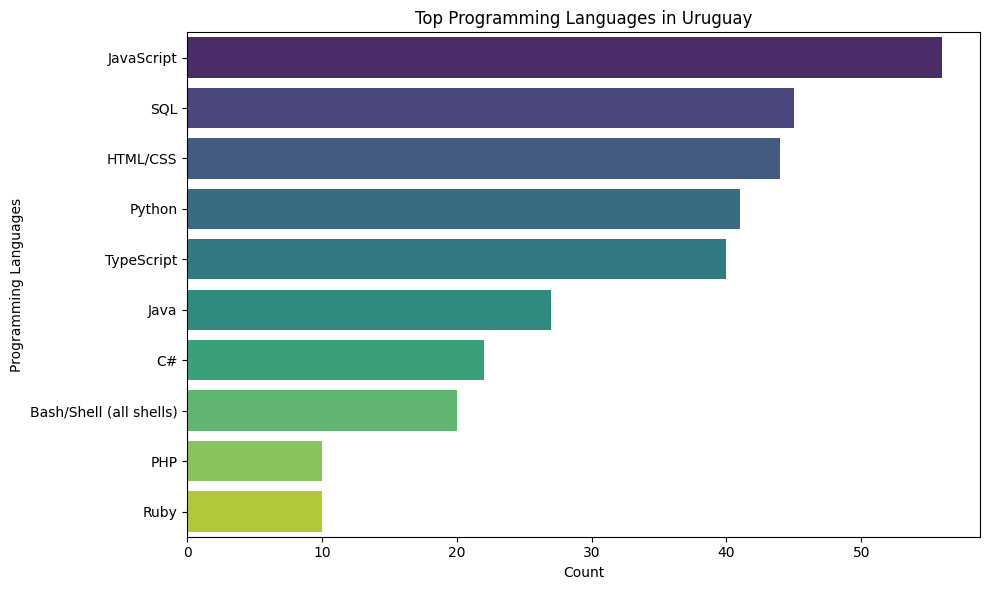

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


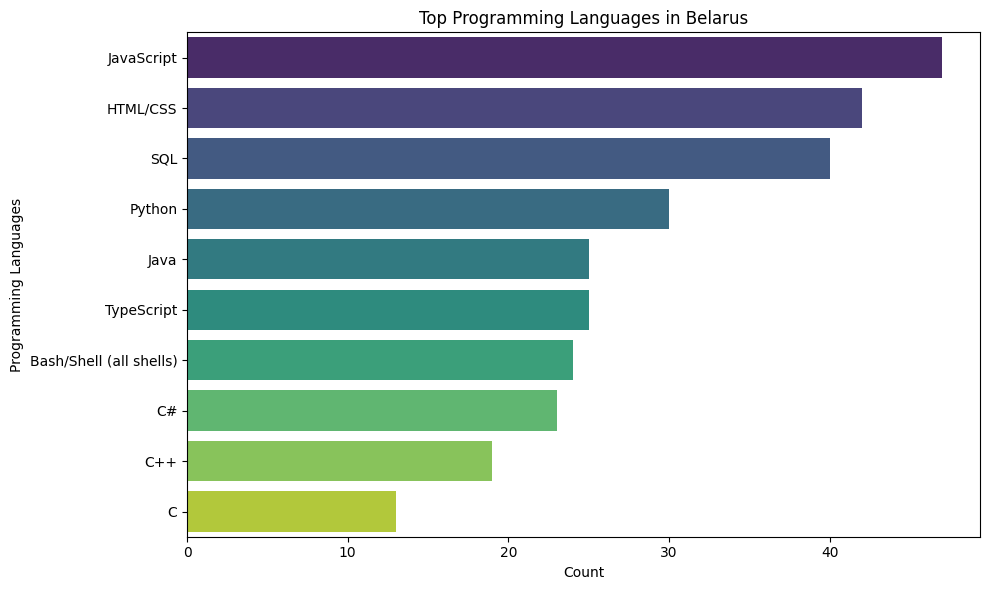

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


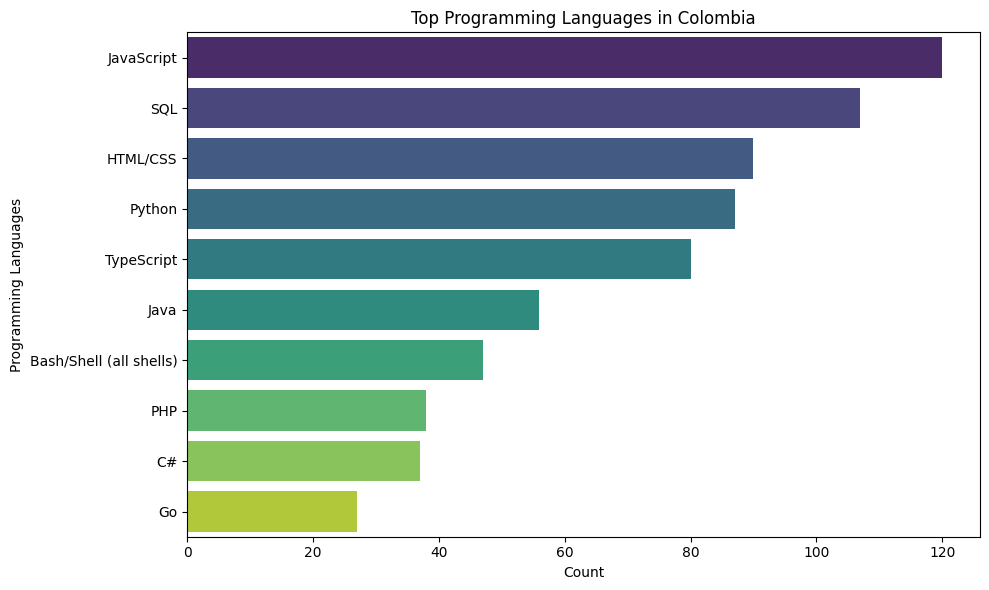

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


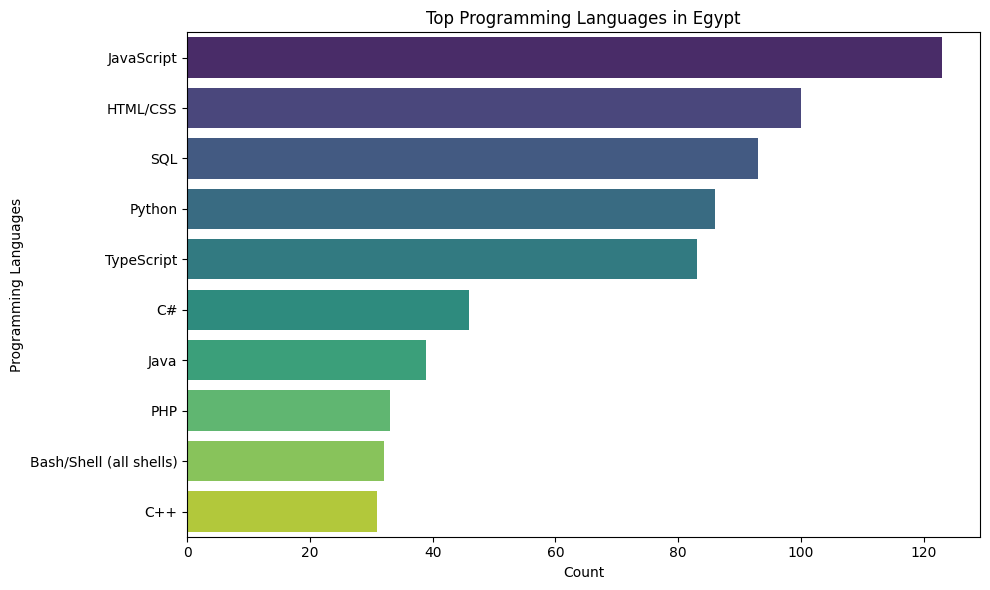

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


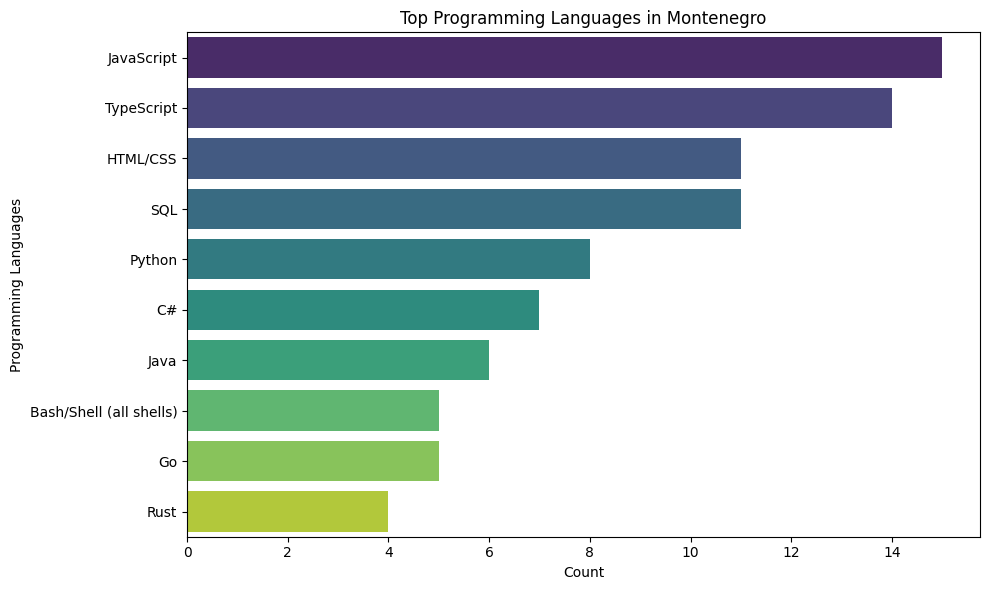

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


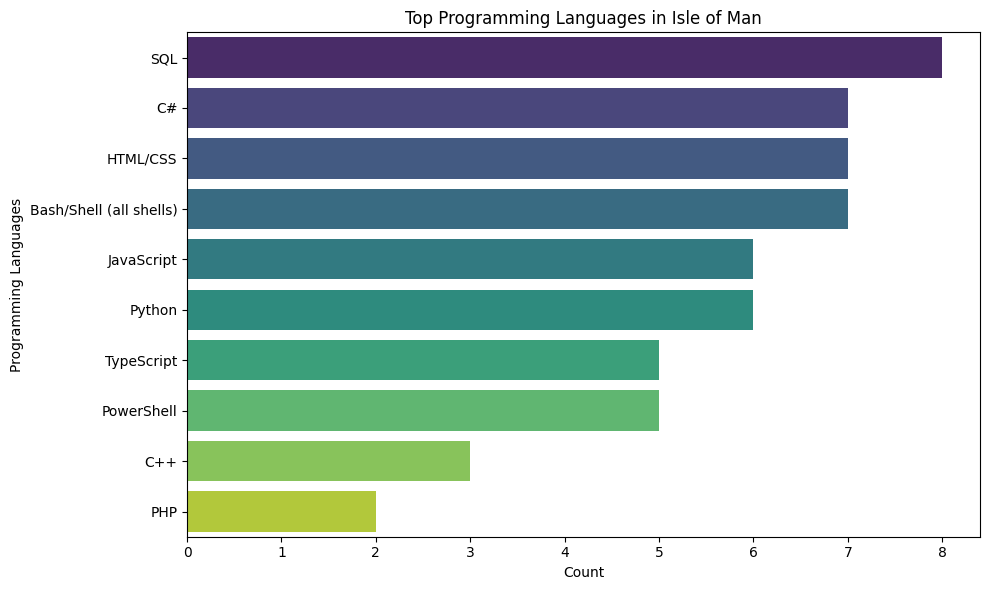

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


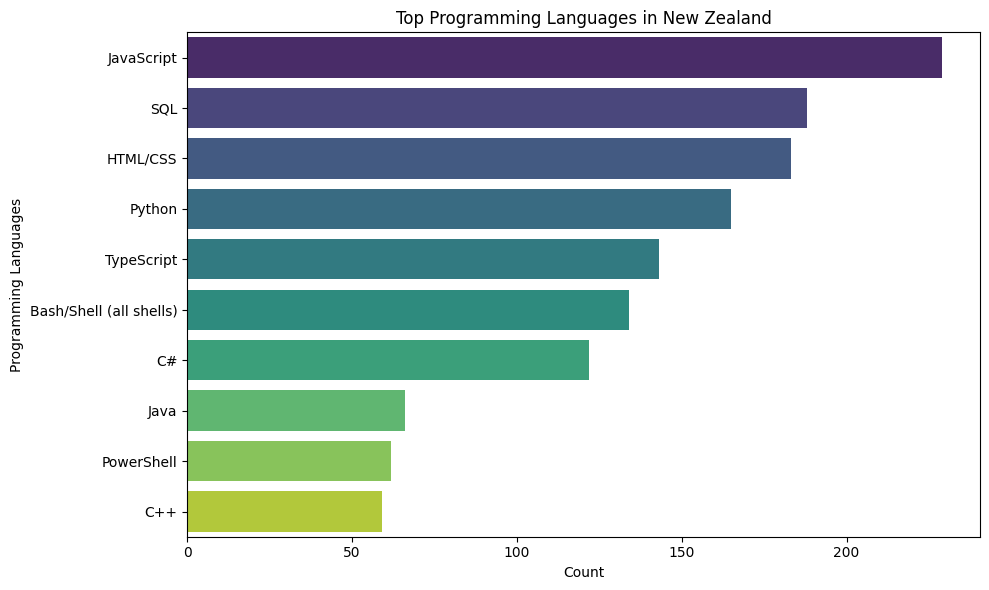

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


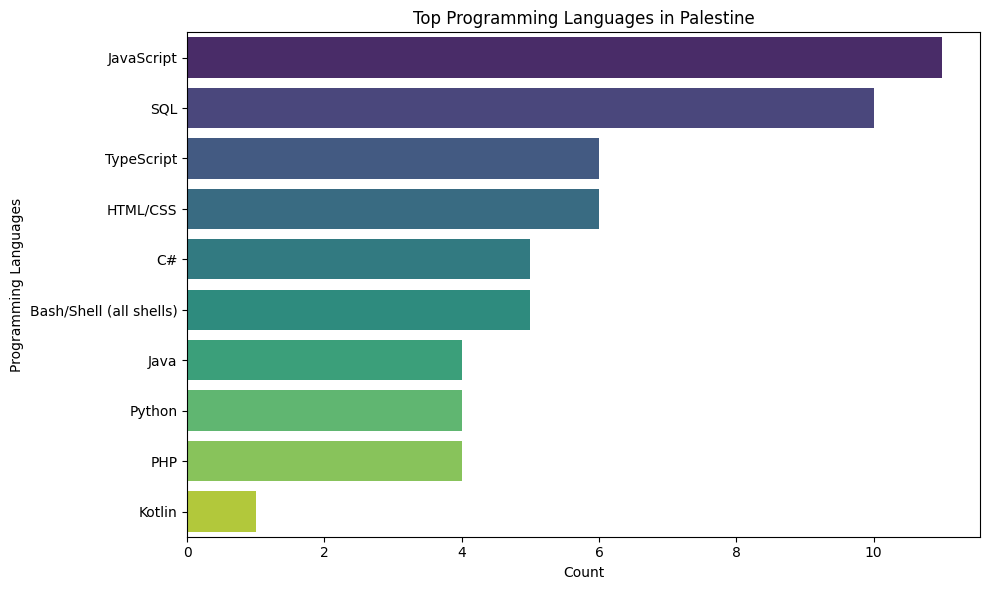

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


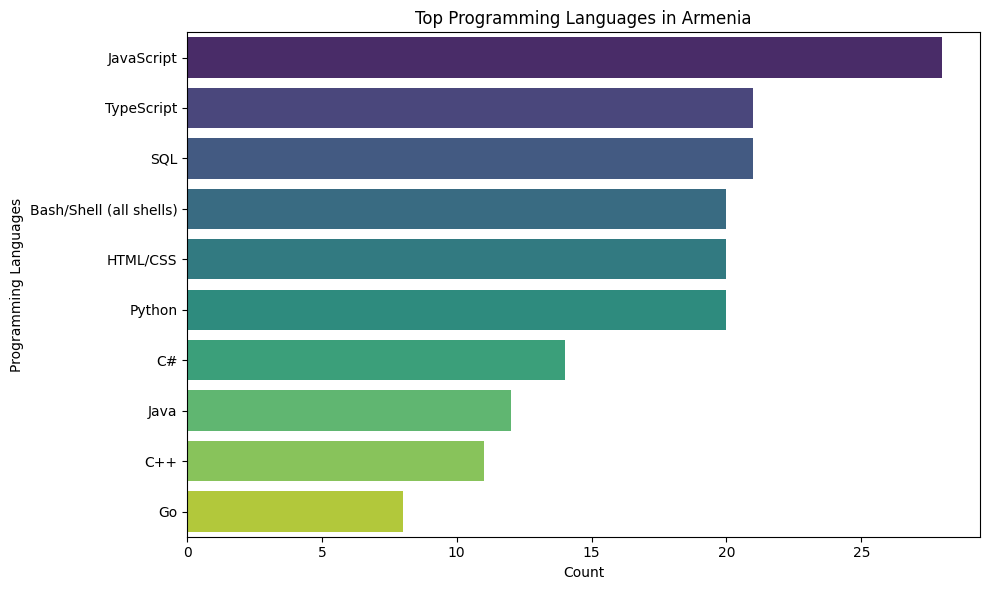

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


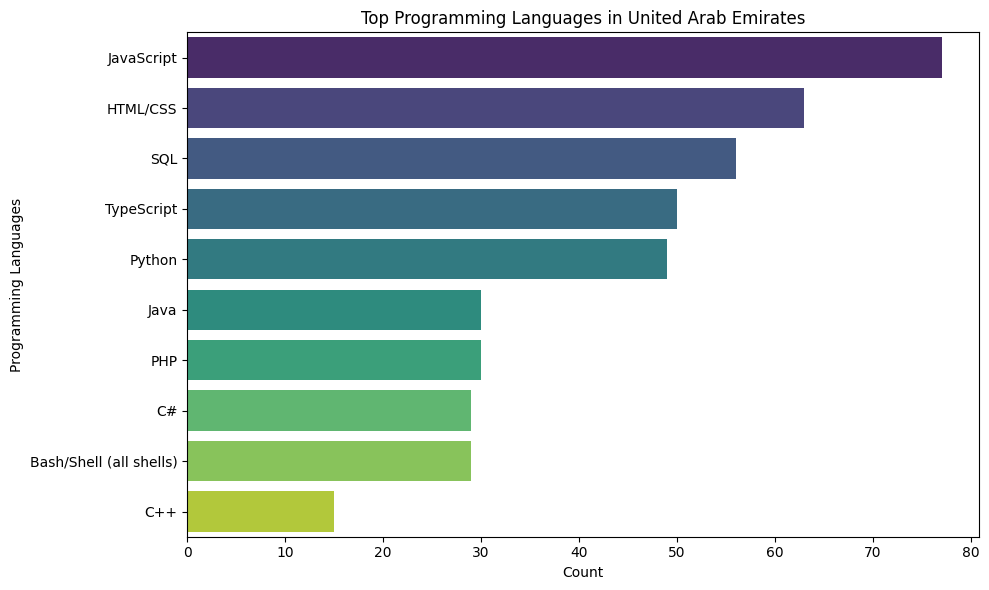

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


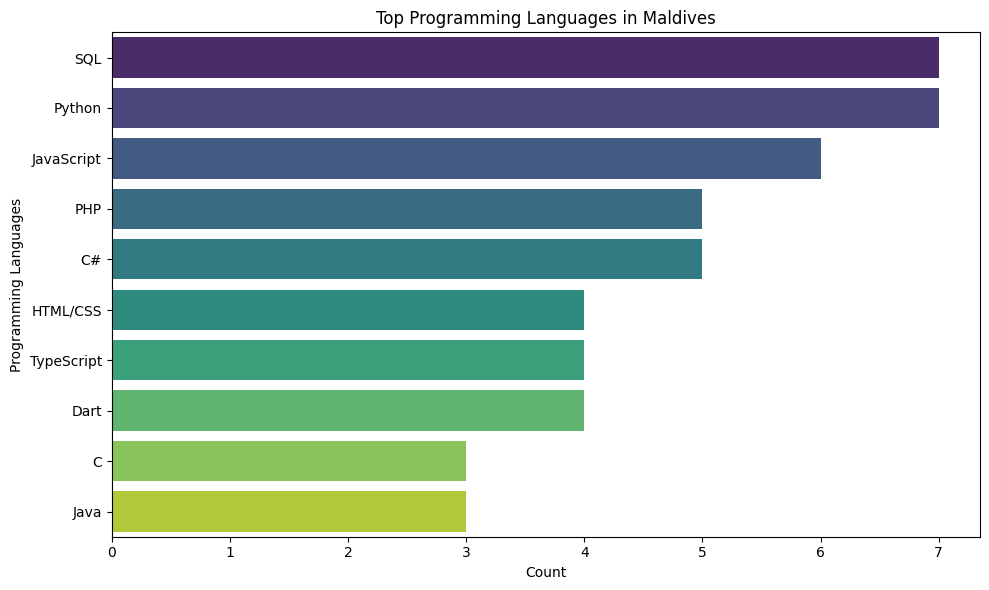

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


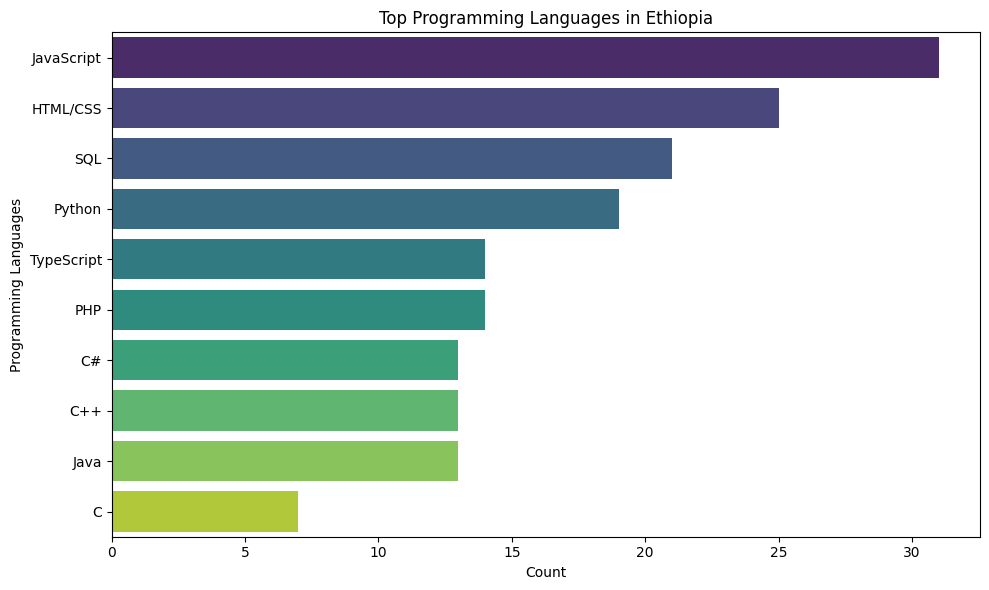

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


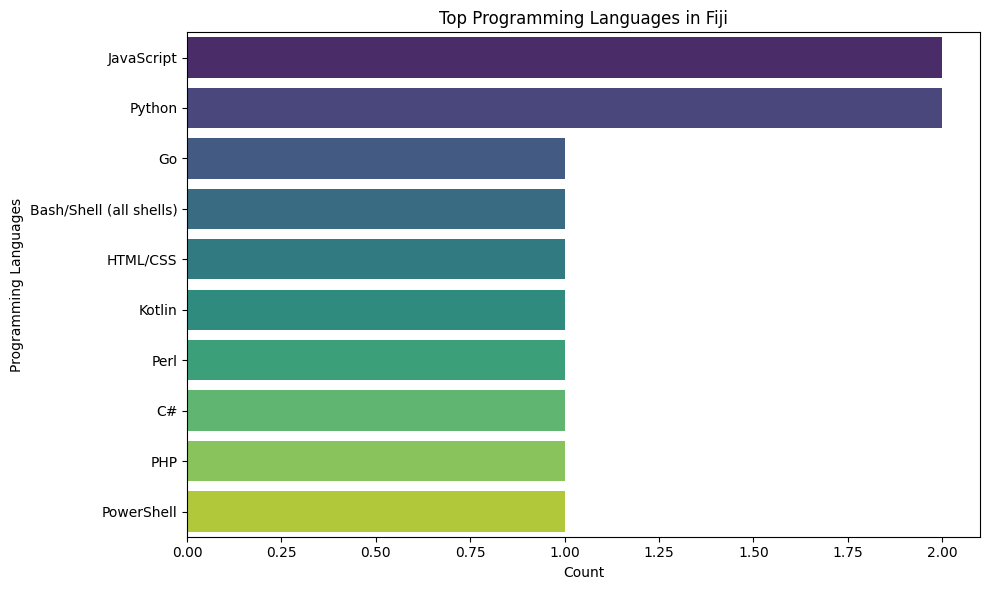

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


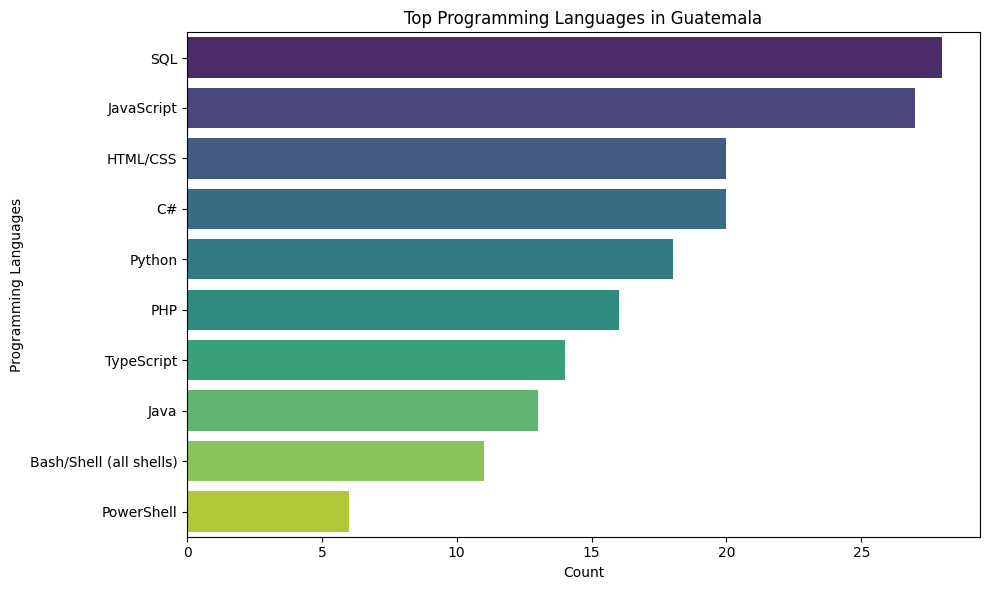

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


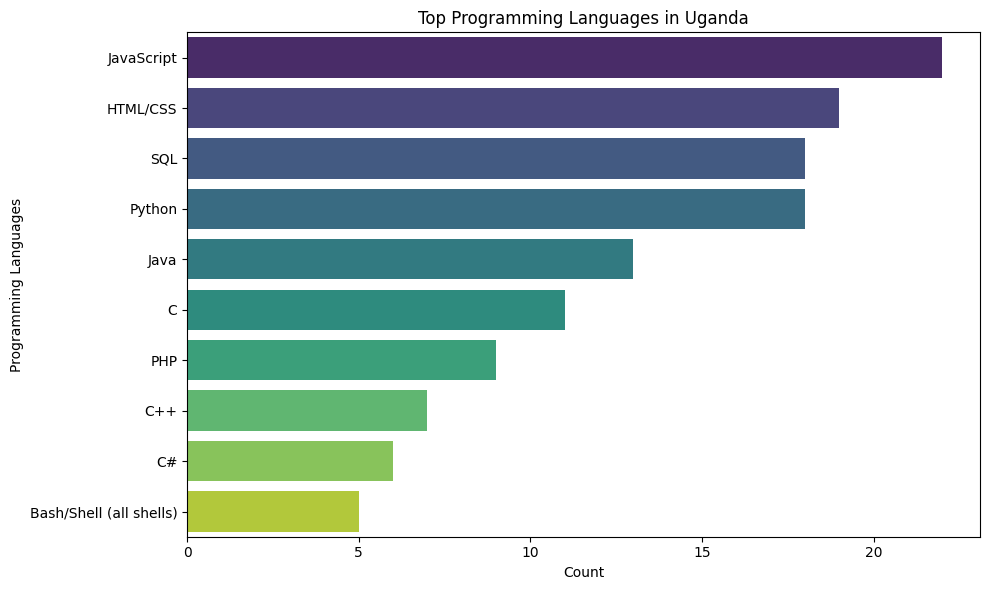

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


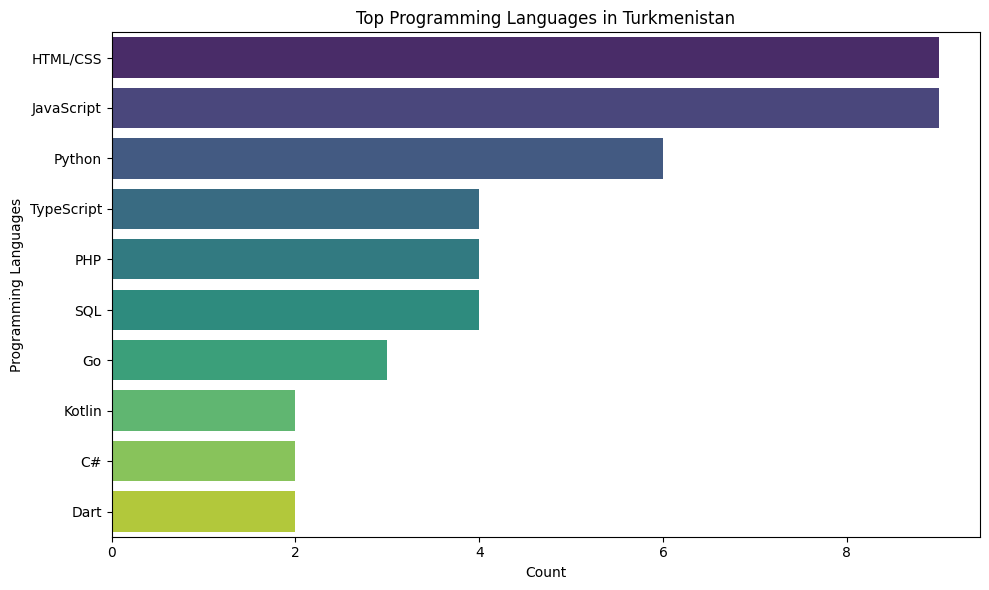

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


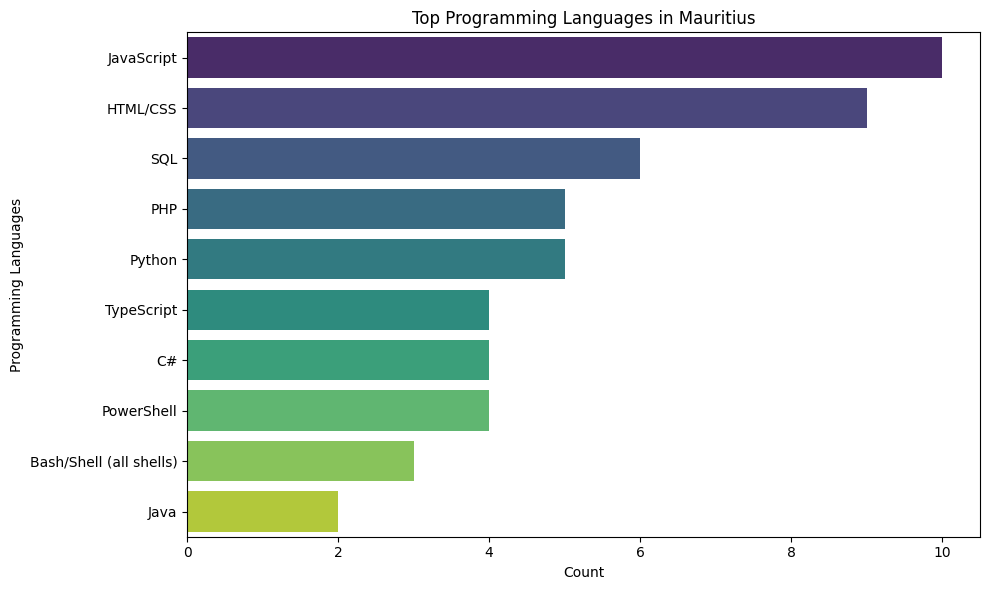

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


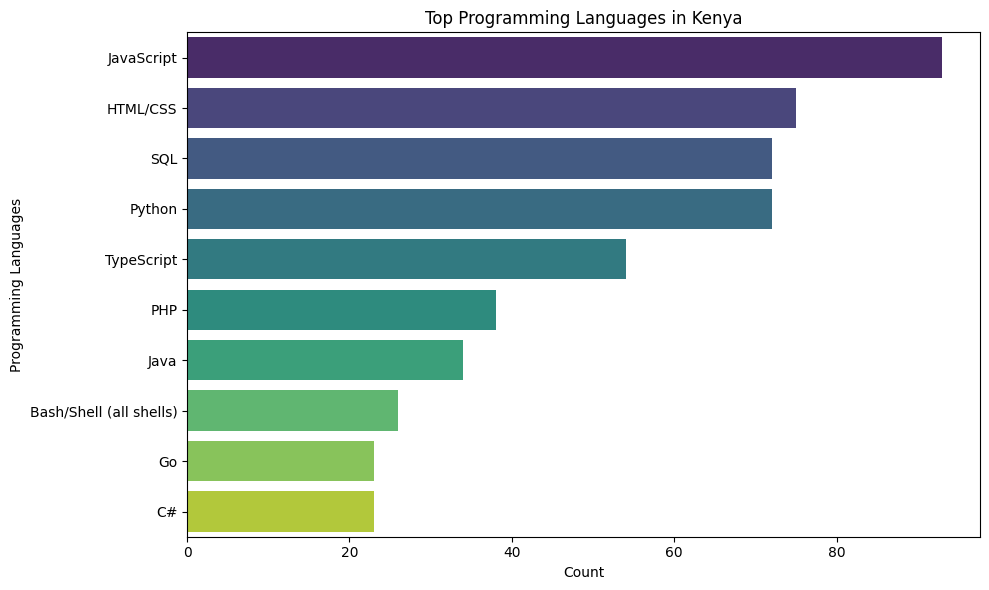

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


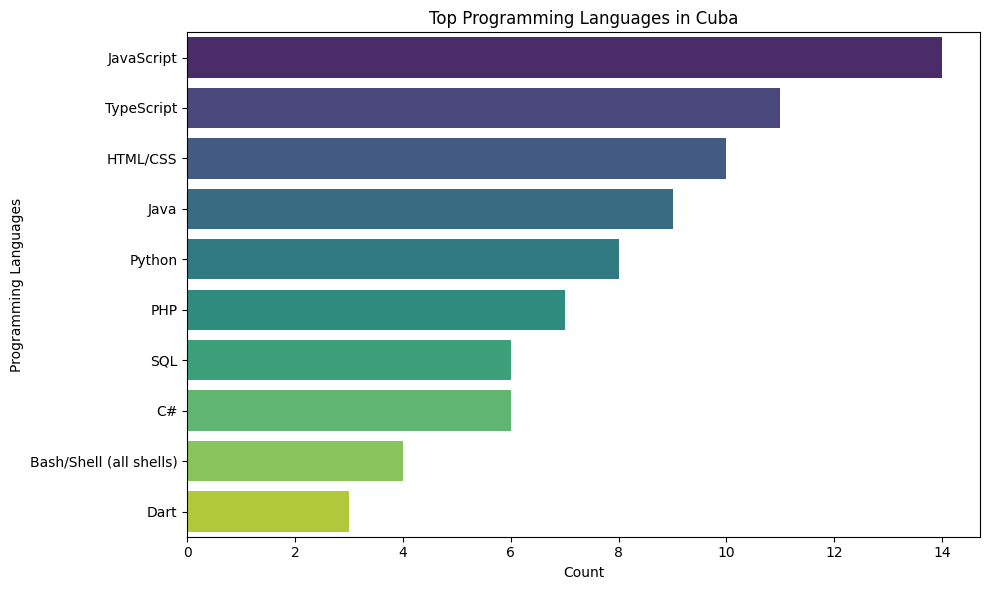

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


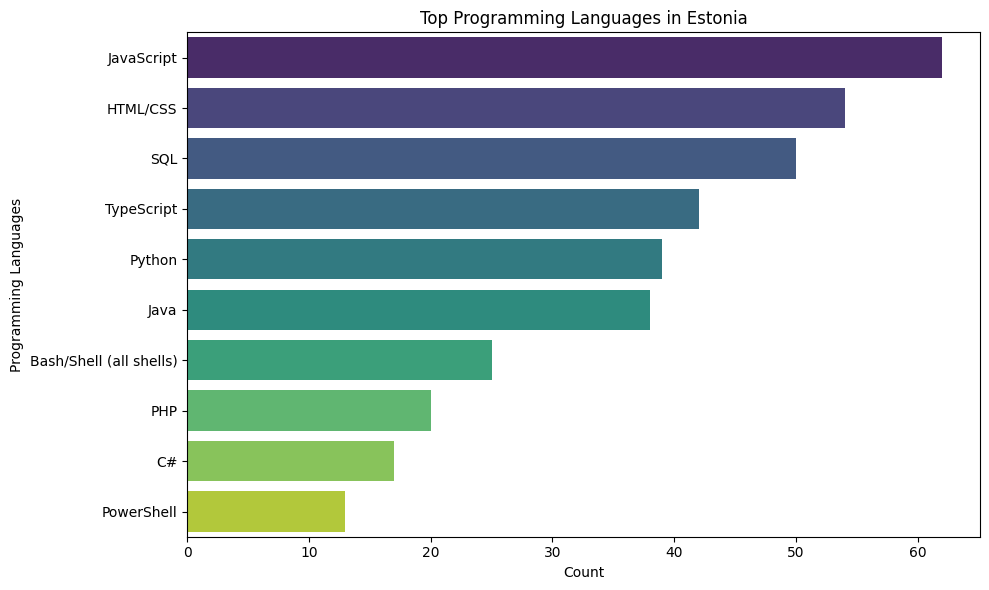

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


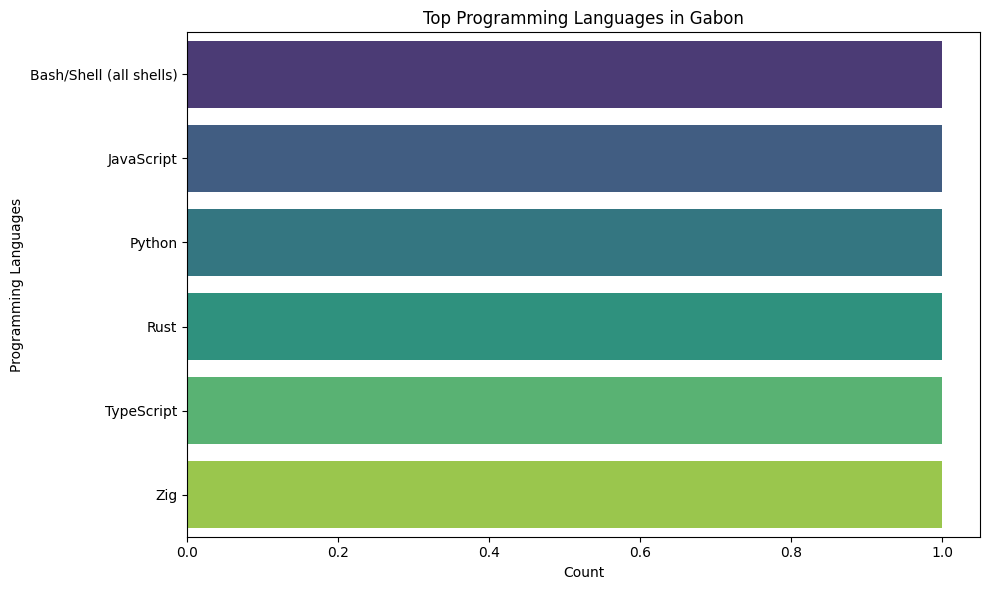

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


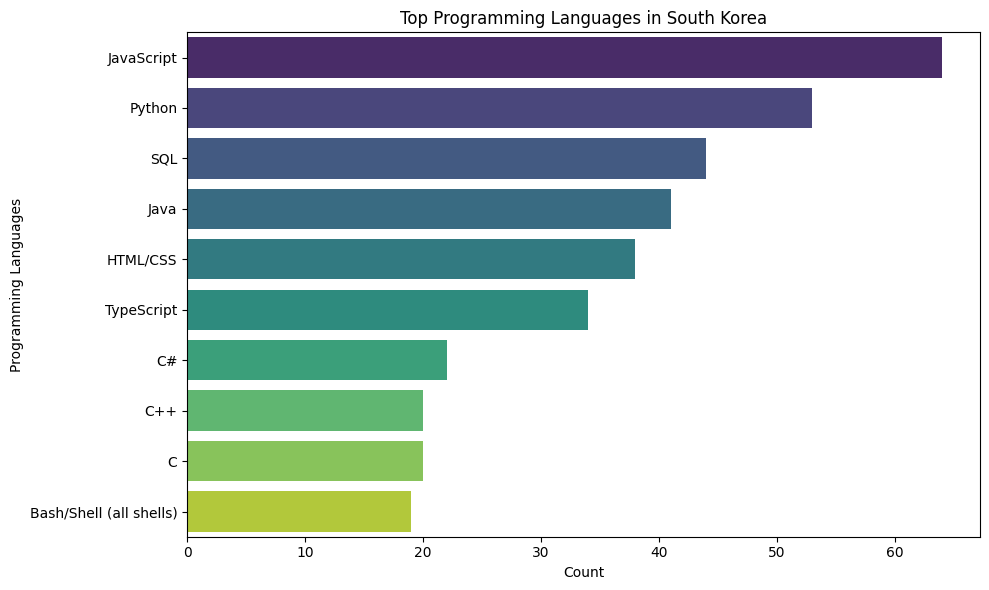

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


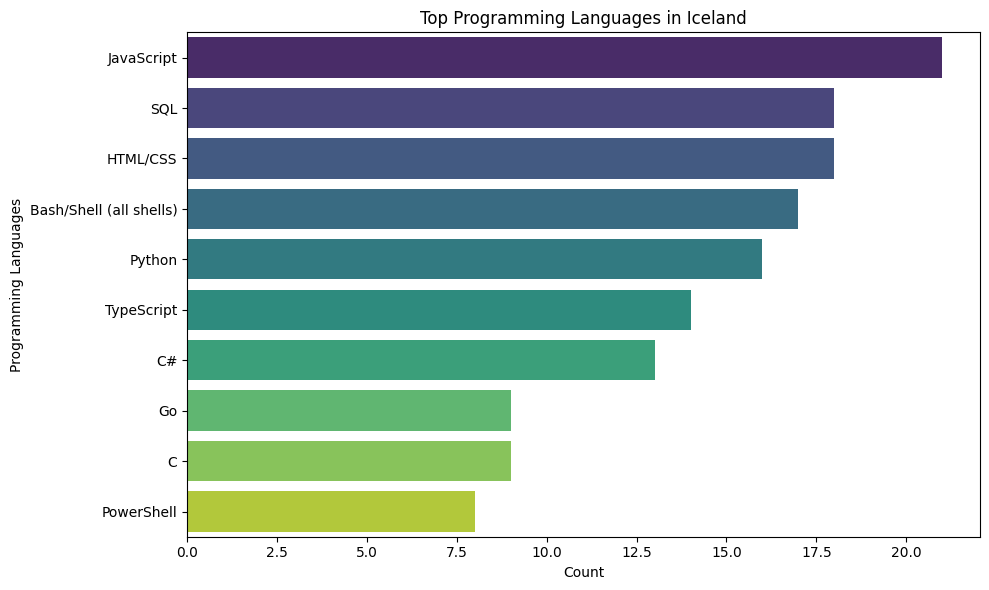

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


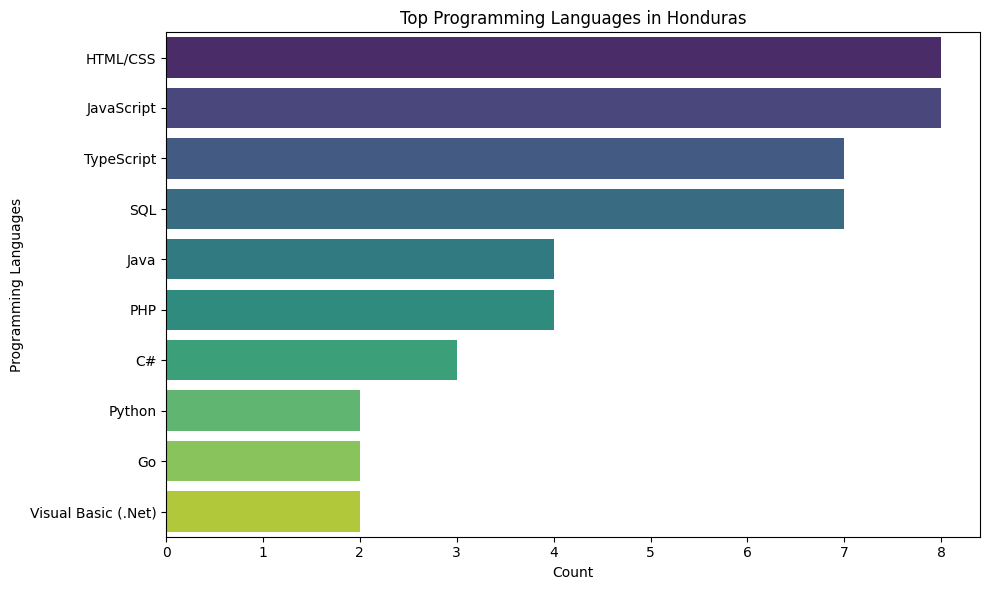

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


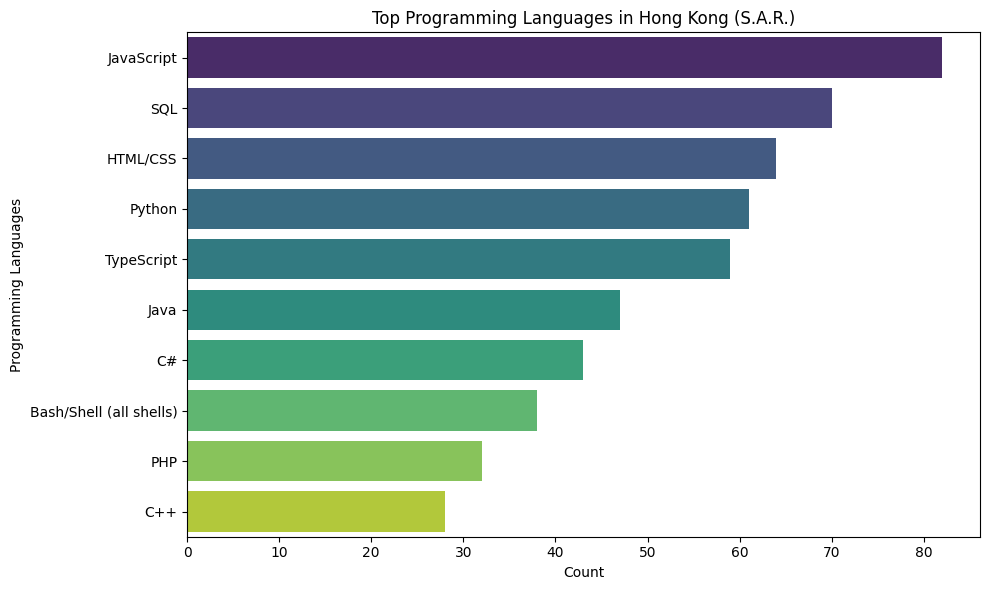

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


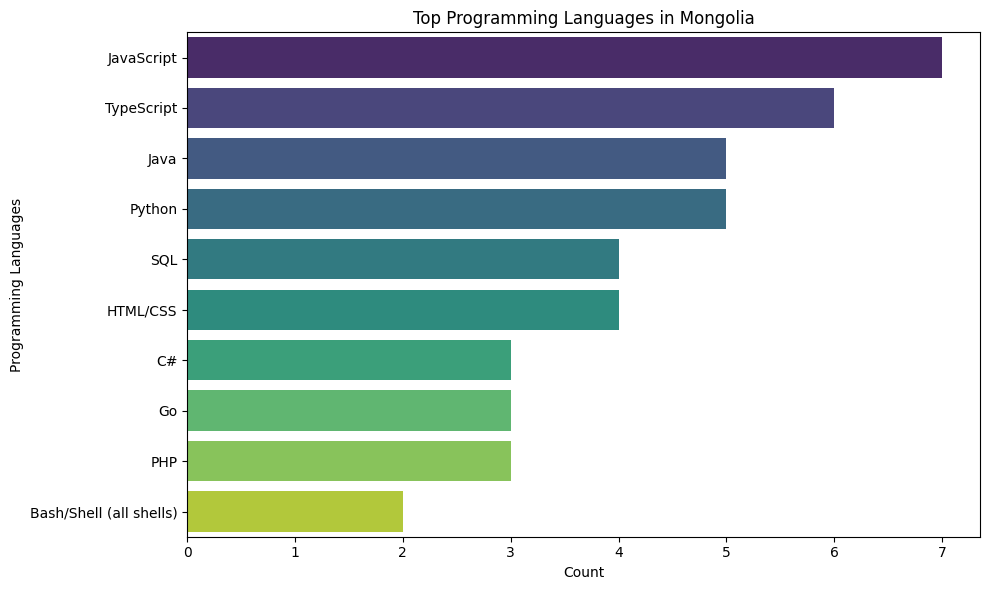

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


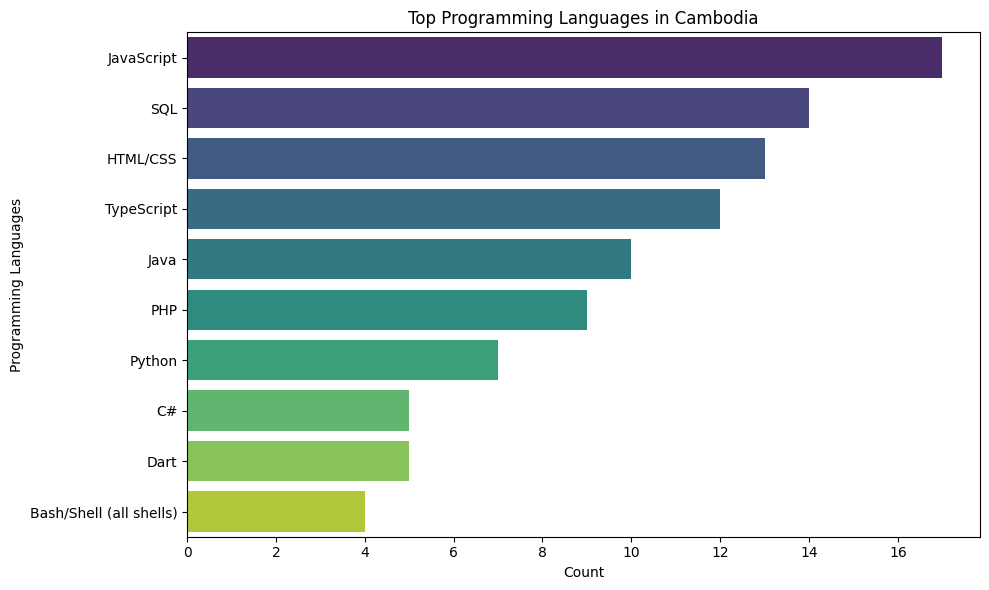

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


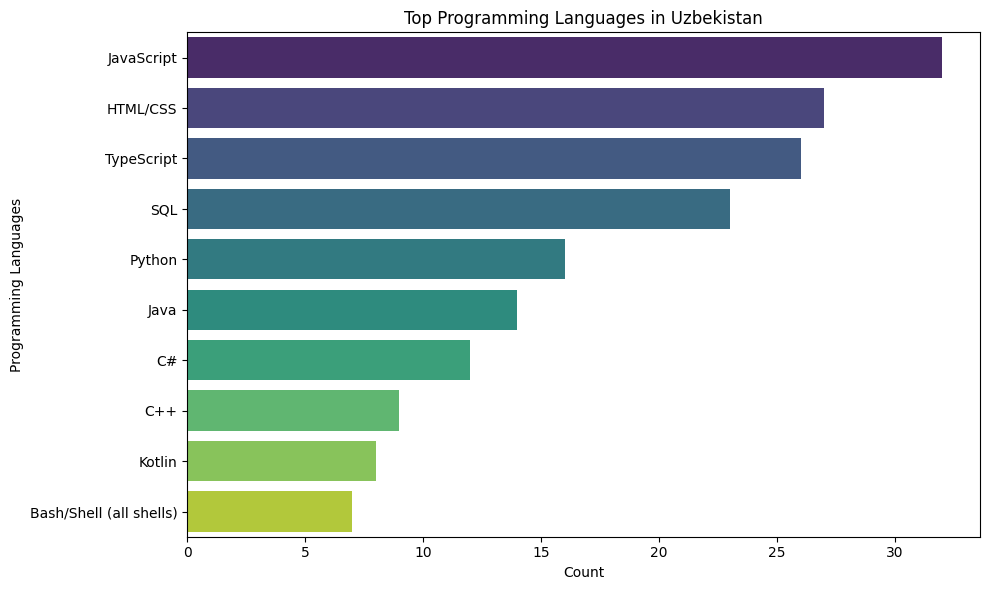

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


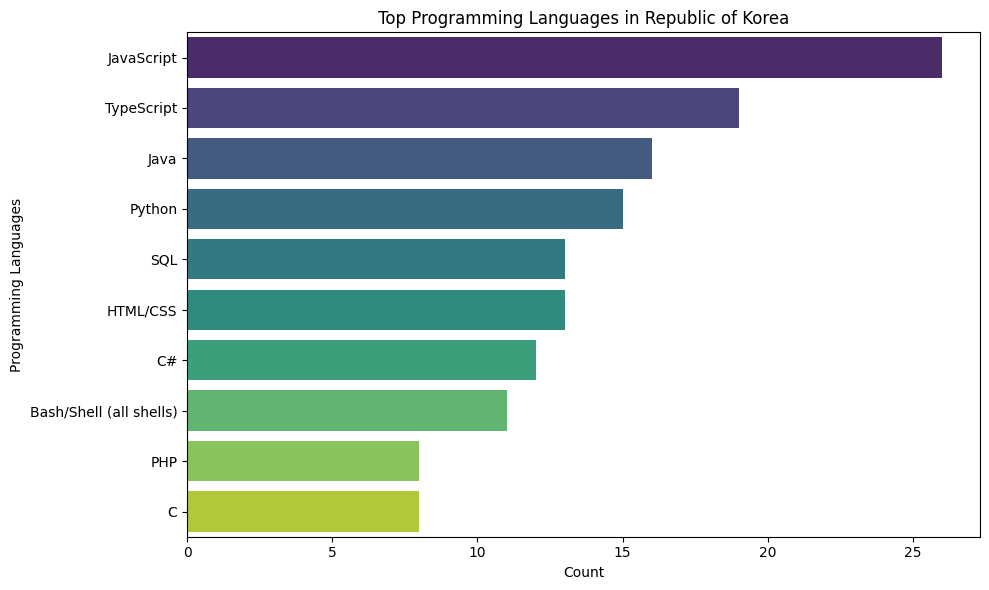

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


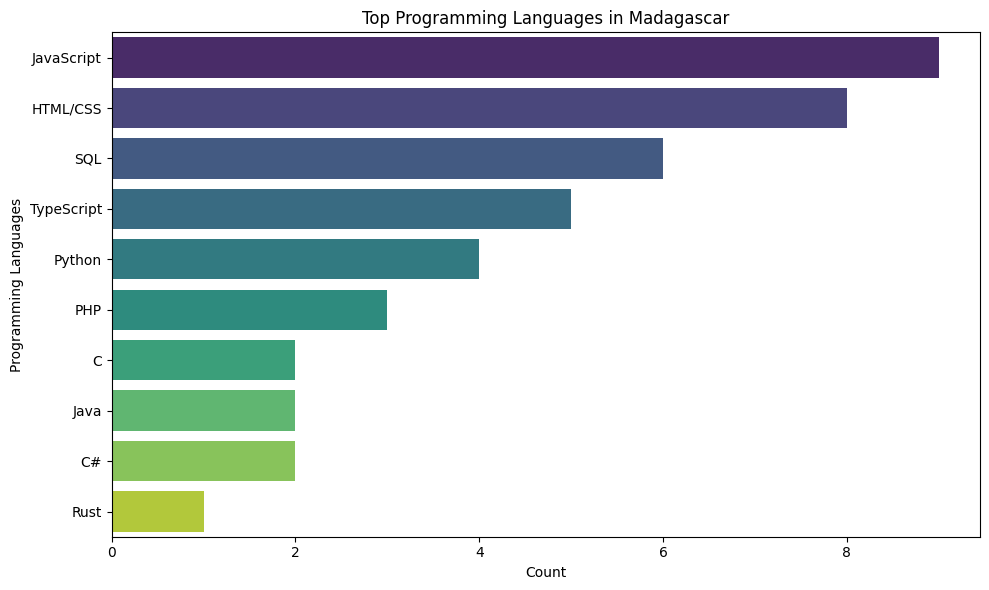

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


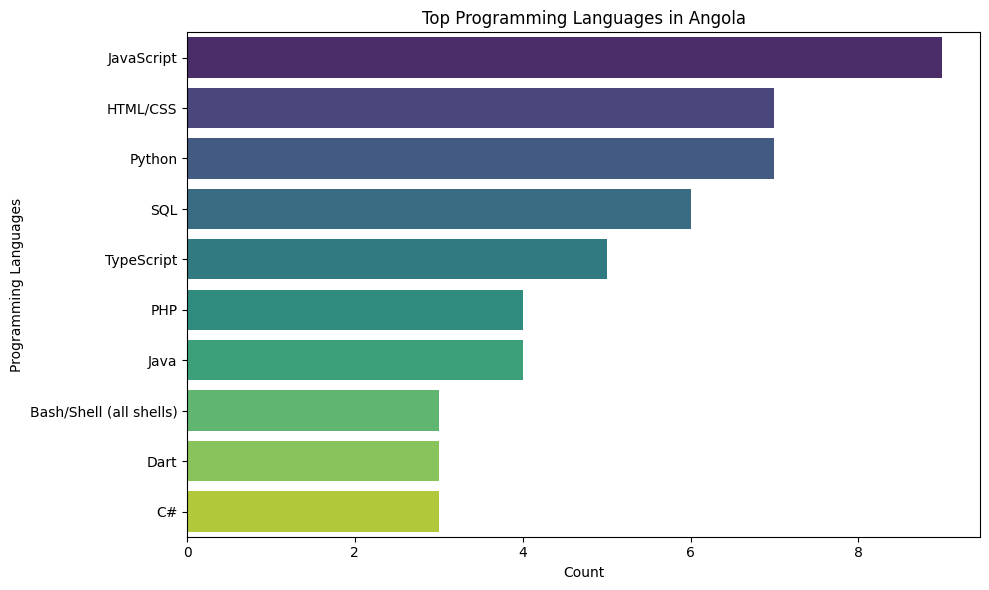

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


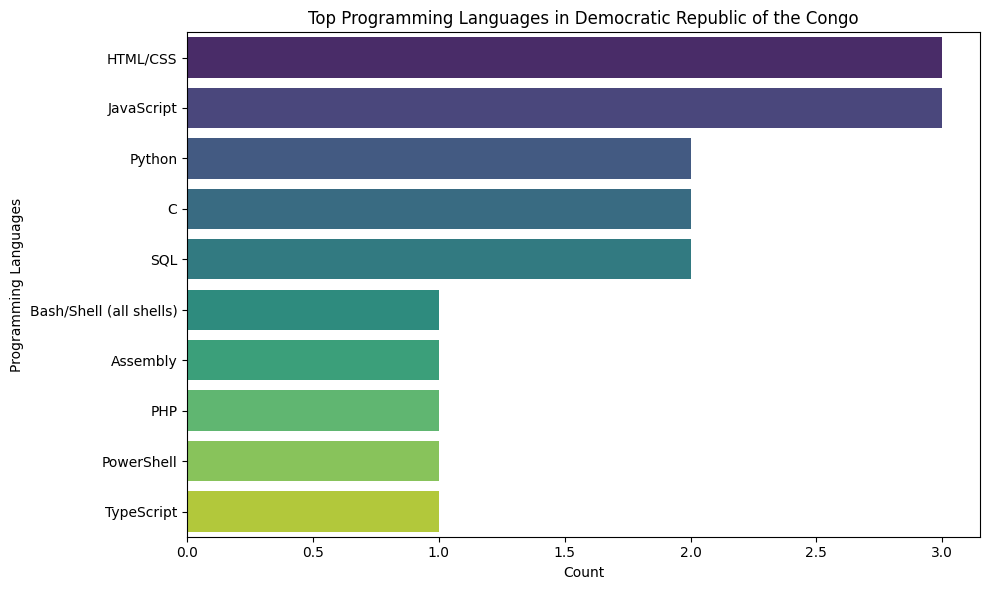

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


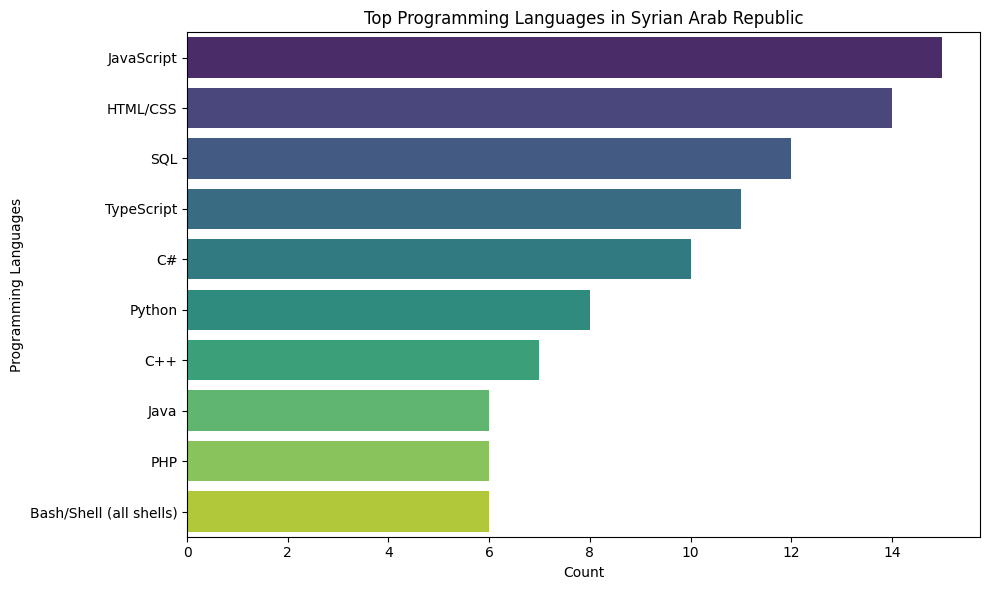

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


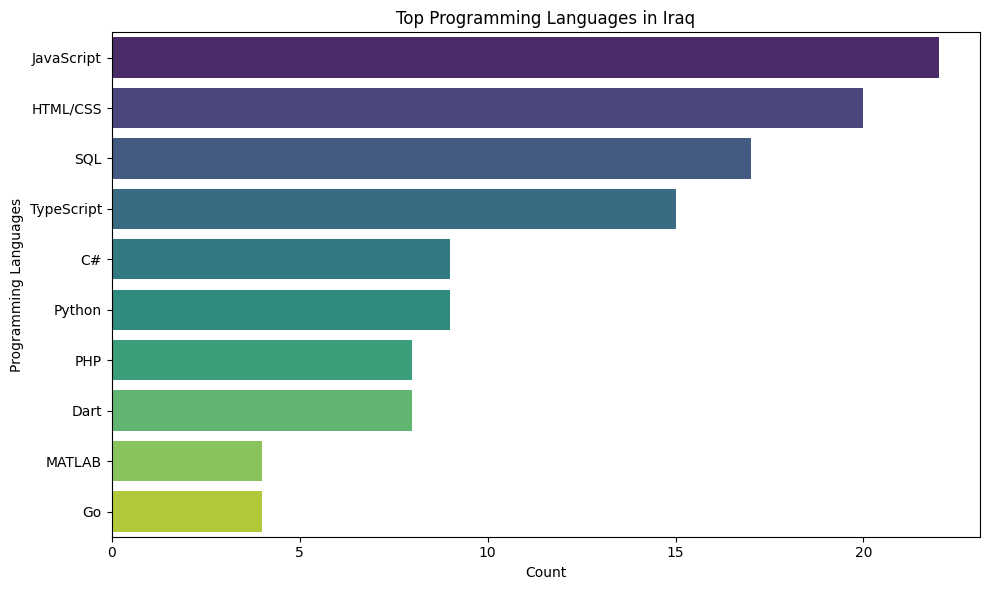

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


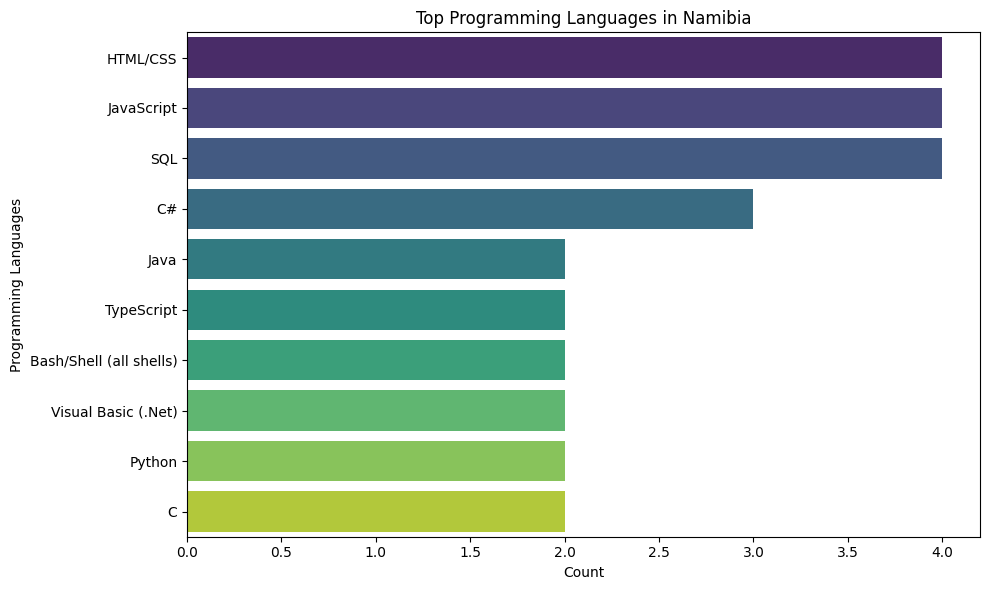

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


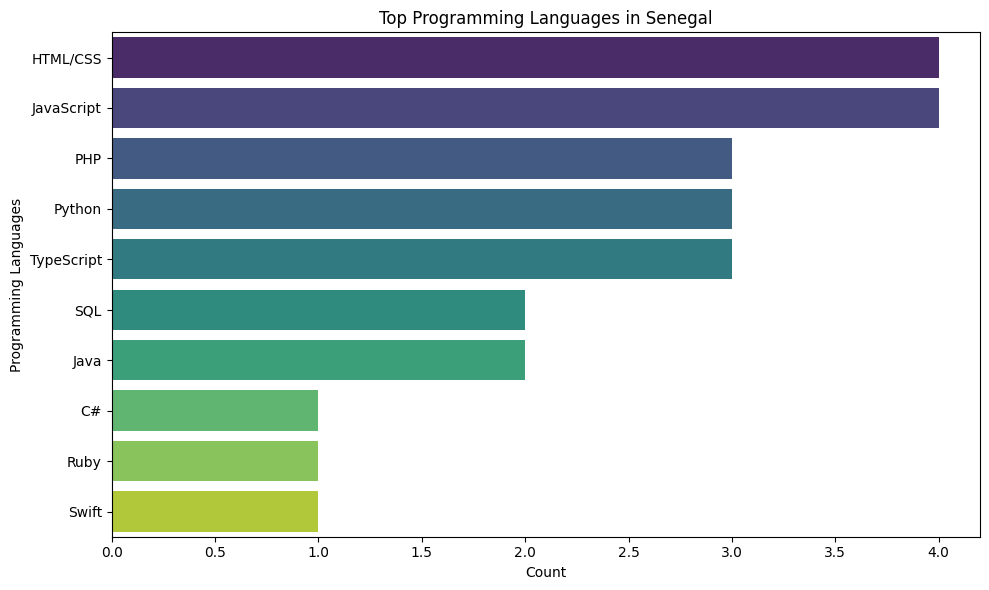

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


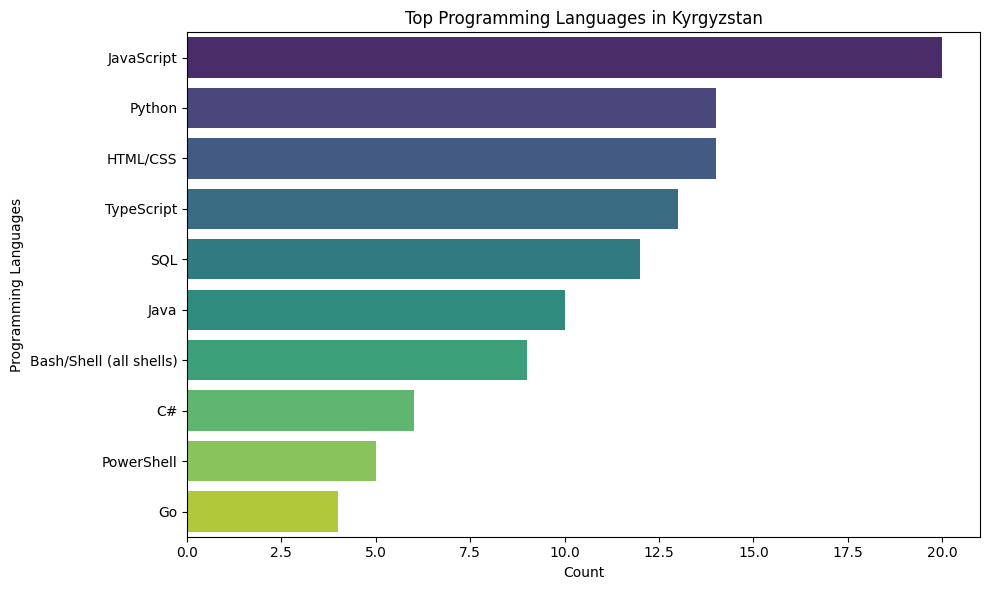

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


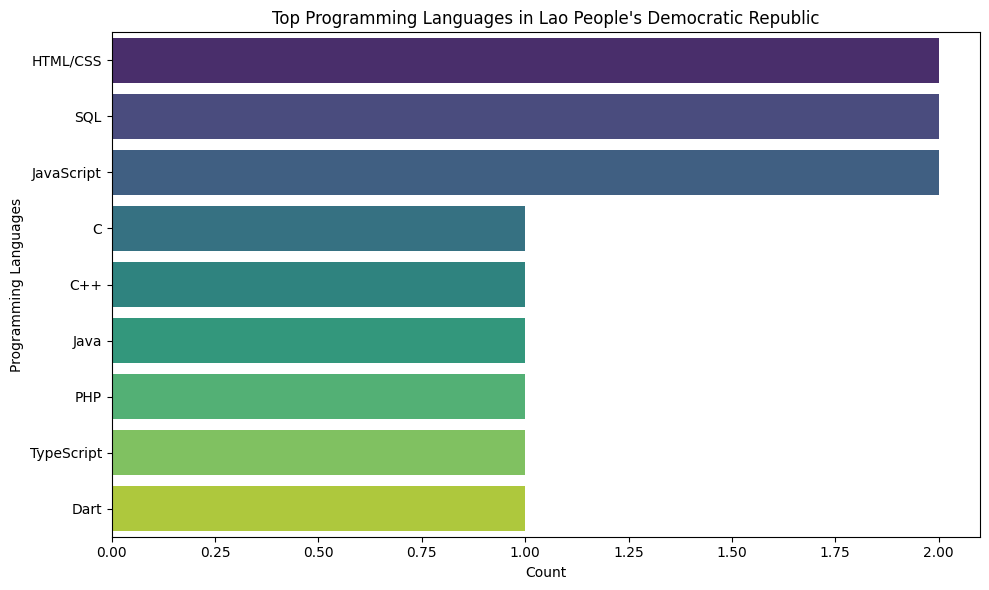

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


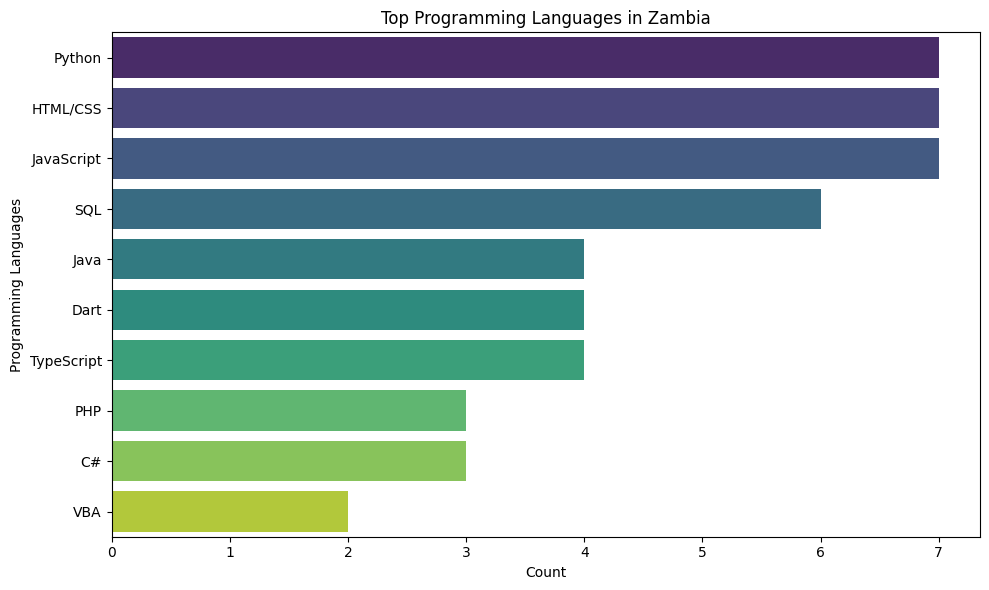

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


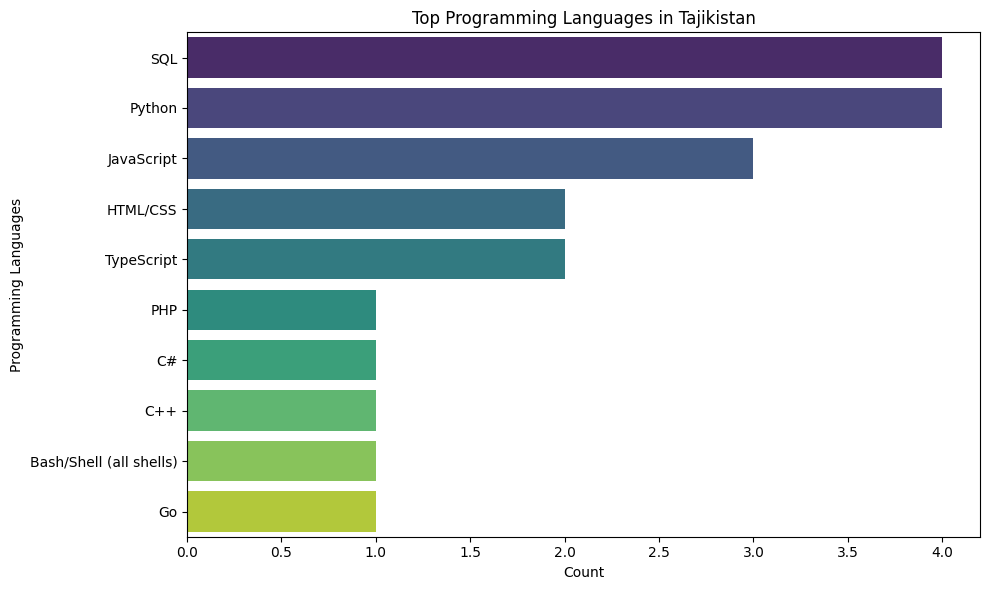

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


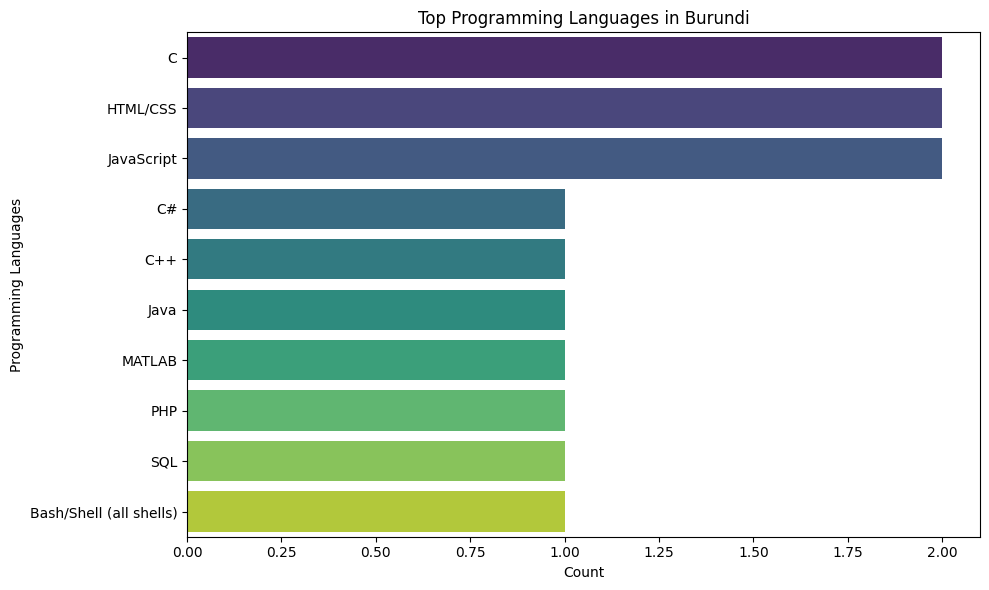

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


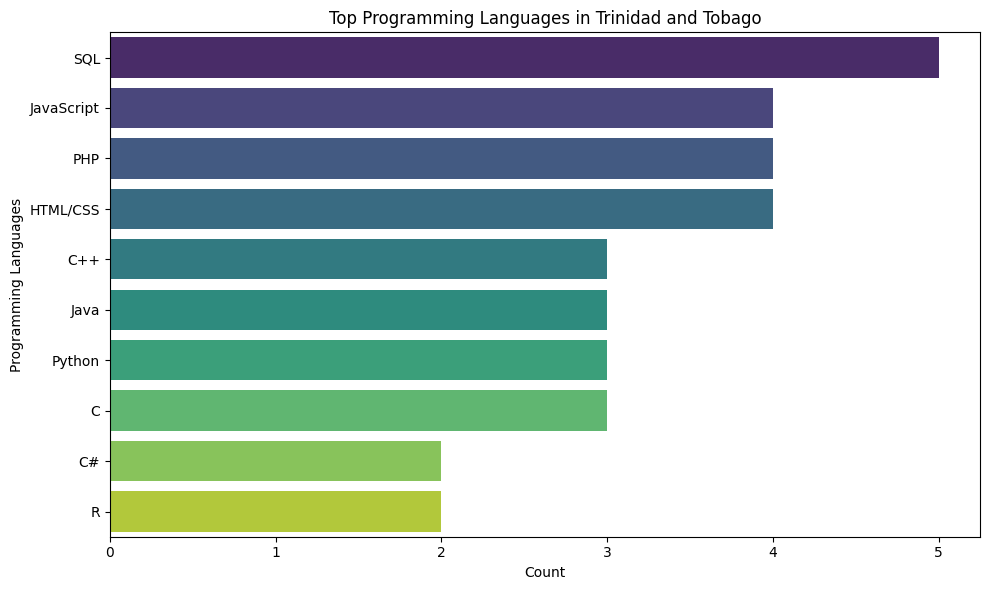

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


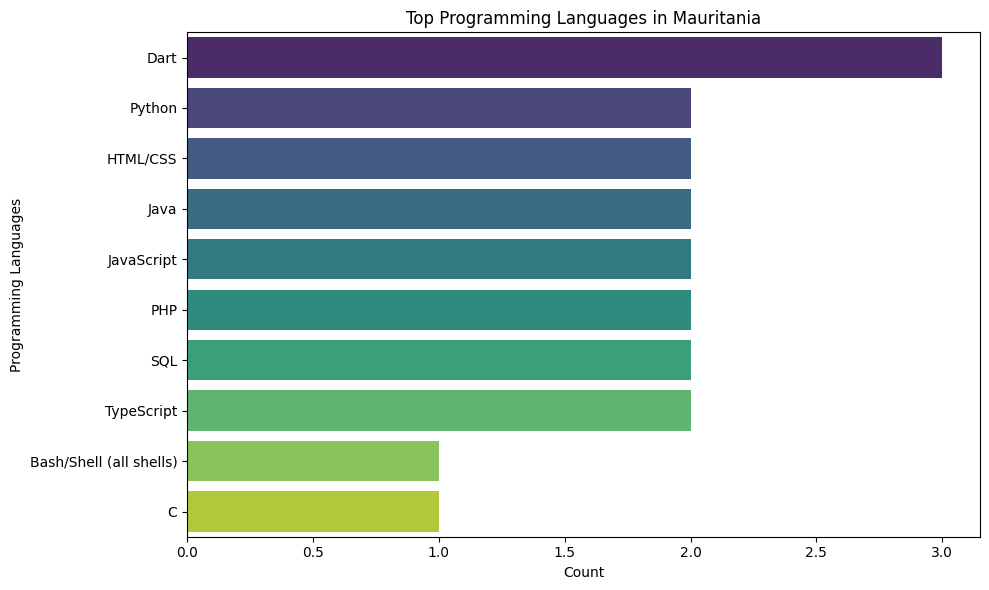

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


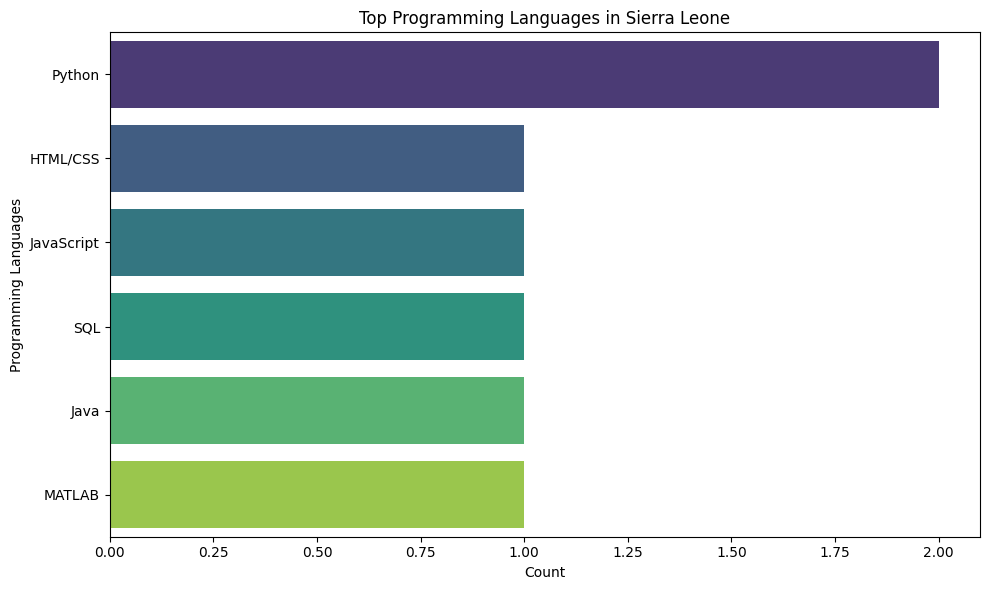

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


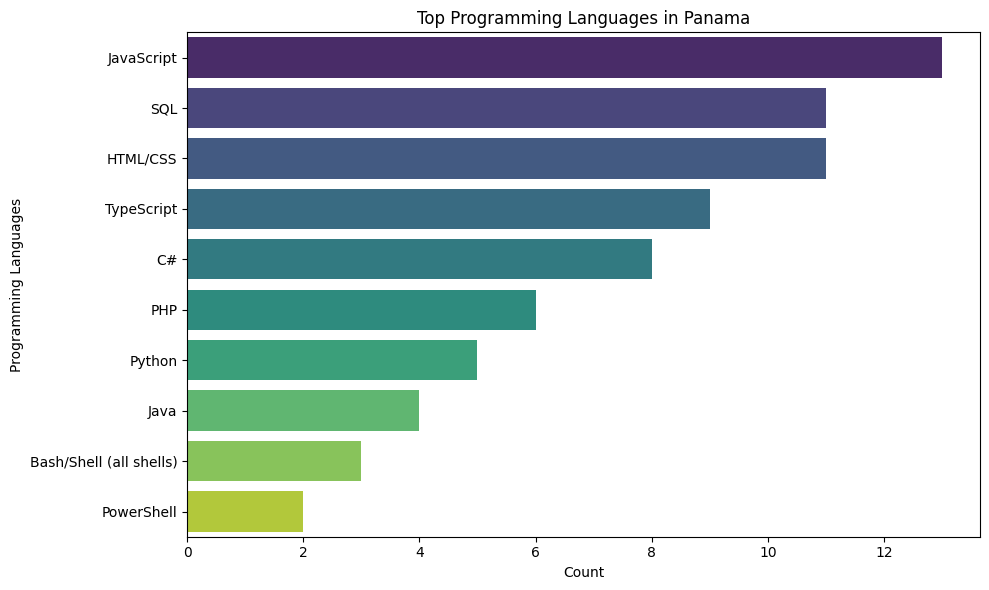

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


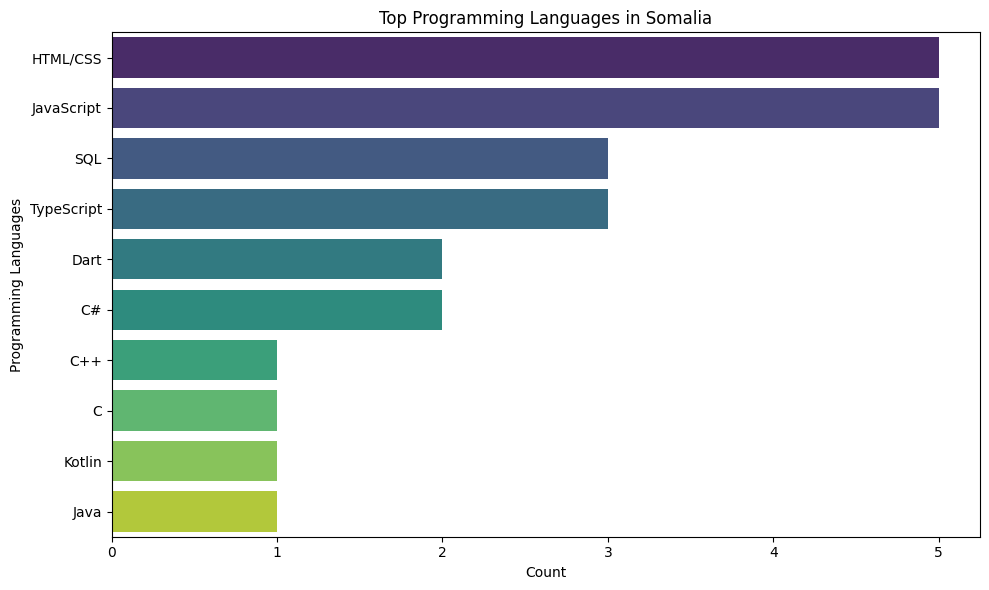

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


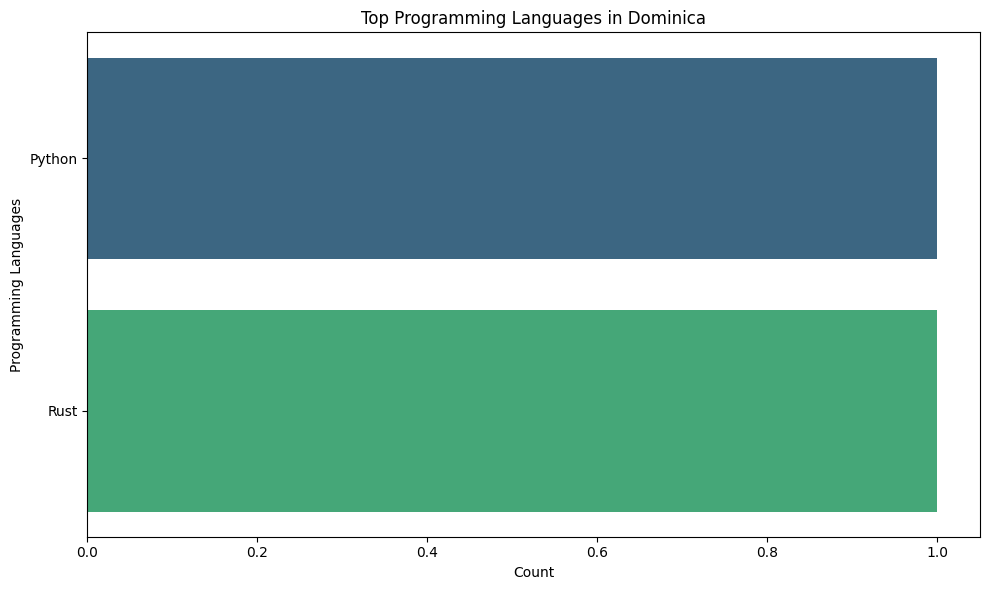

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


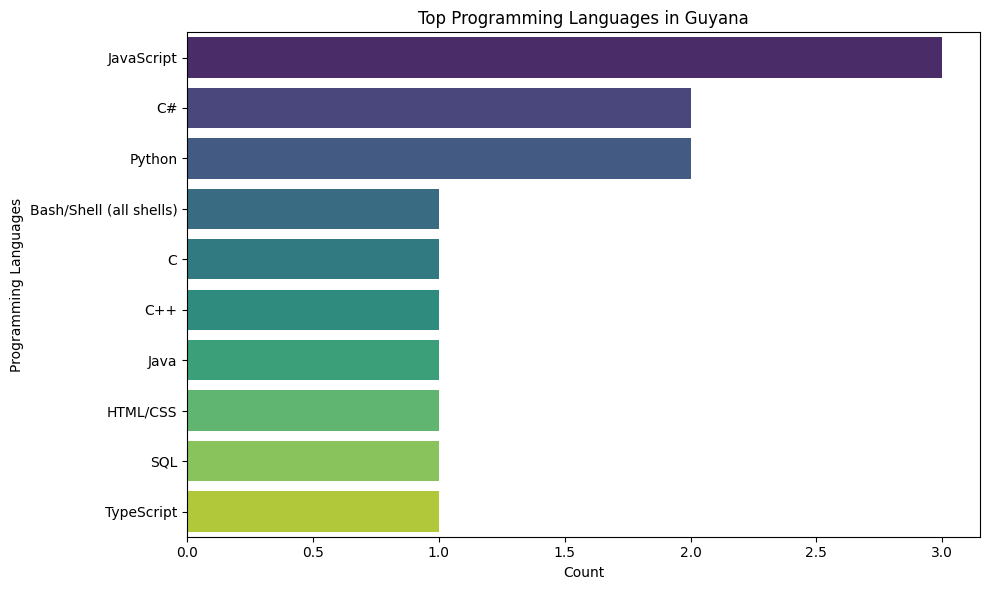

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


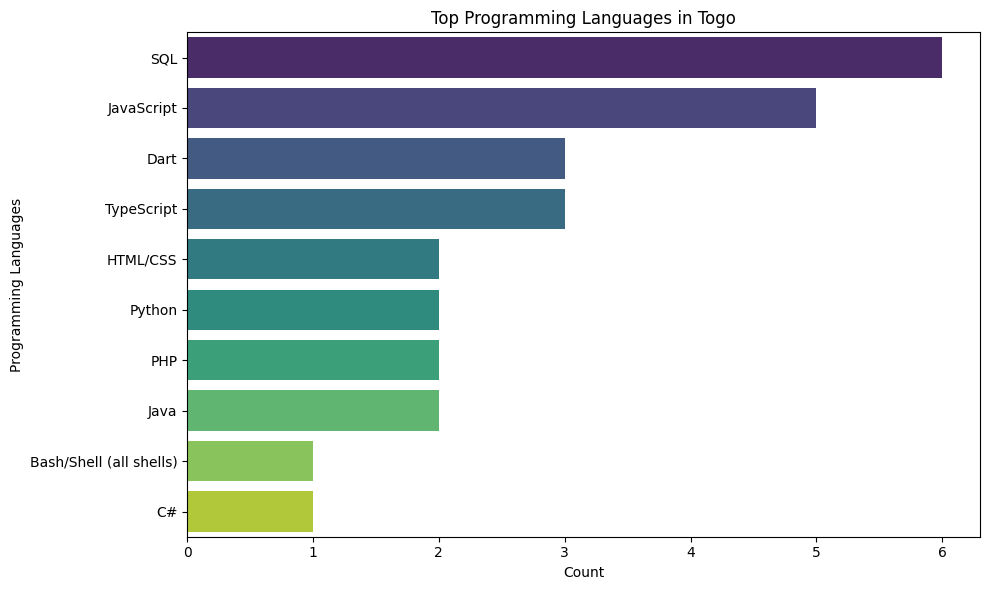

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


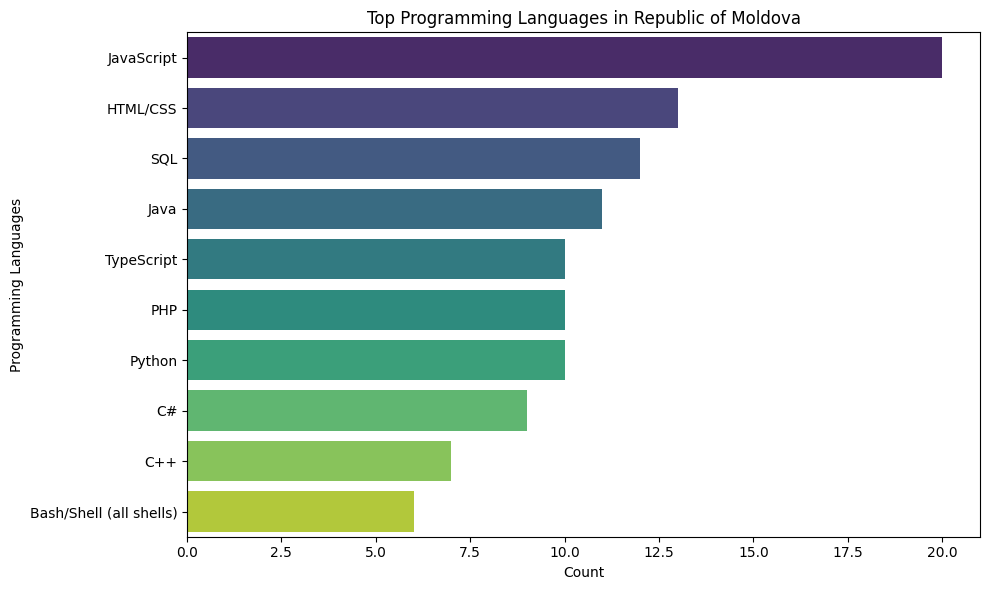

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


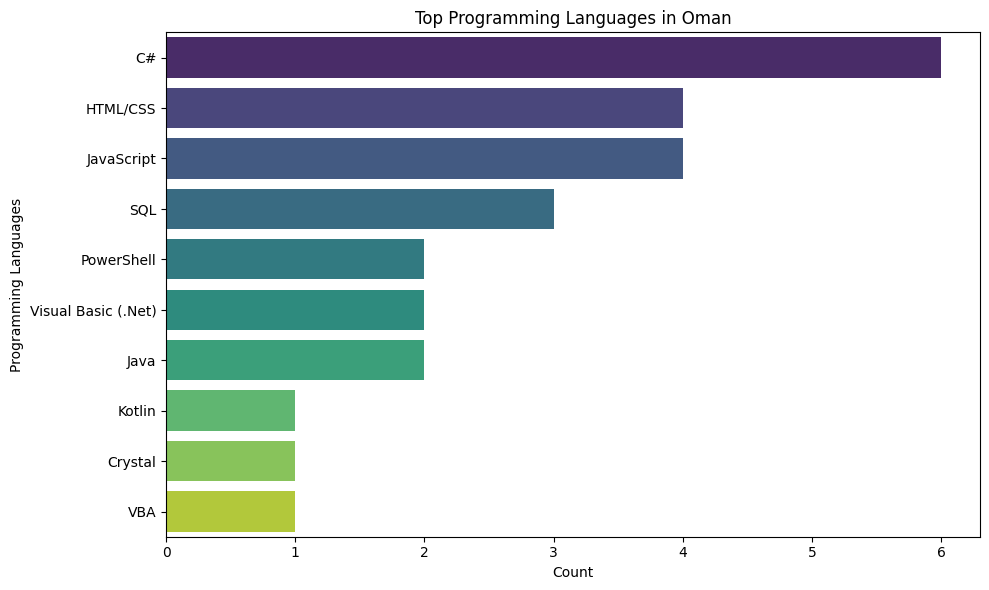

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


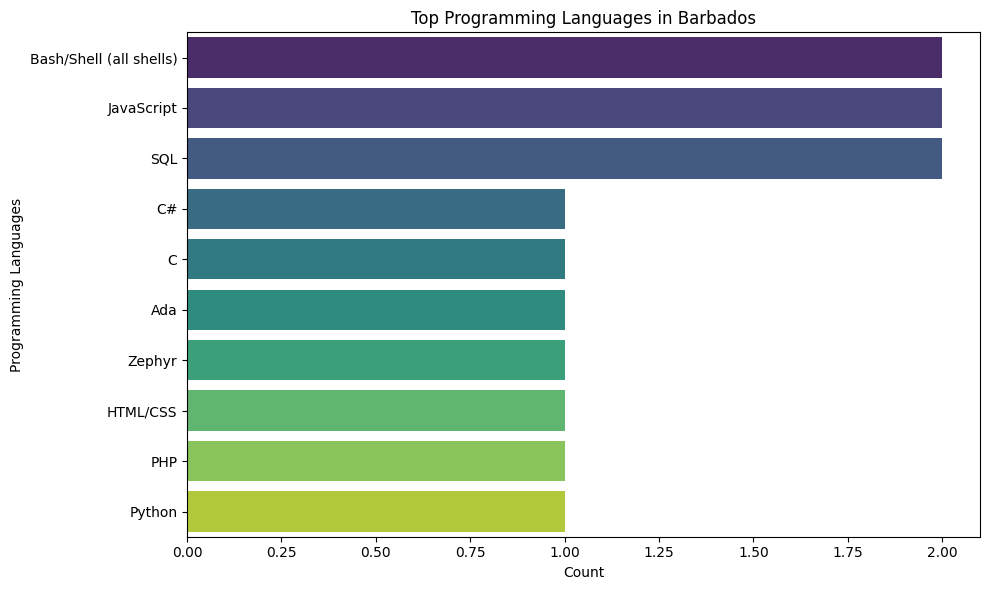

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


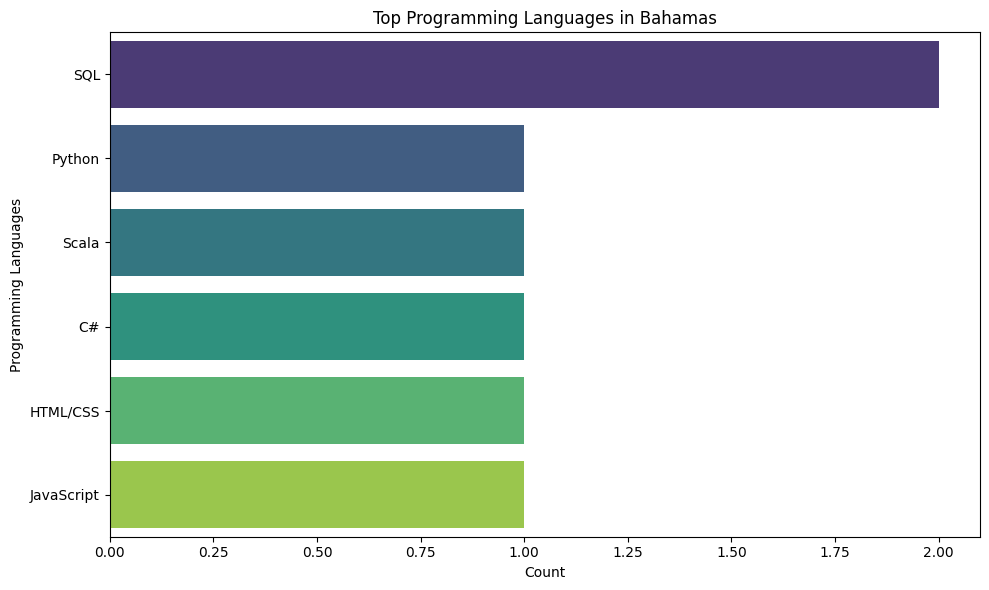

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


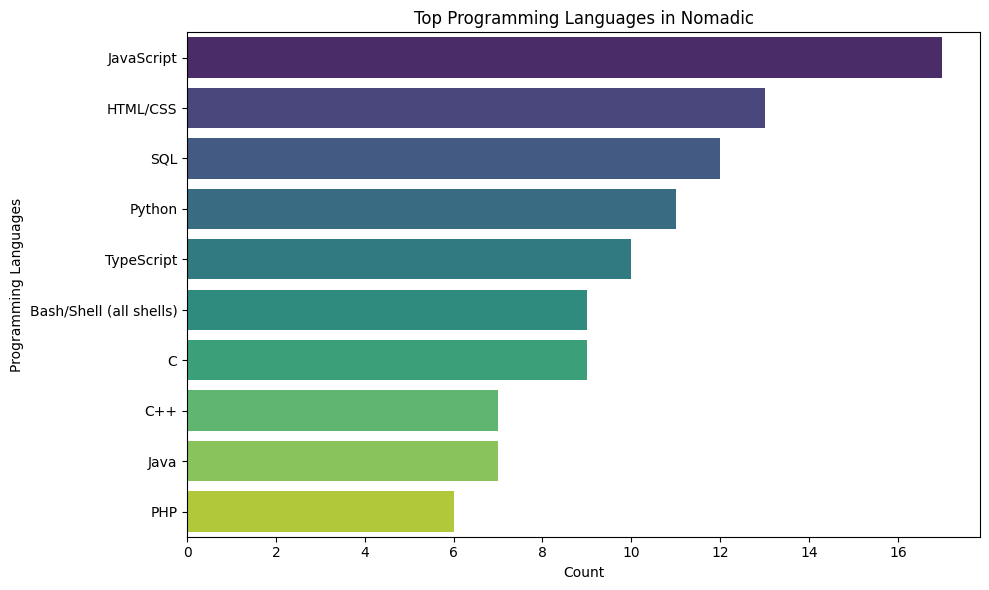

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


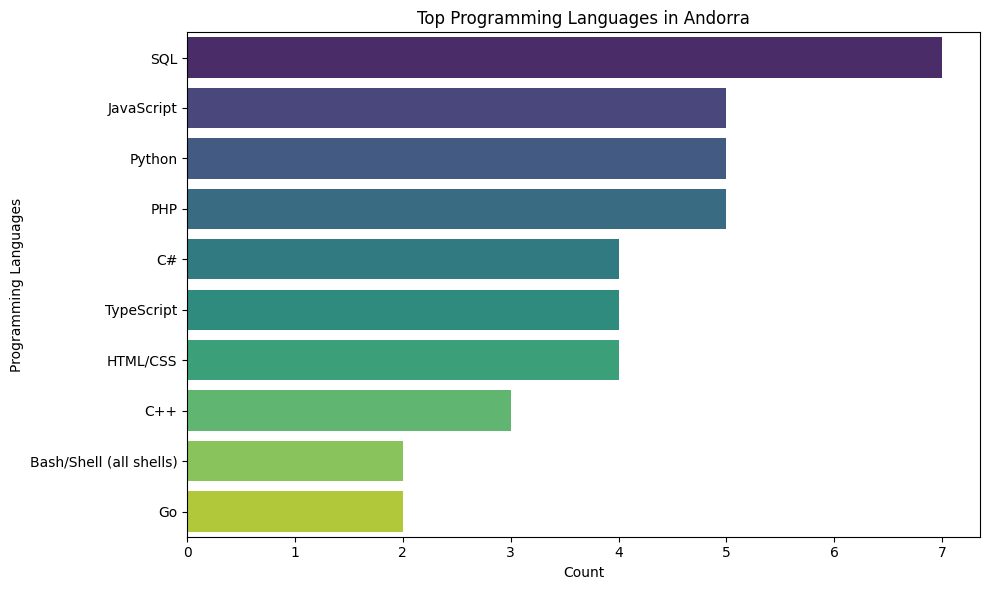

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


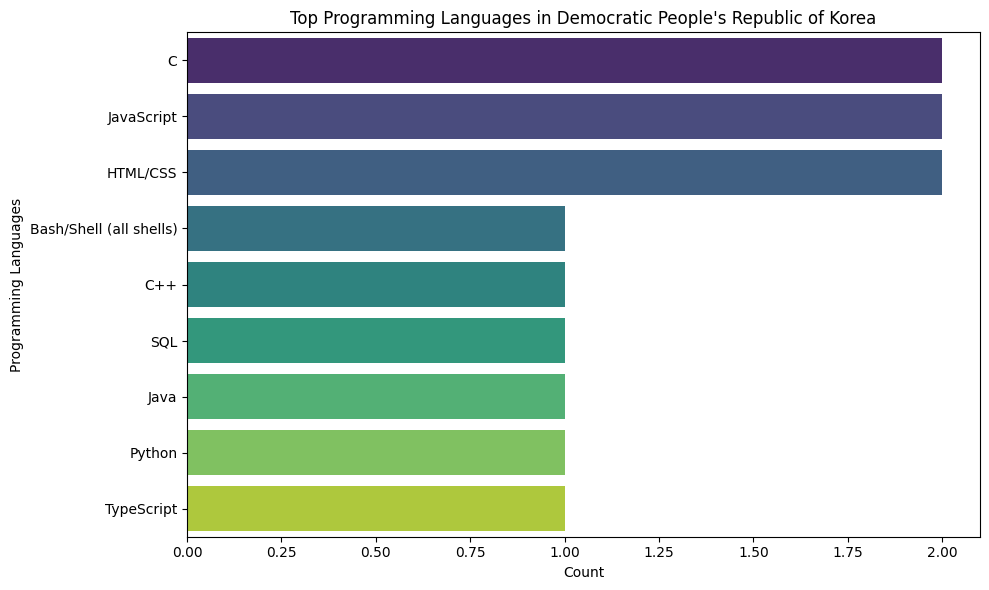

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


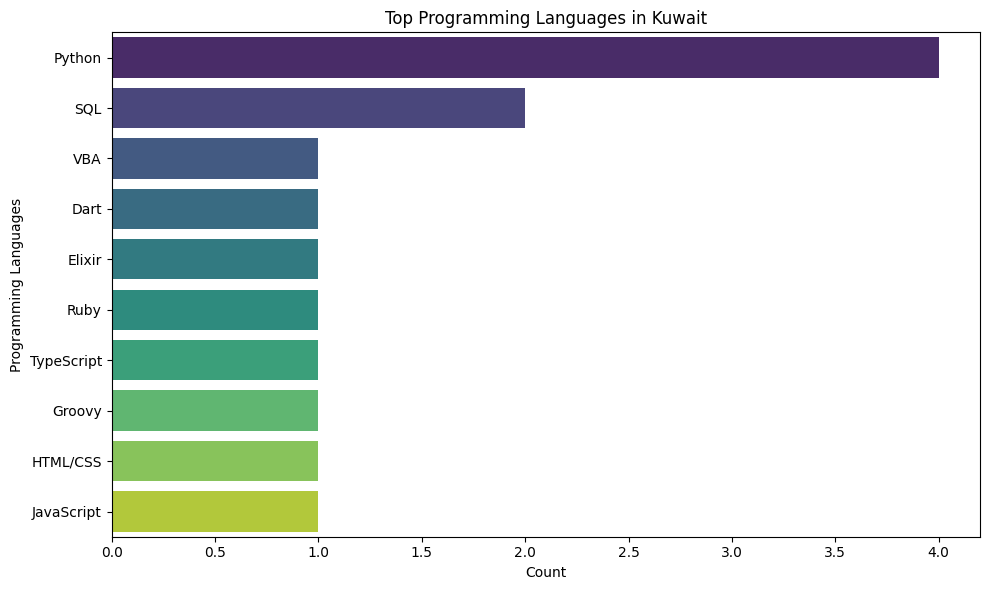

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


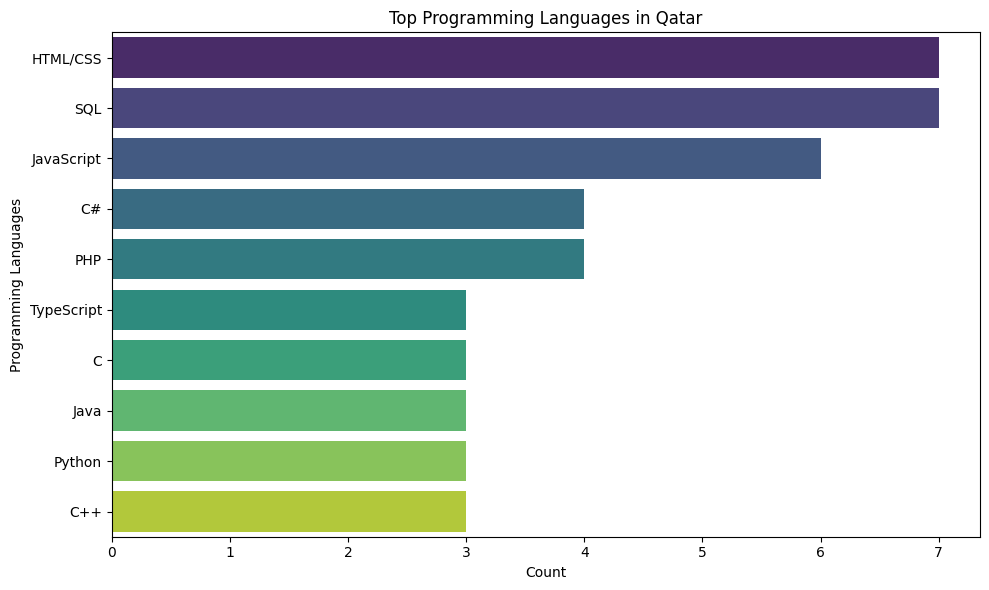

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


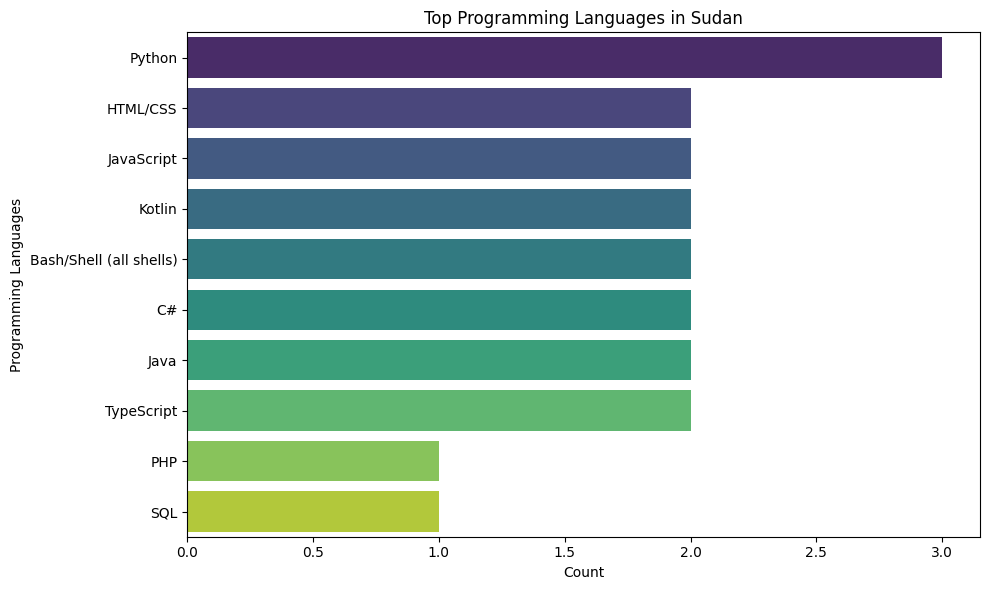

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


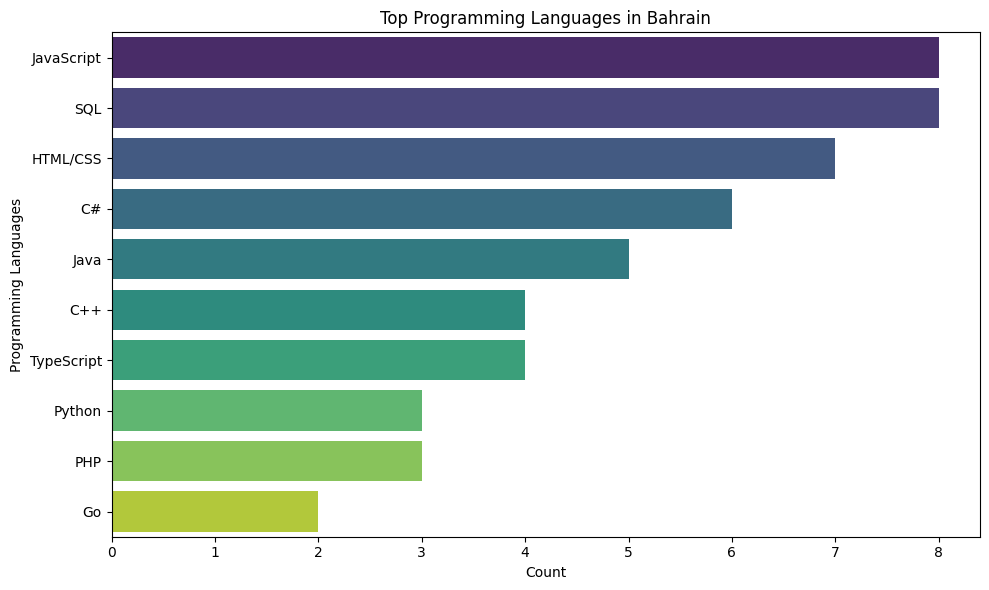

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


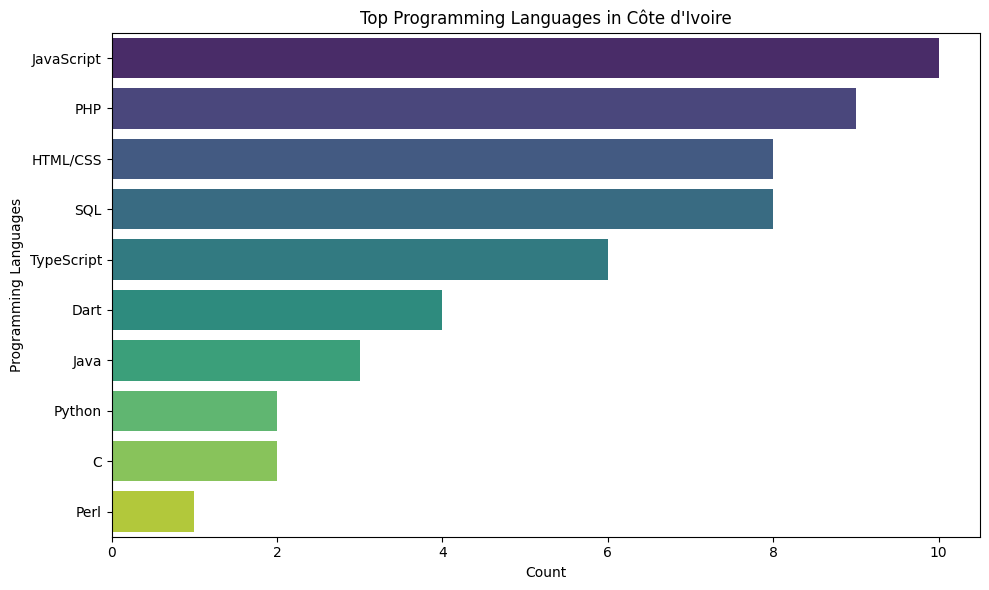

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


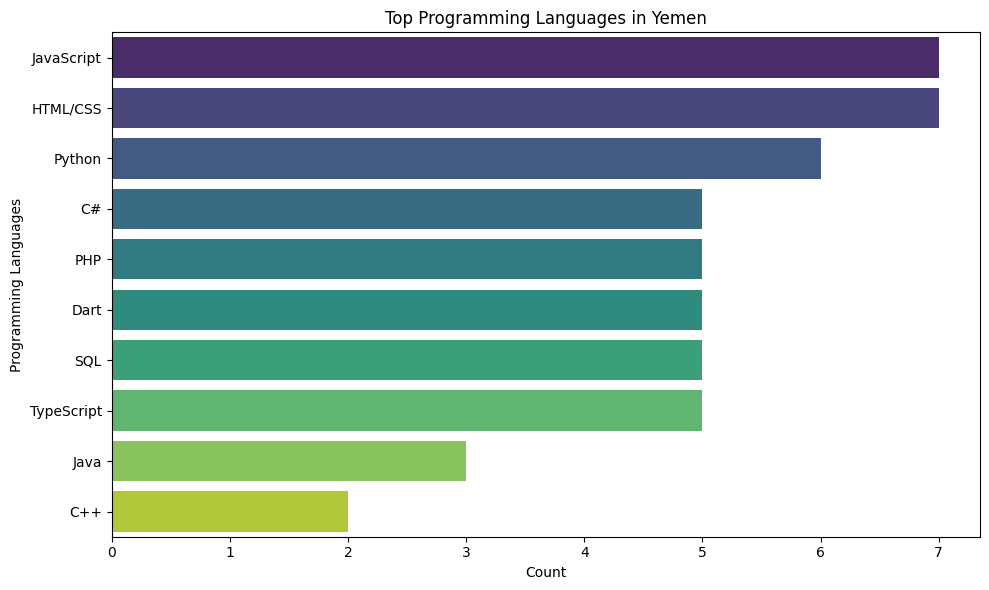

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


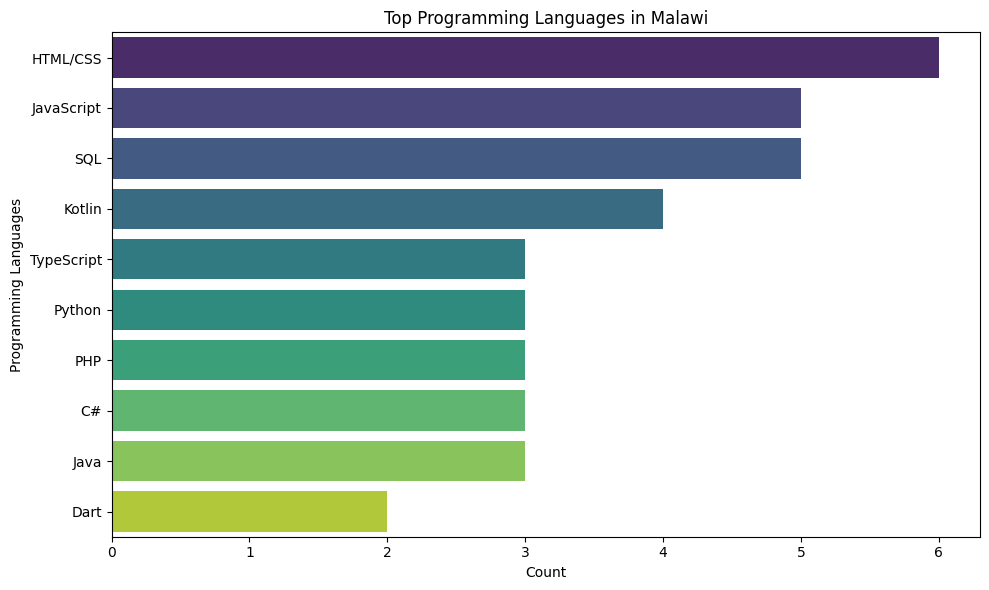

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


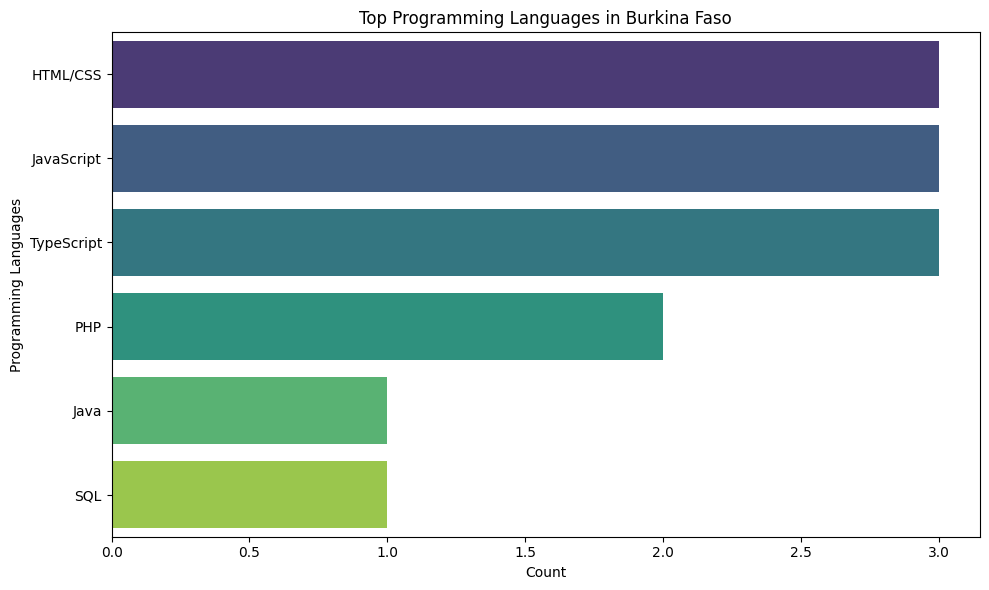

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


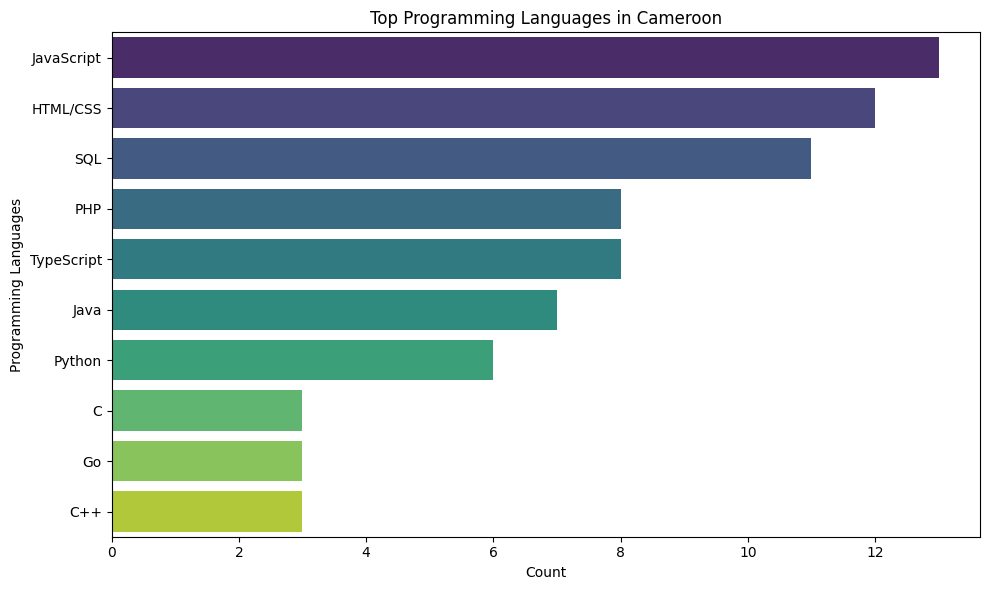

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


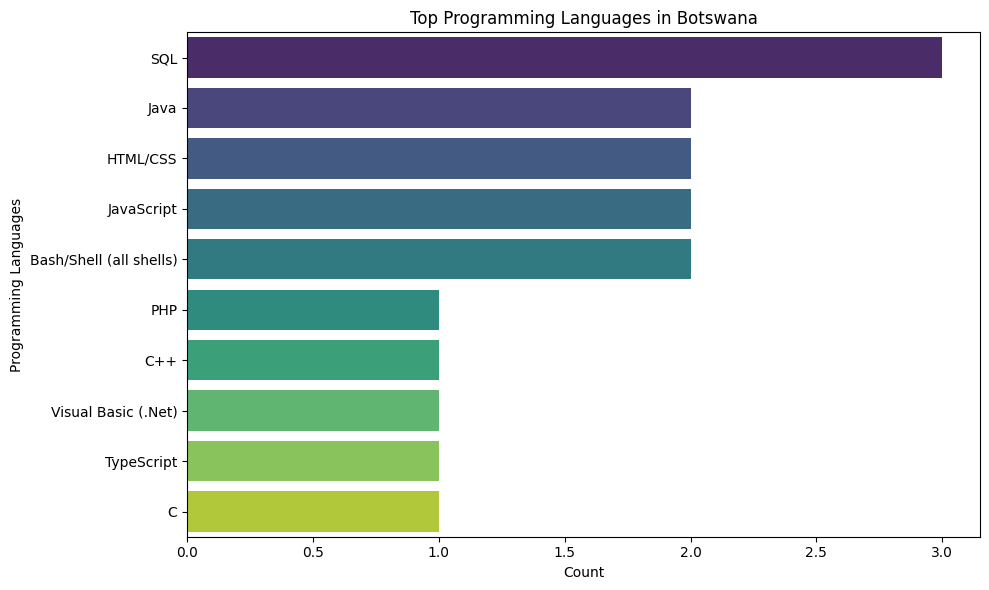

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


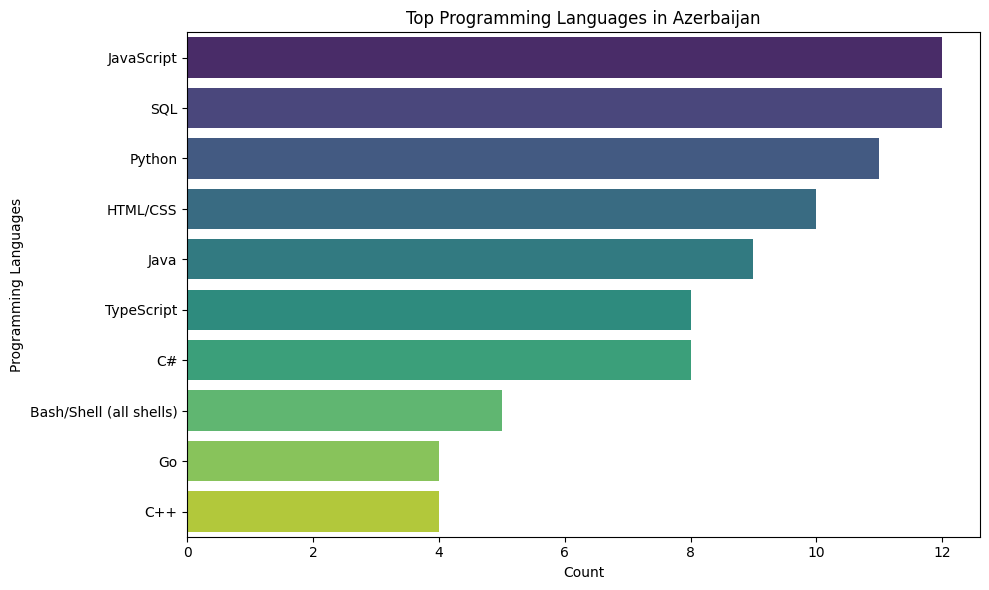

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


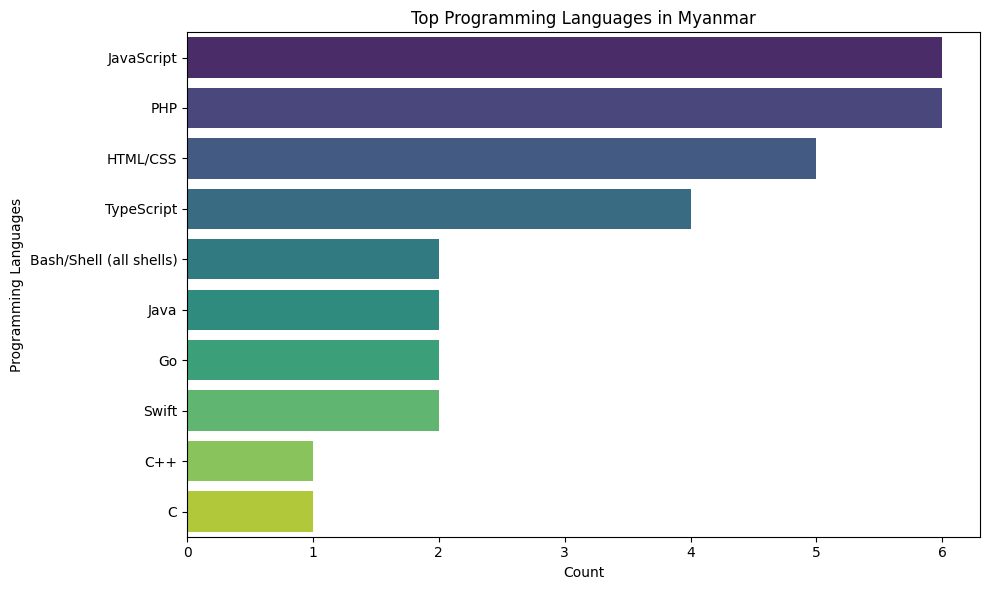

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


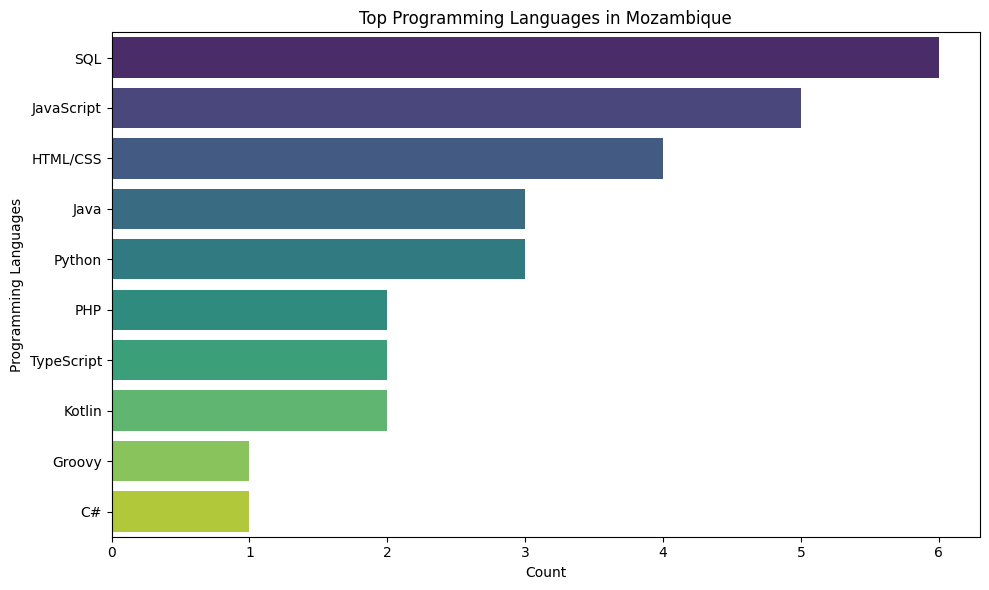

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


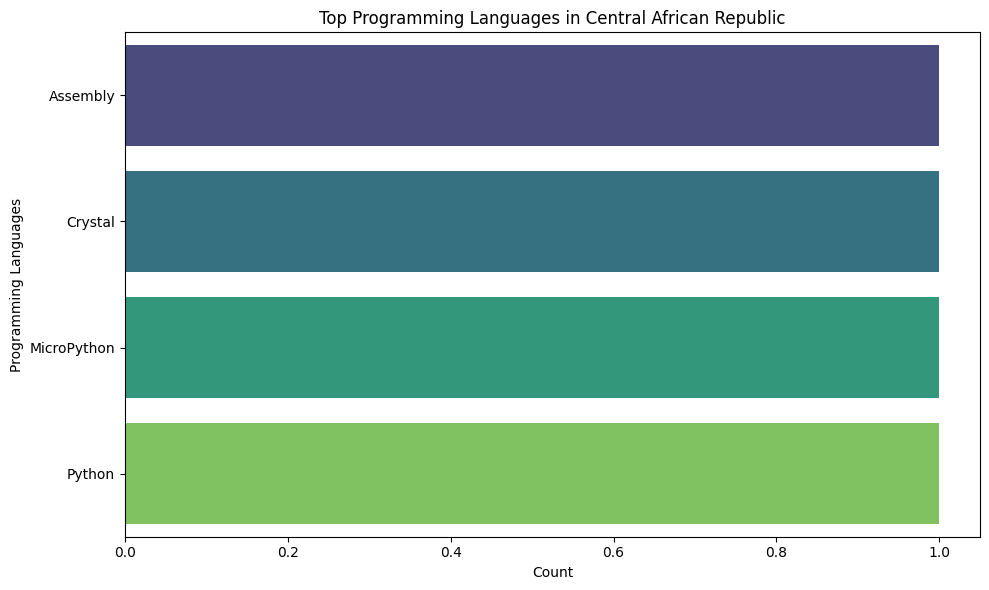

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


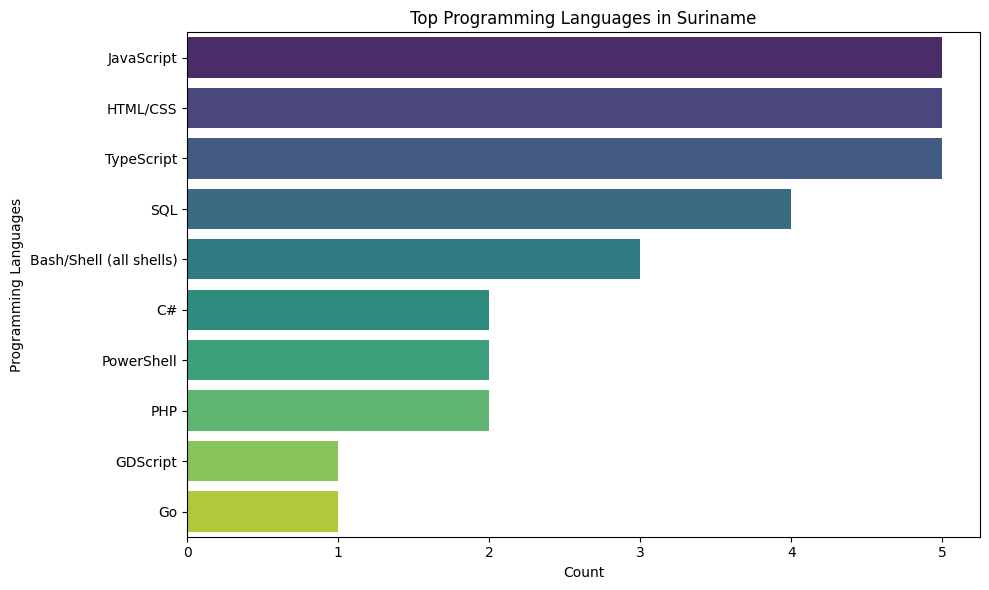

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


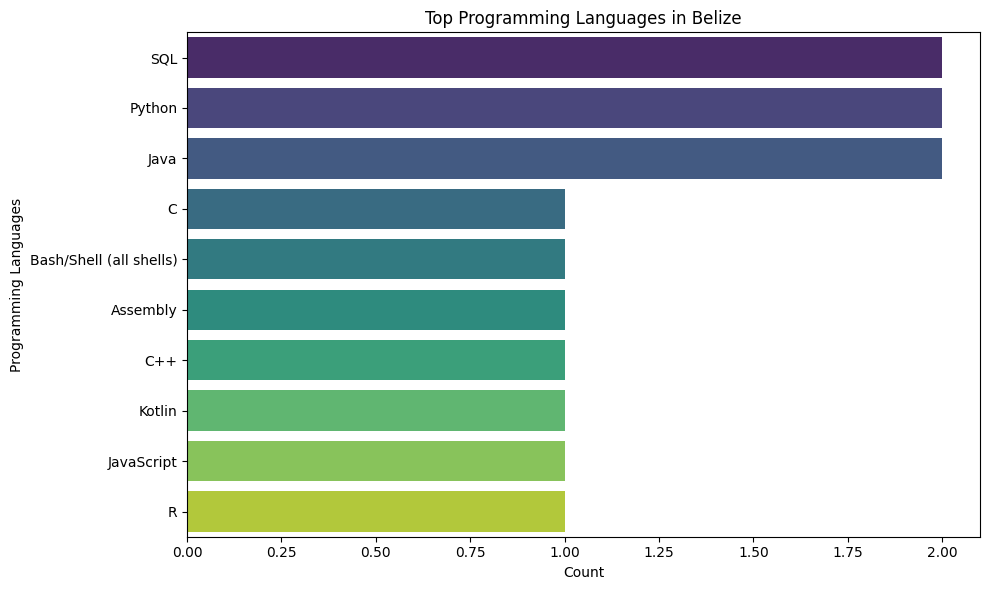

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


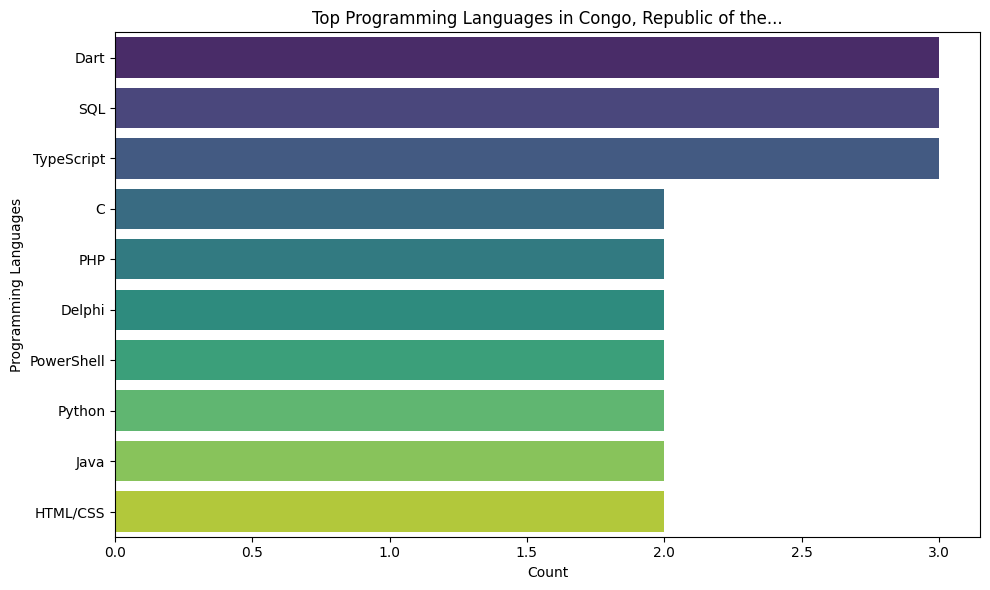

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


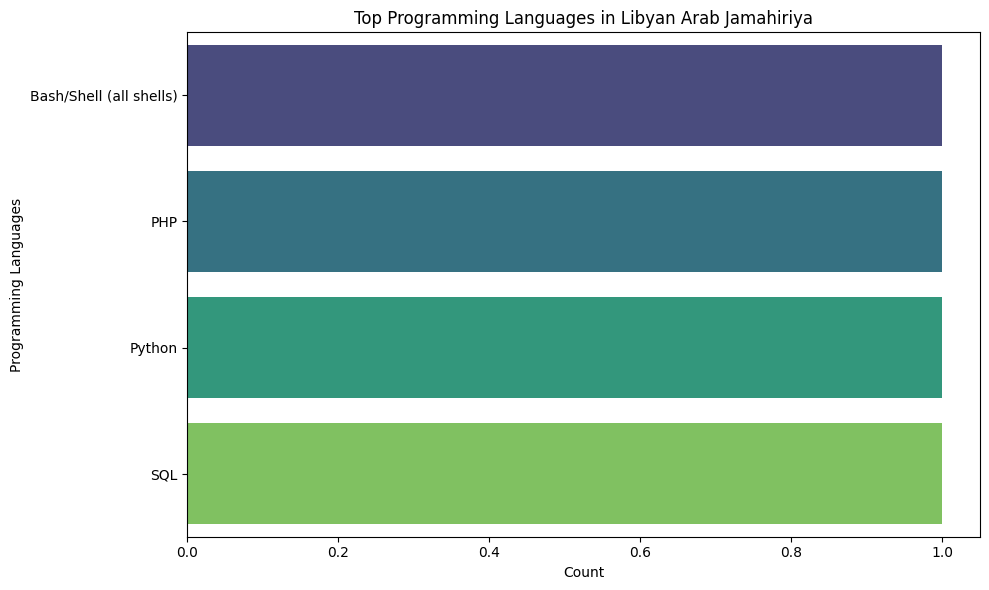

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


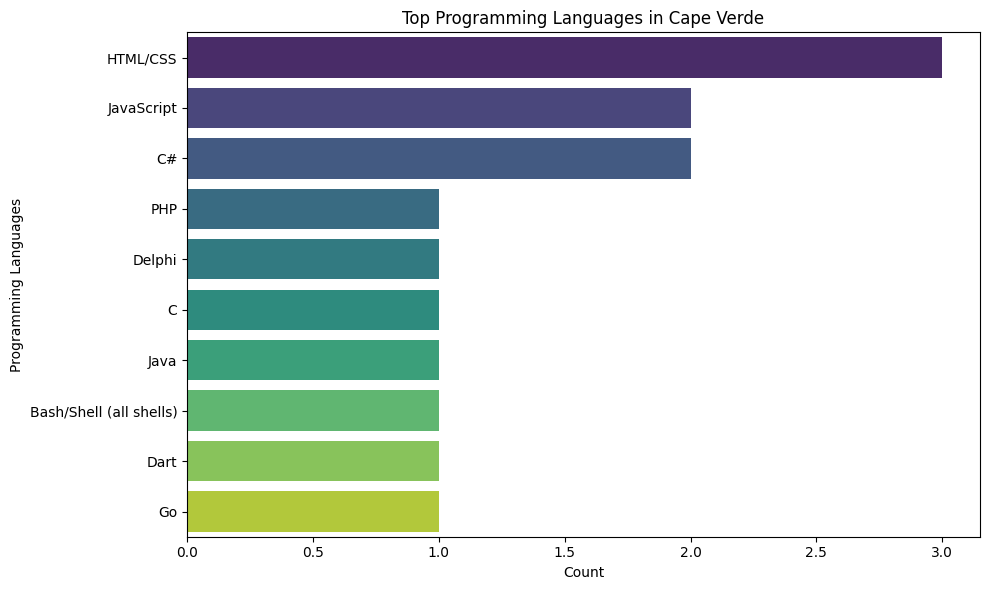

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


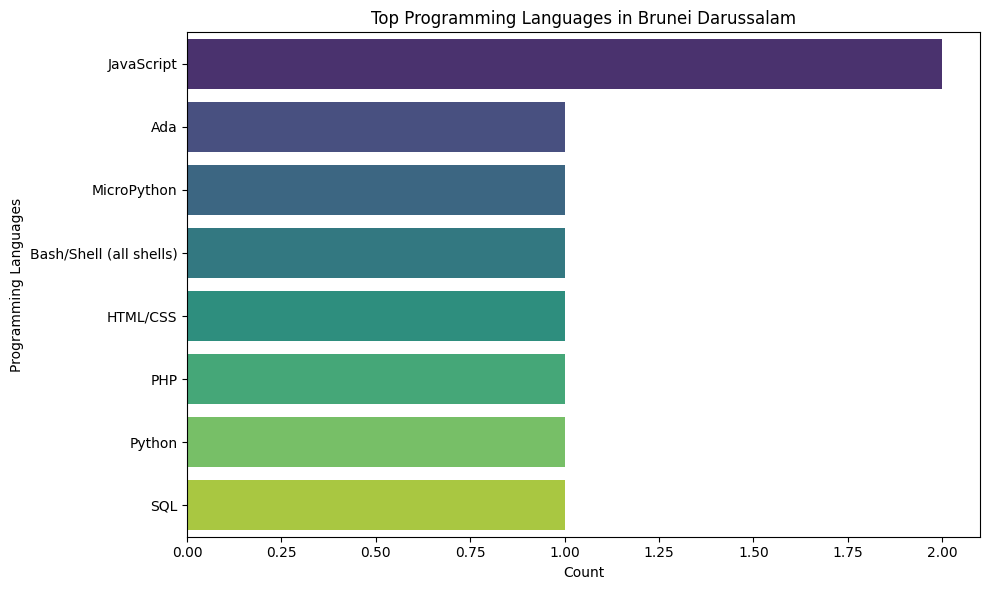

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


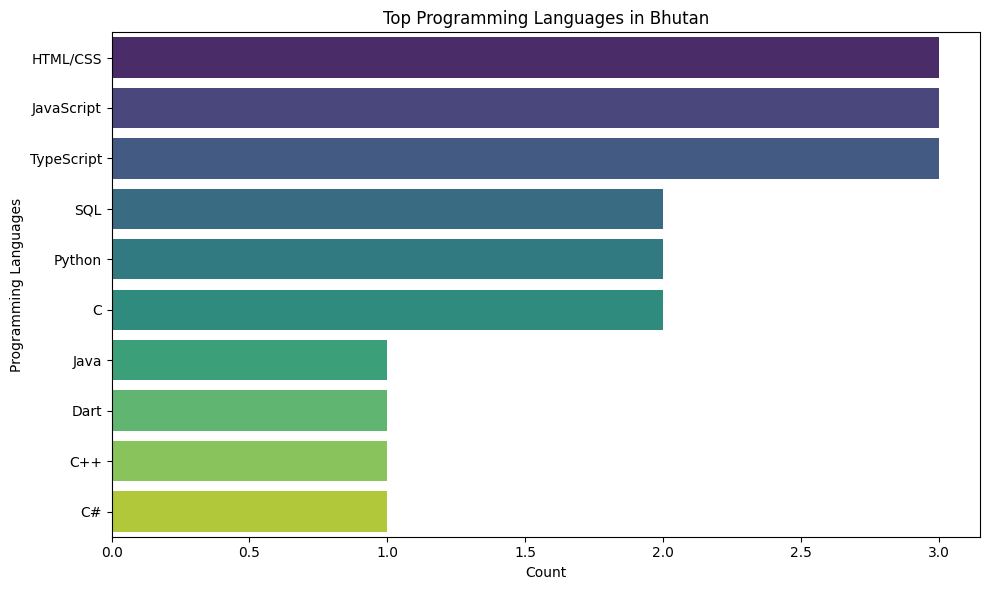

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


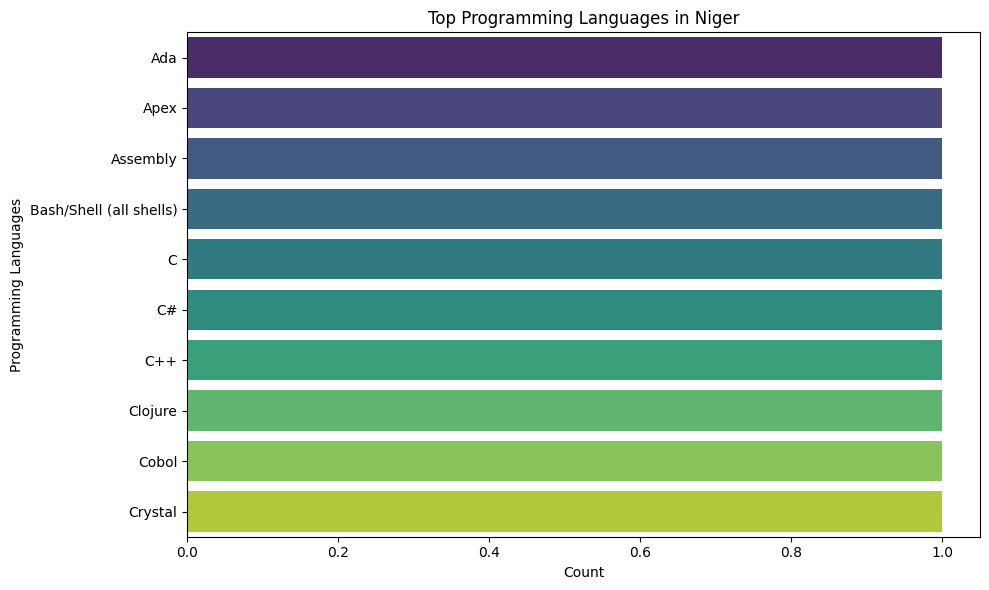

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


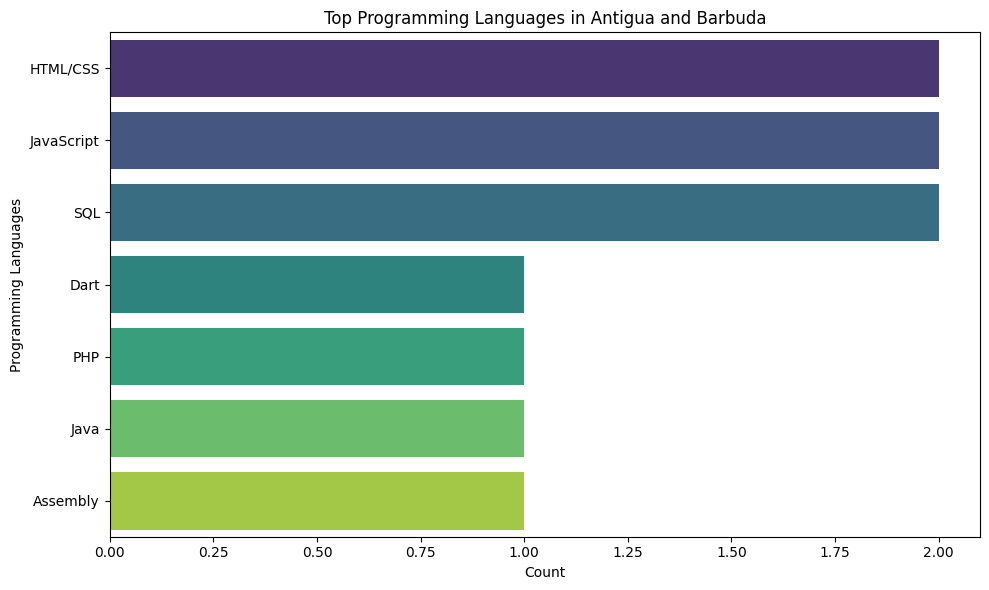

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


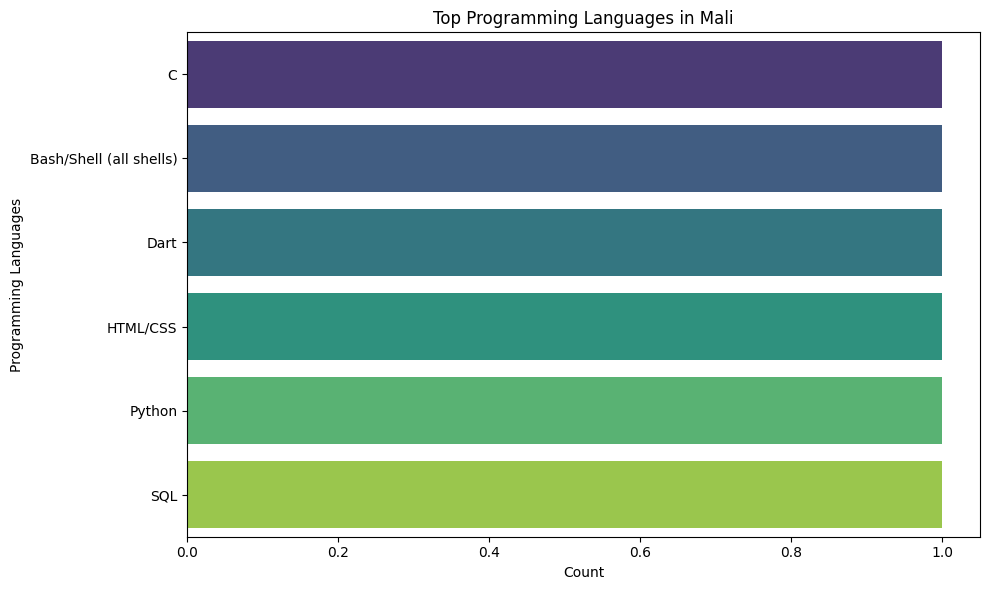

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


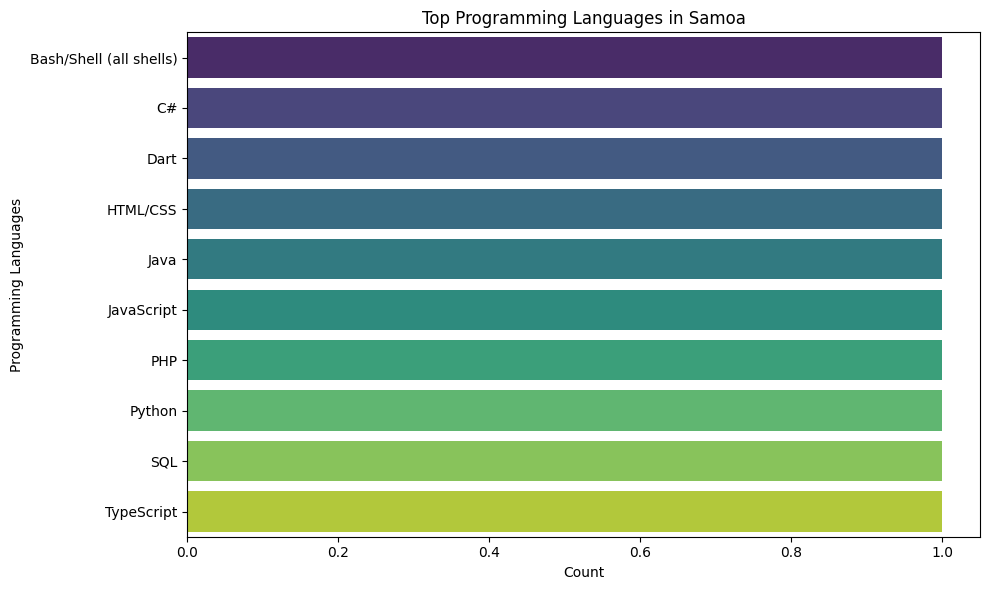

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


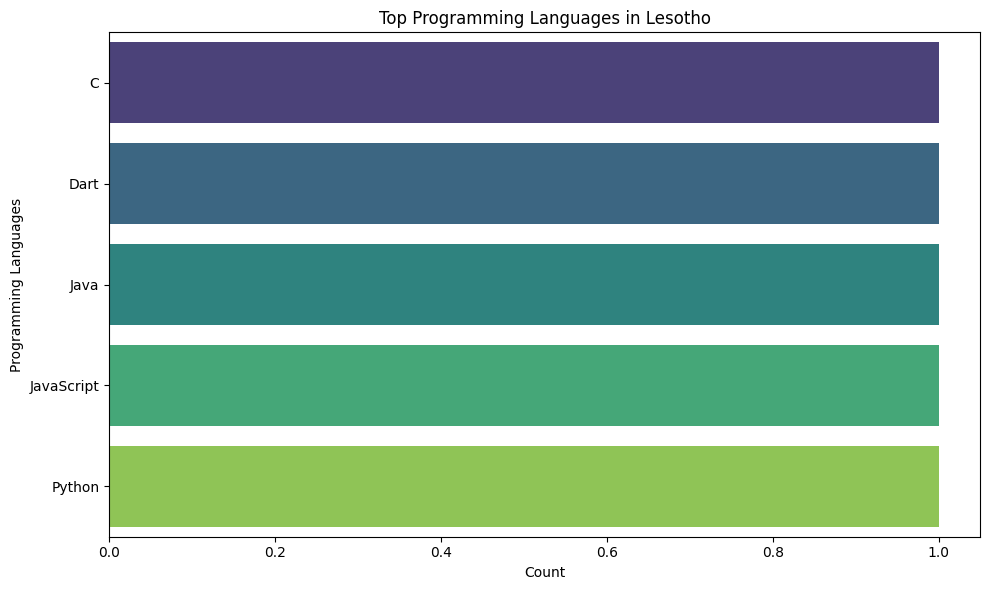

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


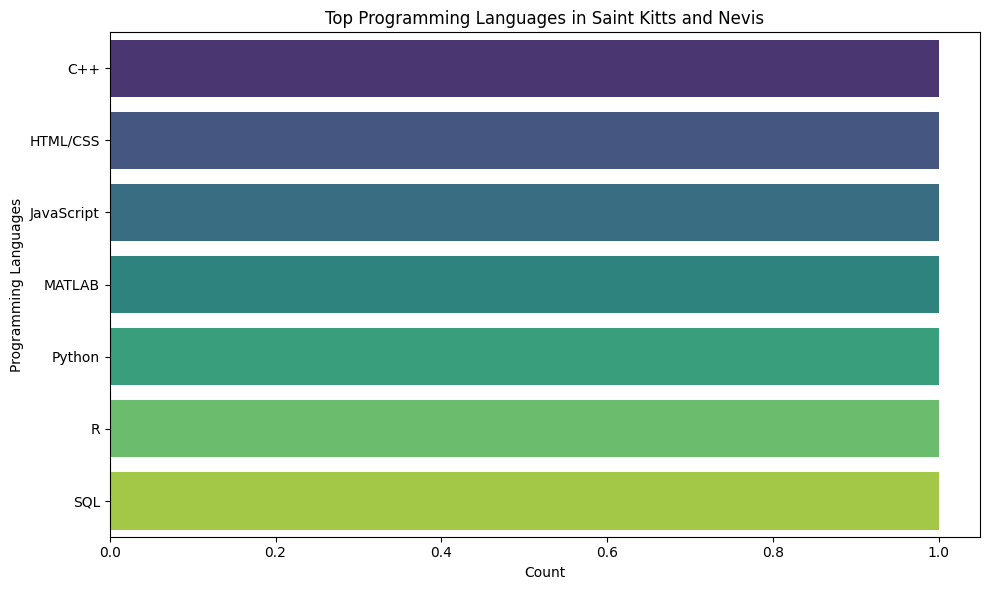

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


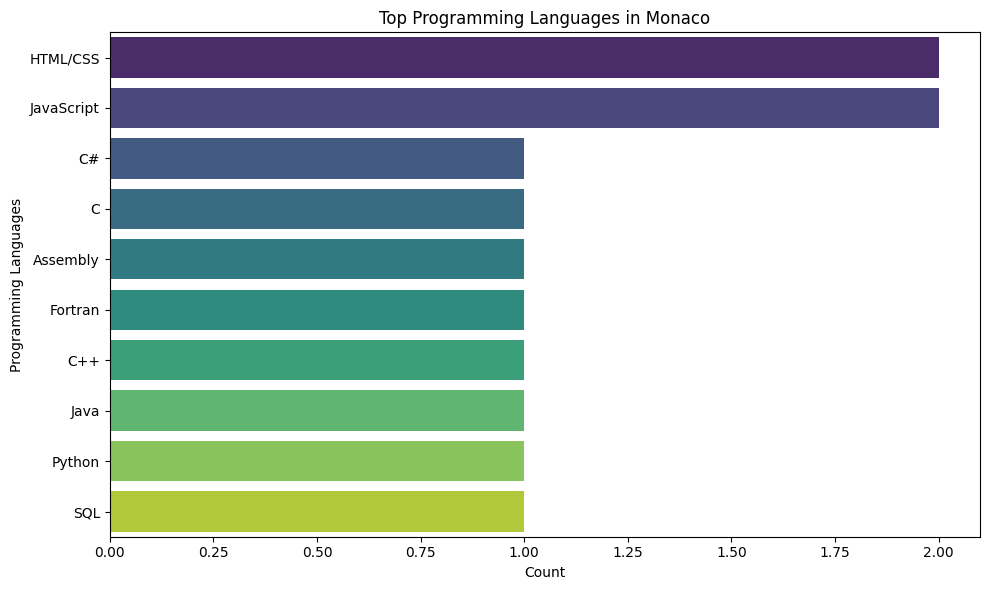

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


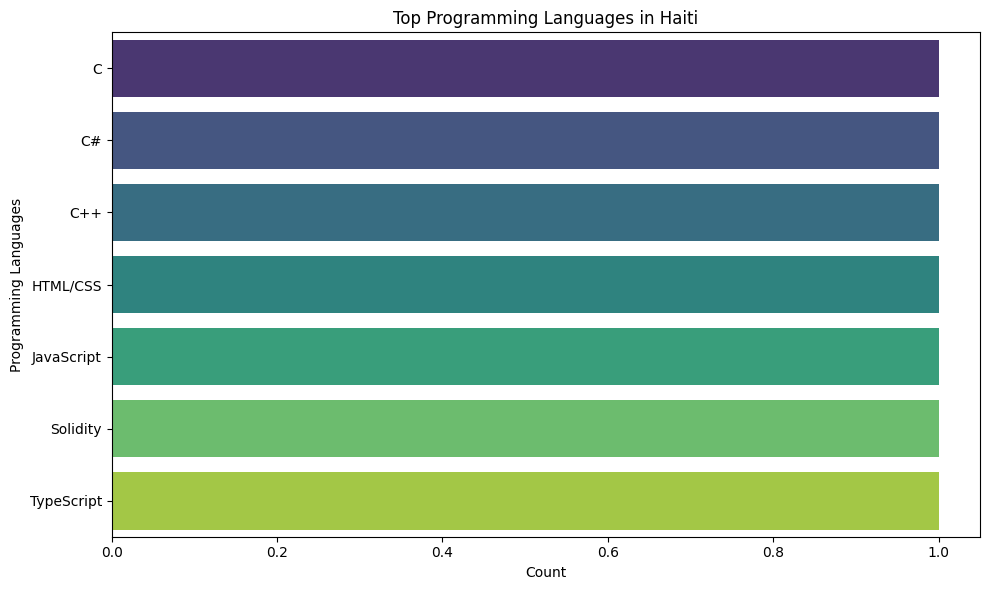

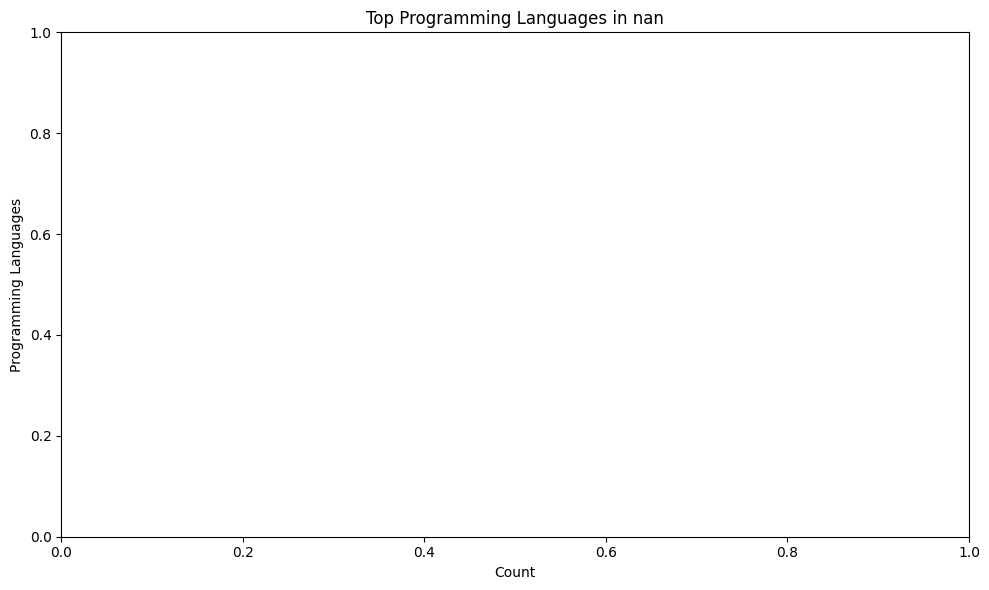

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


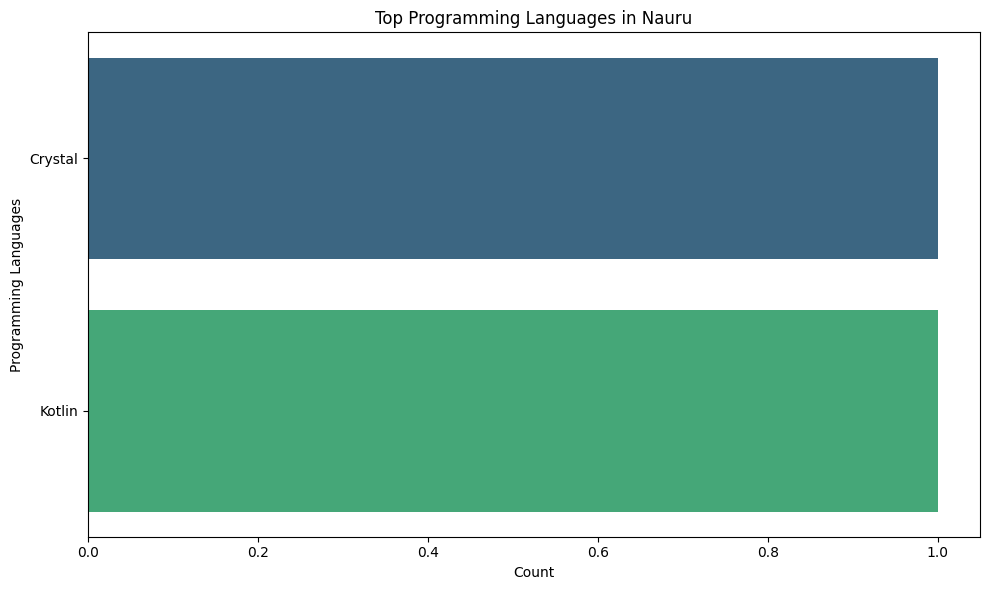

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


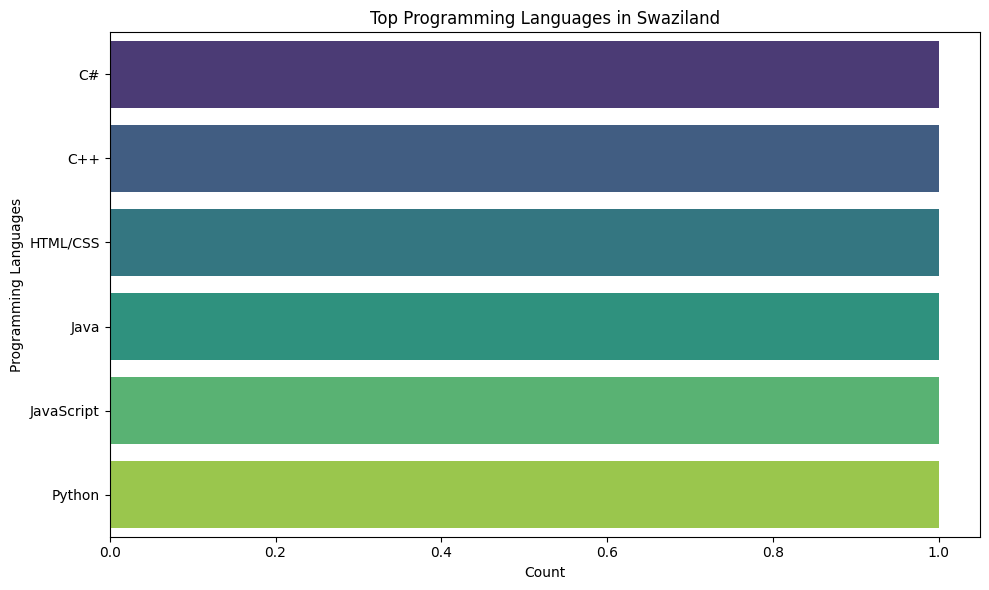

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


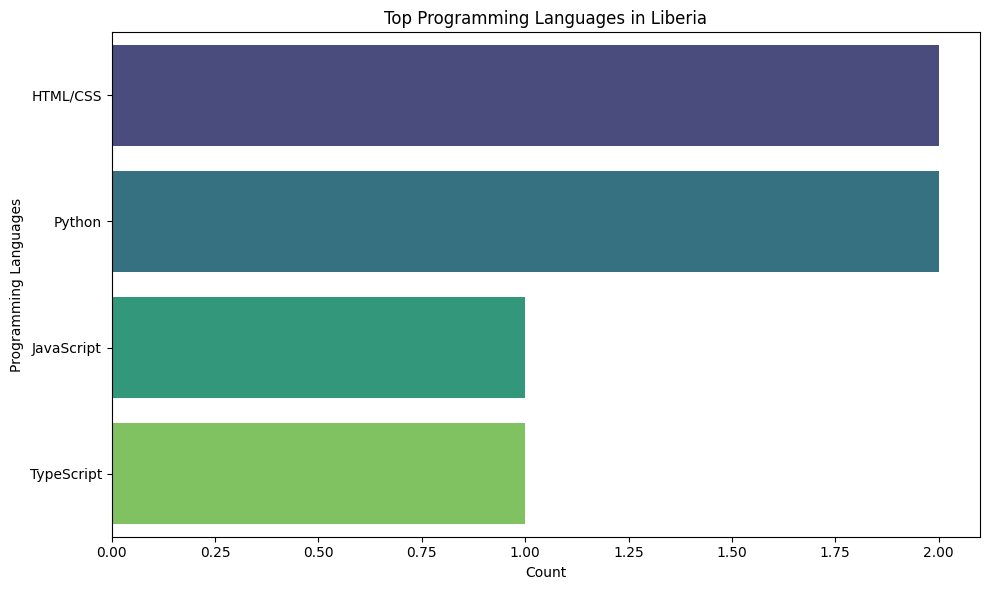

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_17028\1046132122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')


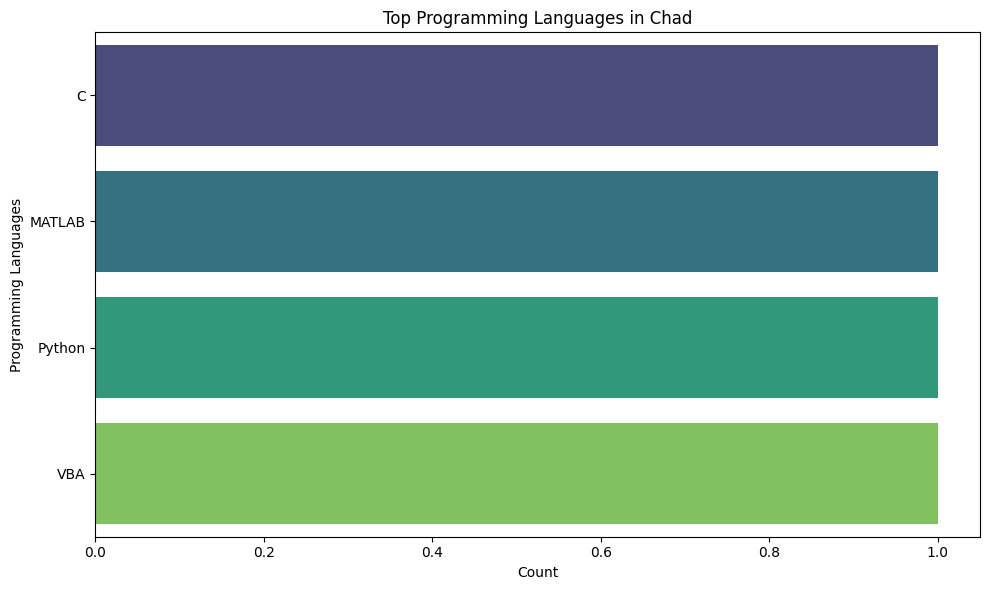

In [28]:
# Analyze the popularity of programming languages by region
# Filter data by country or region
regions = df['Country'].unique()
for region in regions:
    regional_data = df[df['Country'] == region]
    
    # Split the languages into a list and count occurrences
    language_counts = regional_data['LanguageHaveWorkedWith'].dropna().str.split(';').explode().value_counts().head(10)
    
    # Bar plot for top programming languages in the region
    plt.figure(figsize=(10, 6))
    sns.barplot(y=language_counts.index, x=language_counts.values, palette='viridis')
    plt.title(f'Top Programming Languages in {region}')
    plt.xlabel('Count')
    plt.ylabel('Programming Languages')
    plt.tight_layout()
    plt.show()

In [29]:
# Cross-tabulation of programming languages by region
language_region_crosstab = df['LanguageHaveWorkedWith'].str.split(';').explode()
language_region_crosstab = pd.crosstab(language_region_crosstab, df['Country'])


ValueError: cannot reindex on an axis with duplicate labels

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [ ]:
## Write your code here

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [ ]:
## Write your code here

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
